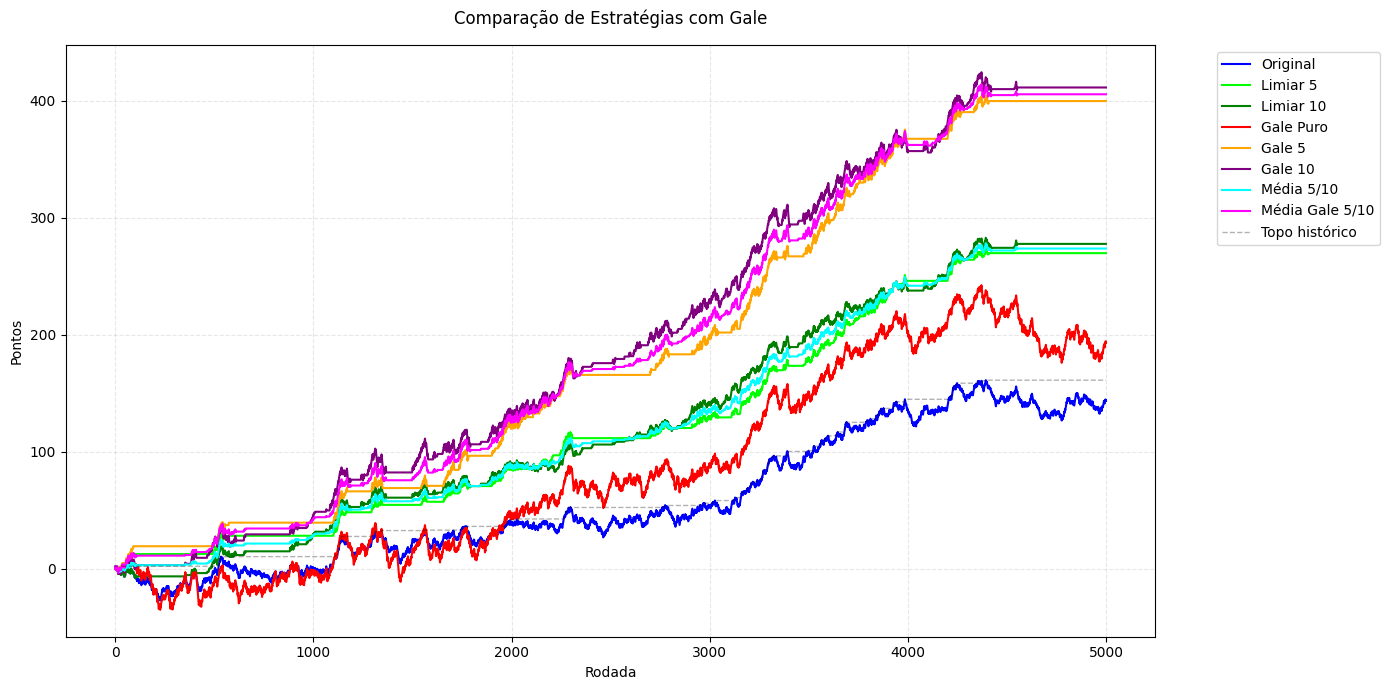

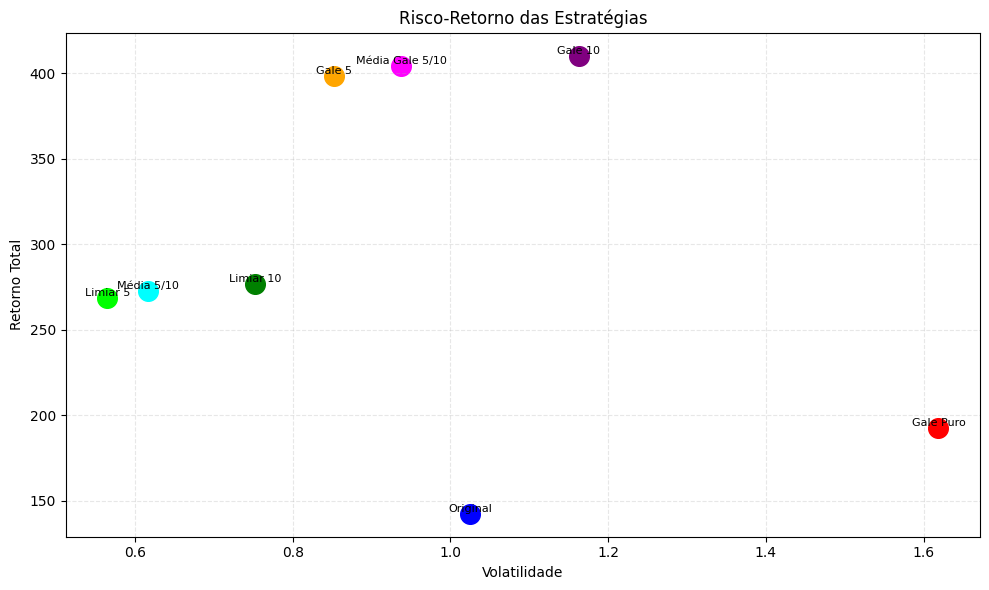

In [1]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale Puro': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'ultima_perda': False},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'ultima_perda': False},
    'Gale 10': {'pontos': 0, 'evolucao': [], 'cor': 'purple', 'ultima_perda': False}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            aplicar_gale = True
            # Verifica se está dentro do limiar para as estratégias com limiar
            if nome in ['Gale 5', 'Gale 10']:
                limiar = int(nome.split()[-1])
                diferenca = topo_historico[-1] - pontos
                aplicar_gale = (diferenca <= limiar)

            if aplicar_gale:
                if dados['ultima_perda']:
                    dados['pontos'] += ponto_cara * 2 if resultado < 0.5 else ponto_coroa * 2
                    dados['ultima_perda'] = (resultado >= 0.5)
                else:
                    dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
                    dados['ultima_perda'] = (resultado >= 0.5)
            else:
                dados['pontos'] += 0  # Fora do limiar, não opera

            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias com limiar simples
        limiar = int(nome.split()[-1])
        diferenca = topo_historico[-1] - pontos

        if diferenca <= limiar:
            dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

        dados['evolucao'].append(dados['pontos'])

# Cálculo das médias
media_limiares = np.mean([estrategias['Limiar 5']['evolucao'], estrategias['Limiar 10']['evolucao']], axis=0)
media_gale_limiares = np.mean([estrategias['Gale 5']['evolucao'], estrategias['Gale 10']['evolucao']], axis=0)

estrategias['Média 5/10'] = {'evolucao': media_limiares.tolist(), 'cor': 'cyan'}
estrategias['Média Gale 5/10'] = {'evolucao': media_gale_limiares.tolist(), 'cor': 'magenta'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome in ['Original', 'Limiar 5', 'Limiar 10', 'Gale Puro', 'Gale 5', 'Gale 10', 'Média 5/10', 'Média Gale 5/10']:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Gale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ['Original', 'Limiar 5', 'Limiar 10', 'Gale Puro', 'Gale 5', 'Gale 10', 'Média 5/10', 'Média Gale 5/10']:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

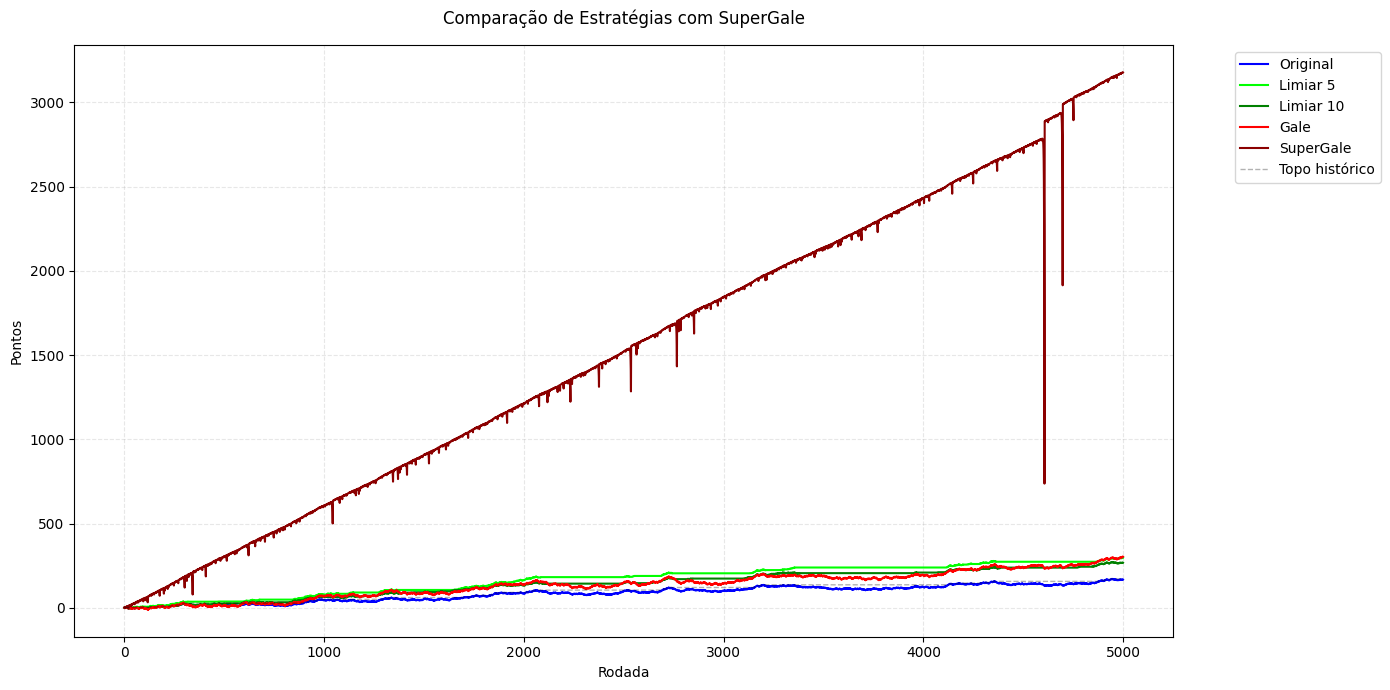

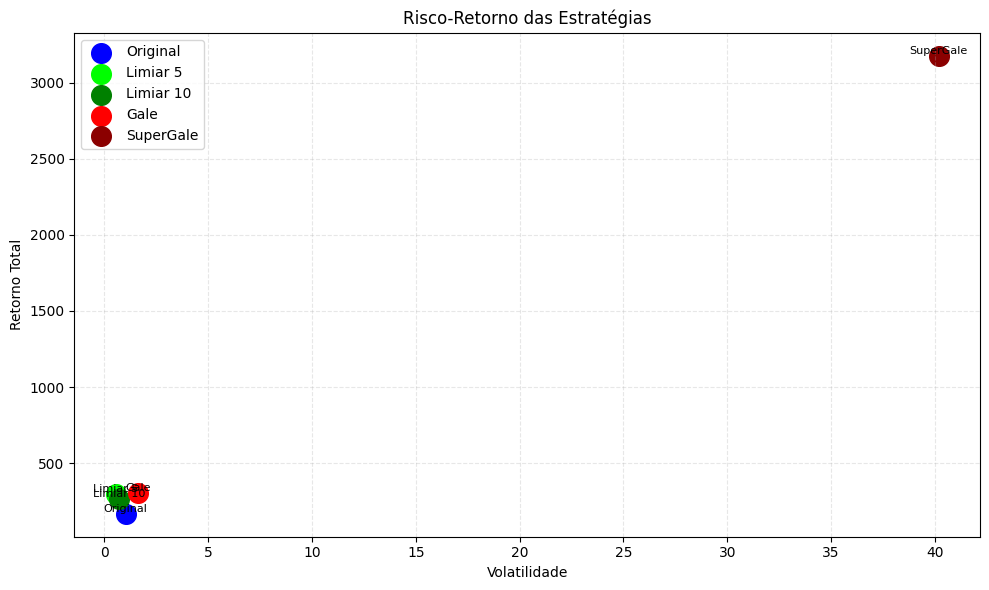

In [2]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

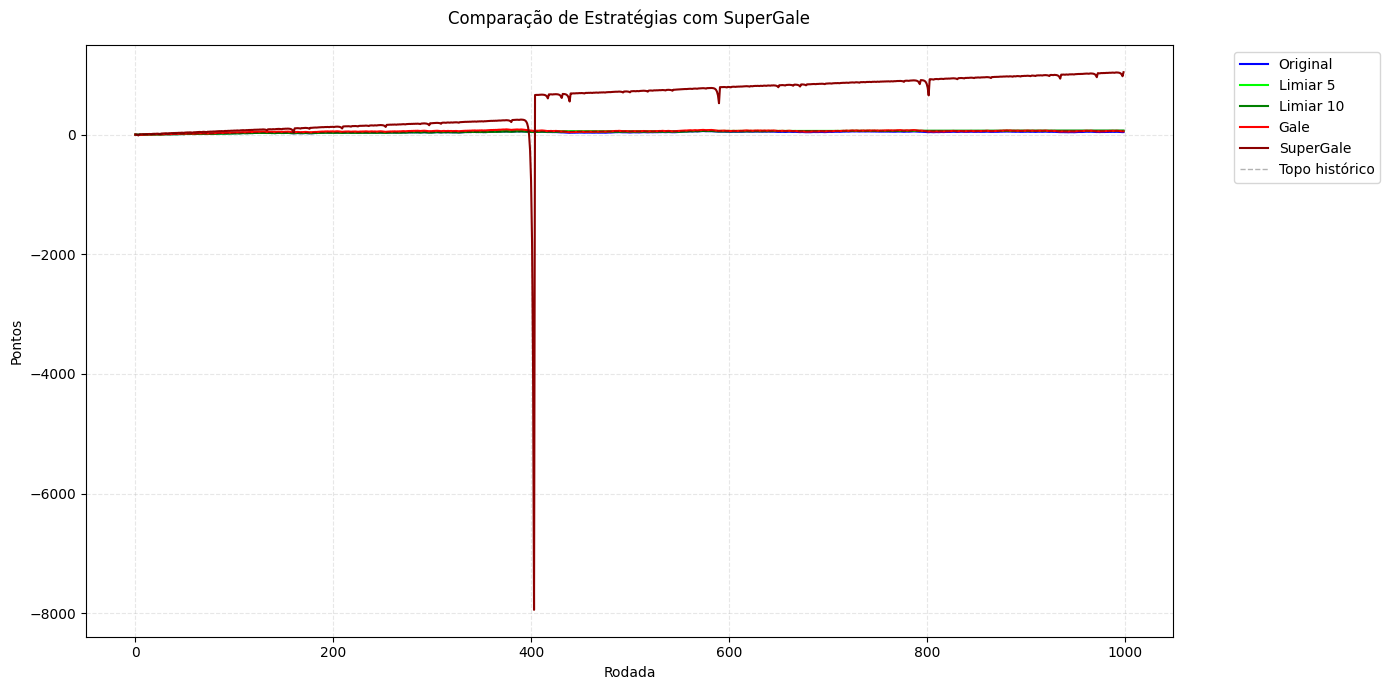

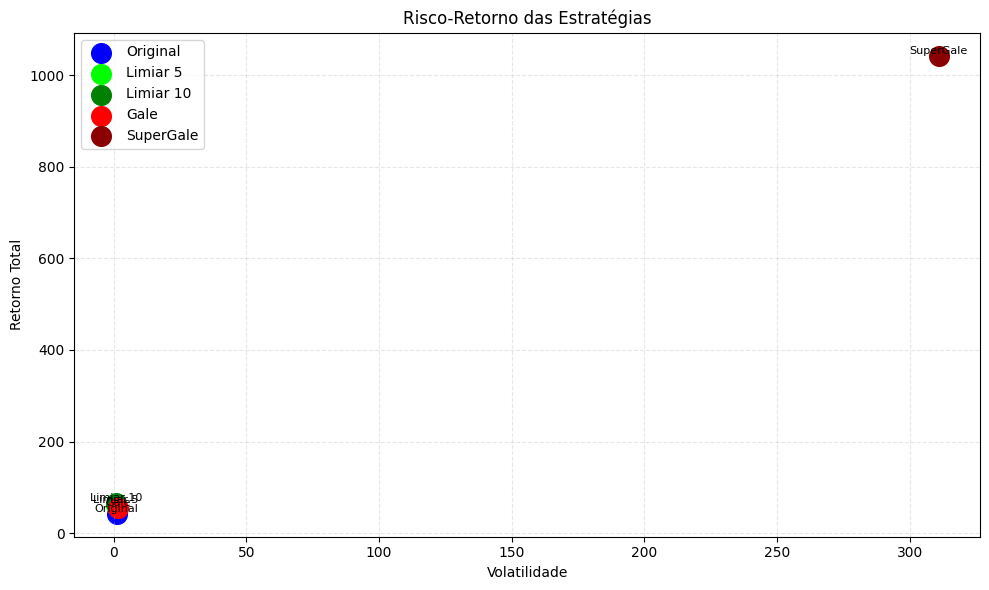

In [3]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 1000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

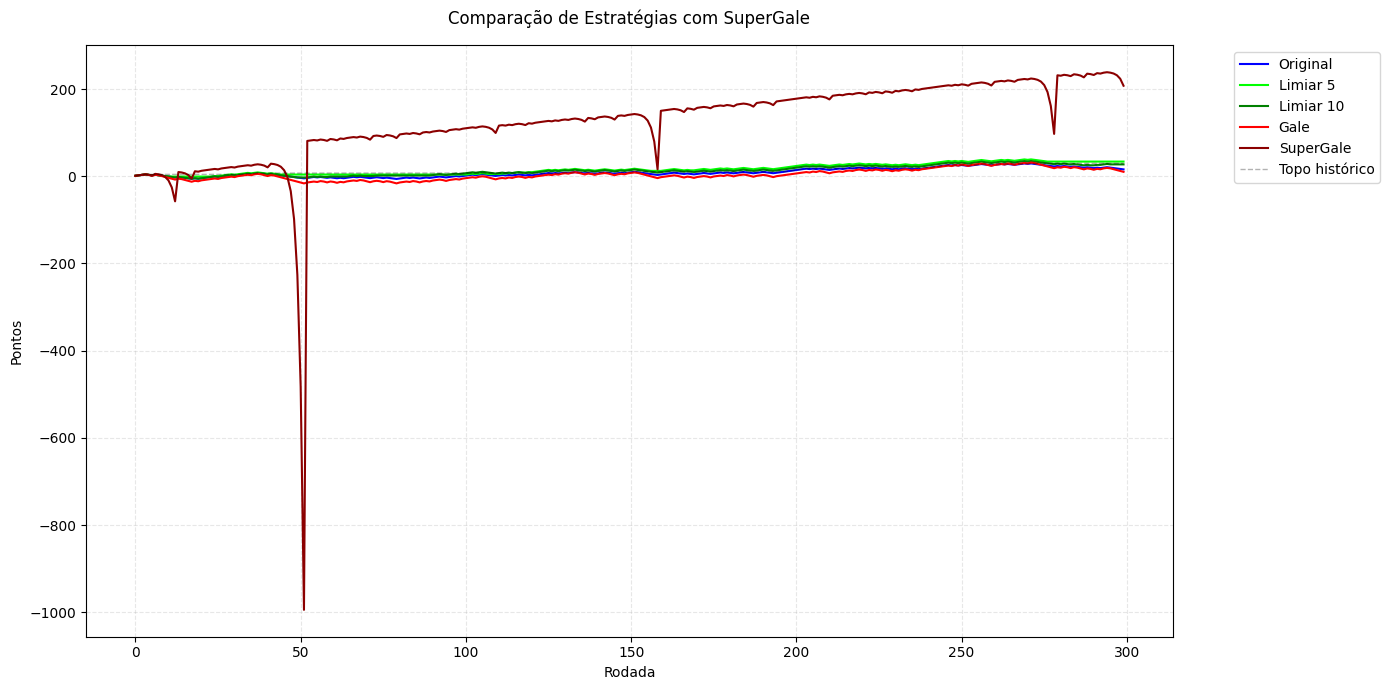

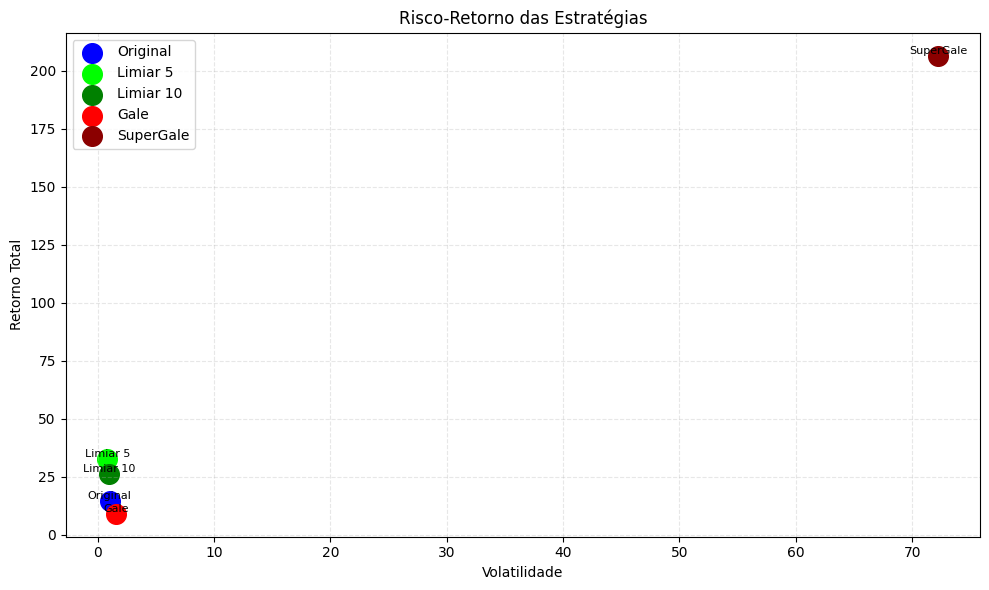

In [4]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 300
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

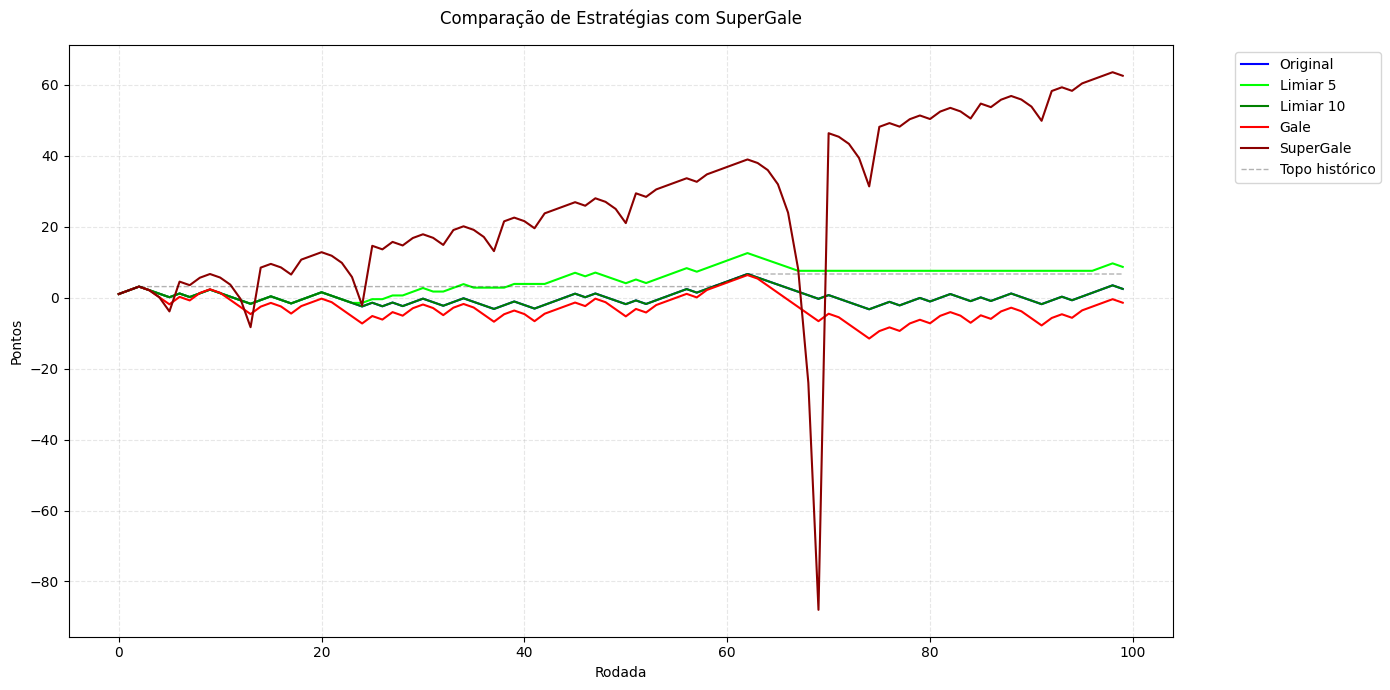

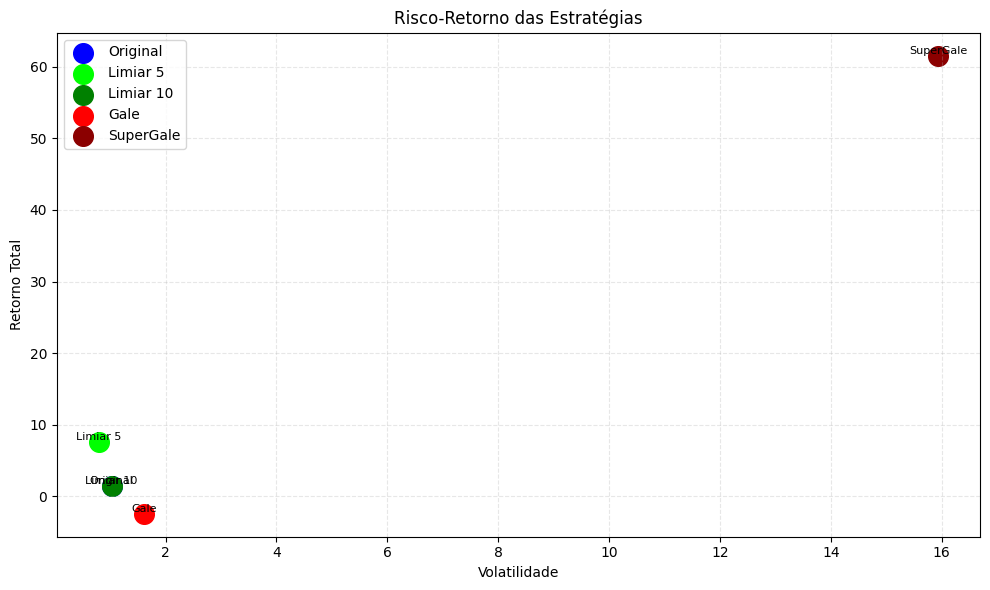

In [5]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 100
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1, 'perdas_consecutivas': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5' or nome == 'Limiar 10':
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos

            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta após vitória
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra após derrota (máximo 1 vez)

            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] = 0  # Reseta sequência
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consecutivas'])
                dados['perdas_consecutivas'] += 1  # Incrementa sequência

            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno das Estratégias')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

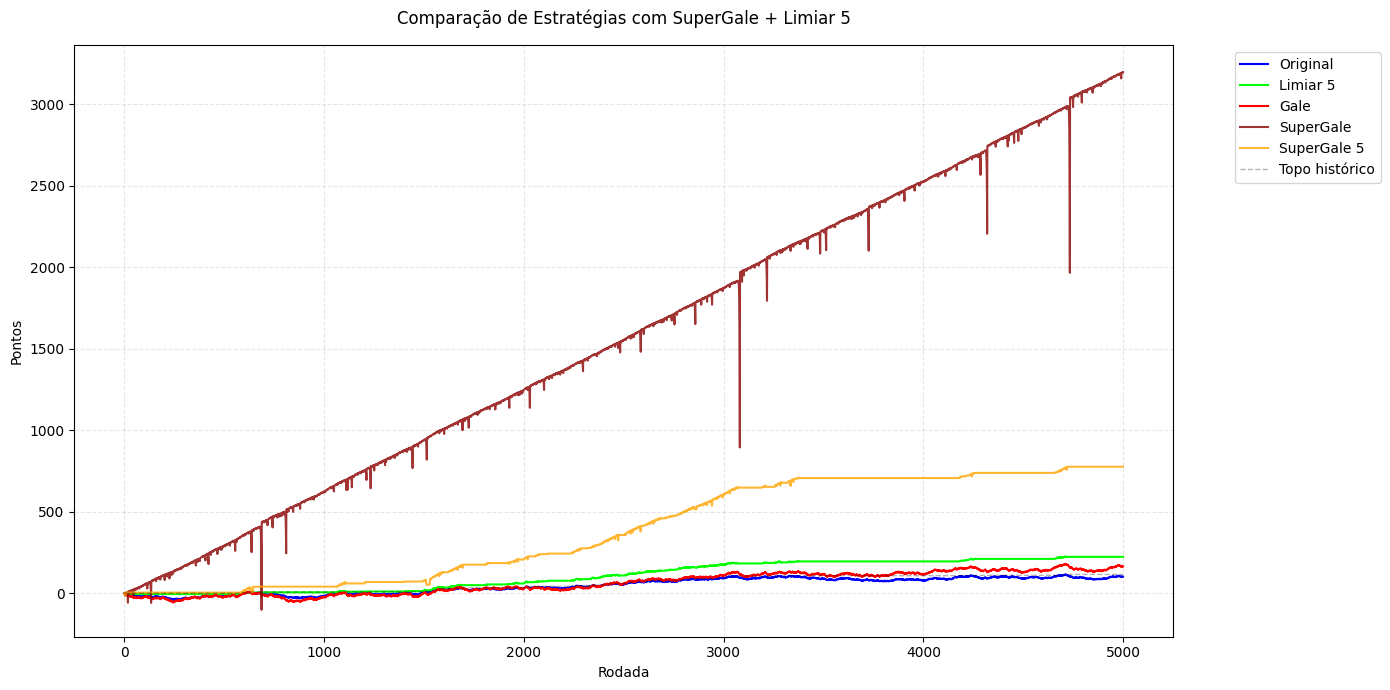

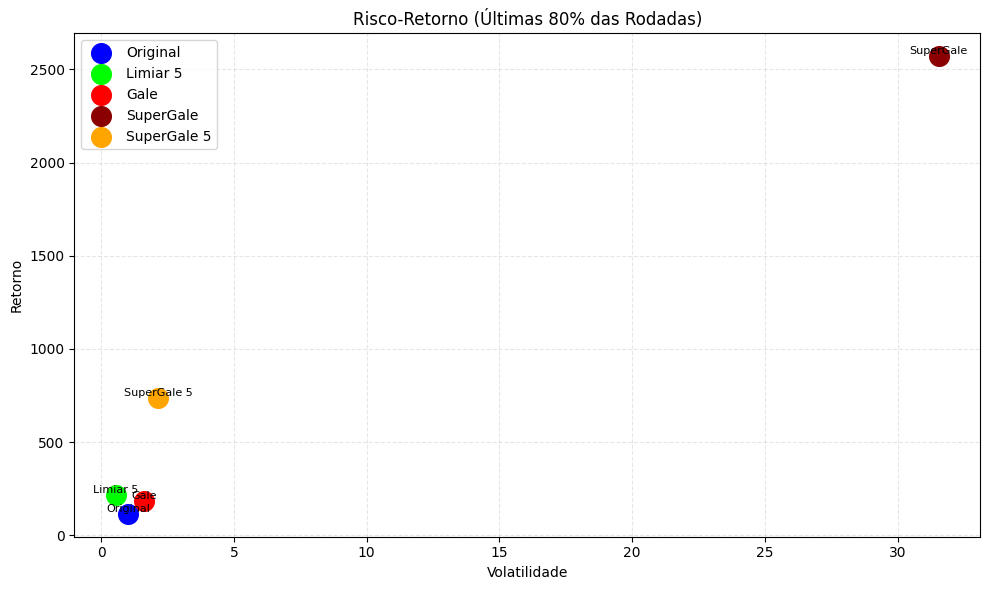

In [6]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale/SuperGale
        aplicar_estrategia = True
        if nome == 'SuperGale 5':
            diferenca = topo_historico[-1] - pontos
            aplicar_estrategia = (diferenca <= 5)

        if aplicar_estrategia:
            if 'Gale' in nome:
                if resultado < 0.5:  # Vitória
                    if nome == 'Gale':
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                    else:  # SuperGale
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                else:  # Derrota
                    if nome == 'Gale':
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
                    else:  # SuperGale
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])
        else:
            dados['evolucao'].append(dados['pontos'])  # Mantém os pontos sem operar

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.8 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale + Limiar 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimos 80% das rodadas para evitar viés inicial)
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Descarta as primeiras 20%
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno (Últimas 80% das Rodadas)')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

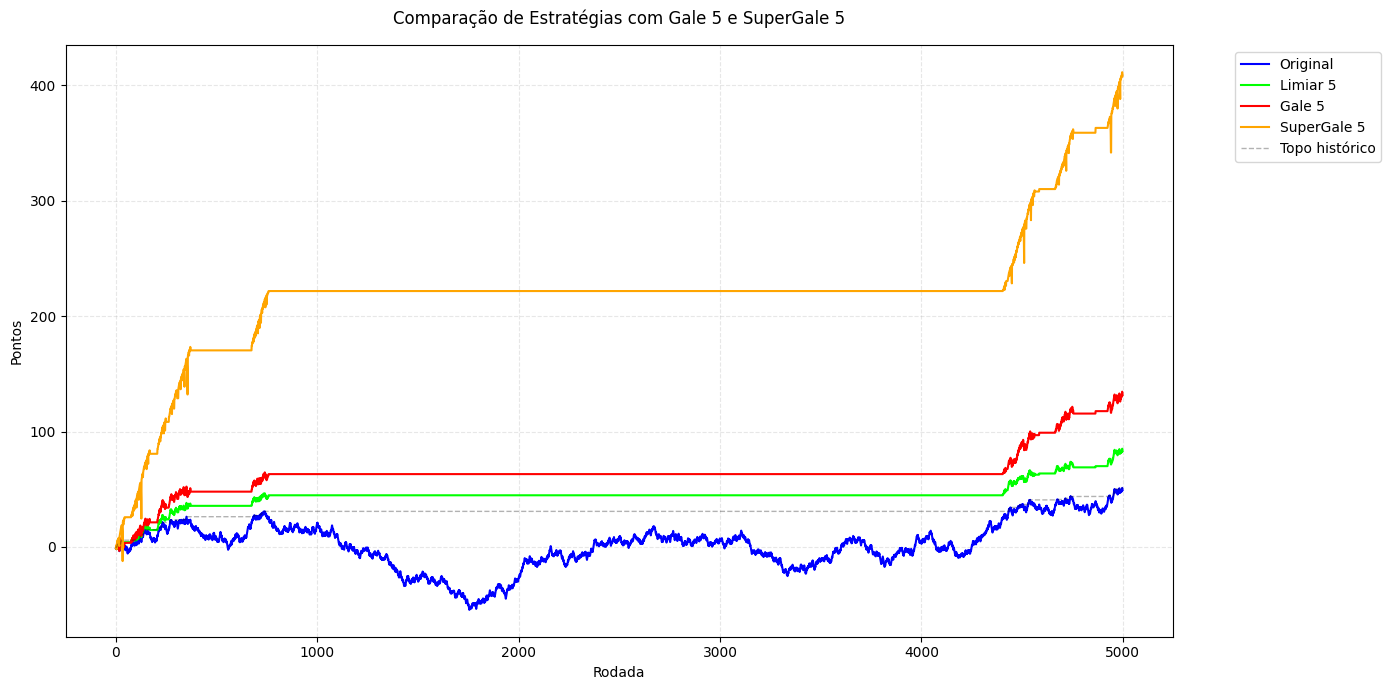

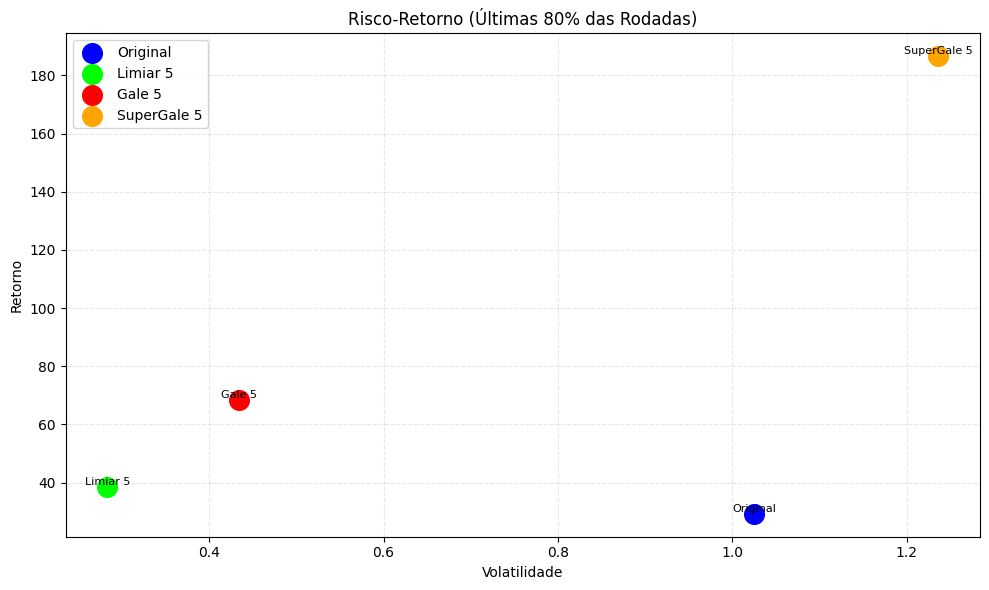

In [7]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Verifica o limiar para as estratégias Gale 5 e SuperGale 5
        diferenca = topo_historico[-1] - pontos
        if diferenca > 5:  # Fora do limiar, não opera
            dados['evolucao'].append(dados['pontos'])
            continue

        # Dentro do limiar - aplica a estratégia
        if nome == 'Gale 5':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * dados['mult']
                dados['mult'] = 1  # Reseta
            else:  # Derrota
                dados['pontos'] += ponto_coroa * dados['mult']
                dados['mult'] = 2  # Dobra (máximo 1x)

        elif nome == 'SuperGale 5':
            if resultado < 0.5:  # Vitória
                dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                dados['perdas_consec'] = 0  # Reseta
            else:  # Derrota
                dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                dados['perdas_consec'] += 1  # Incrementa perdas consecutivas

        dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Gale 5 e SuperGale 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Remove viés inicial
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Risco-Retorno (Últimas 80% das Rodadas)')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

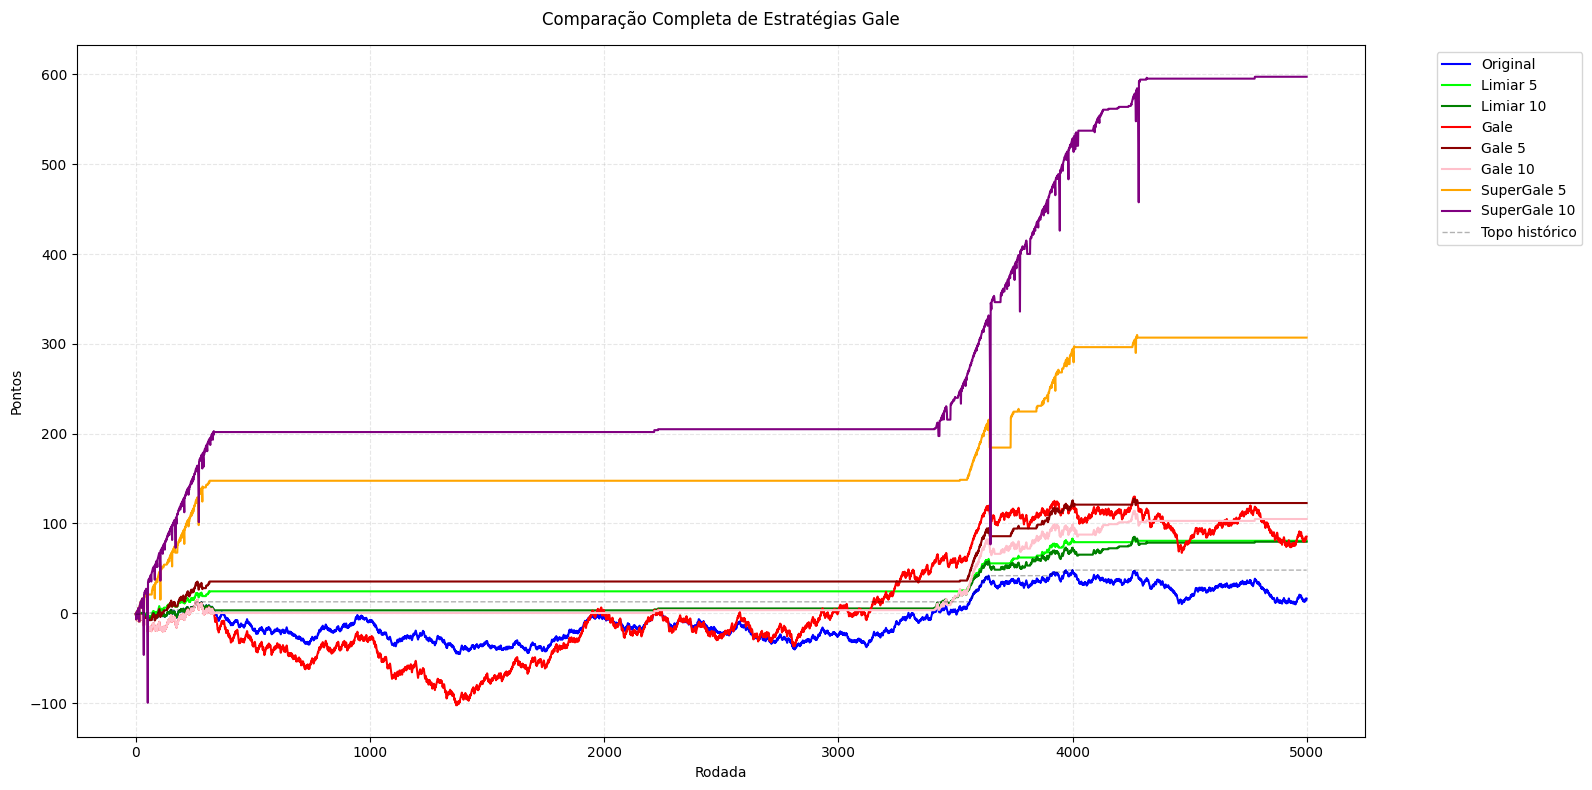

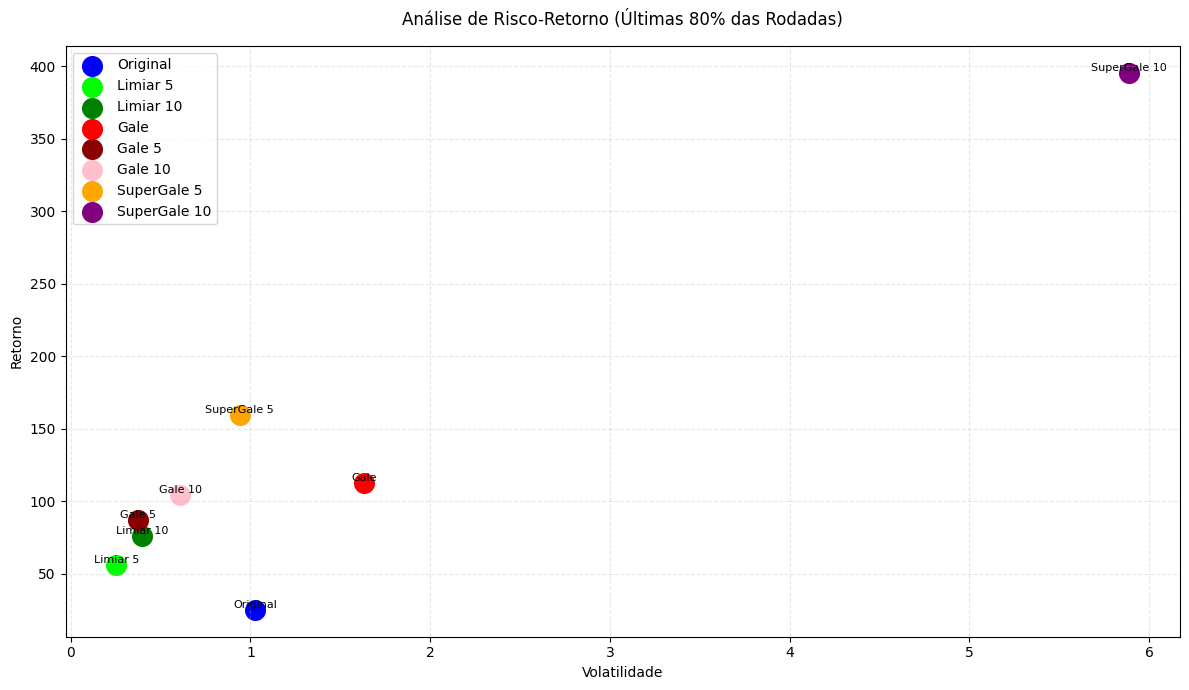

In [8]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 10': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'Gale 10': {'pontos': 0, 'evolucao': [], 'cor': 'pink', 'mult': 1},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0},
    'SuperGale 10': {'pontos': 0, 'evolucao': [], 'cor': 'purple', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 5', 'Limiar 10']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome in ['Gale 5', 'SuperGale 5']:
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome in ['Gale 10', 'SuperGale 10']:
                aplicar_estrategia = (topo_historico[-1] - pontos <= 10)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
cores_ordenadas = ['blue', 'lime', 'green', 'red', 'darkred', 'pink', 'orange', 'purple']
nomes_ordenados = ['Original', 'Limiar 5', 'Limiar 10', 'Gale', 'Gale 5', 'Gale 10', 'SuperGale 5', 'SuperGale 10']

for nome in nomes_ordenados:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação Completa de Estratégias Gale', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in nomes_ordenados:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno (Últimas 80% das Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

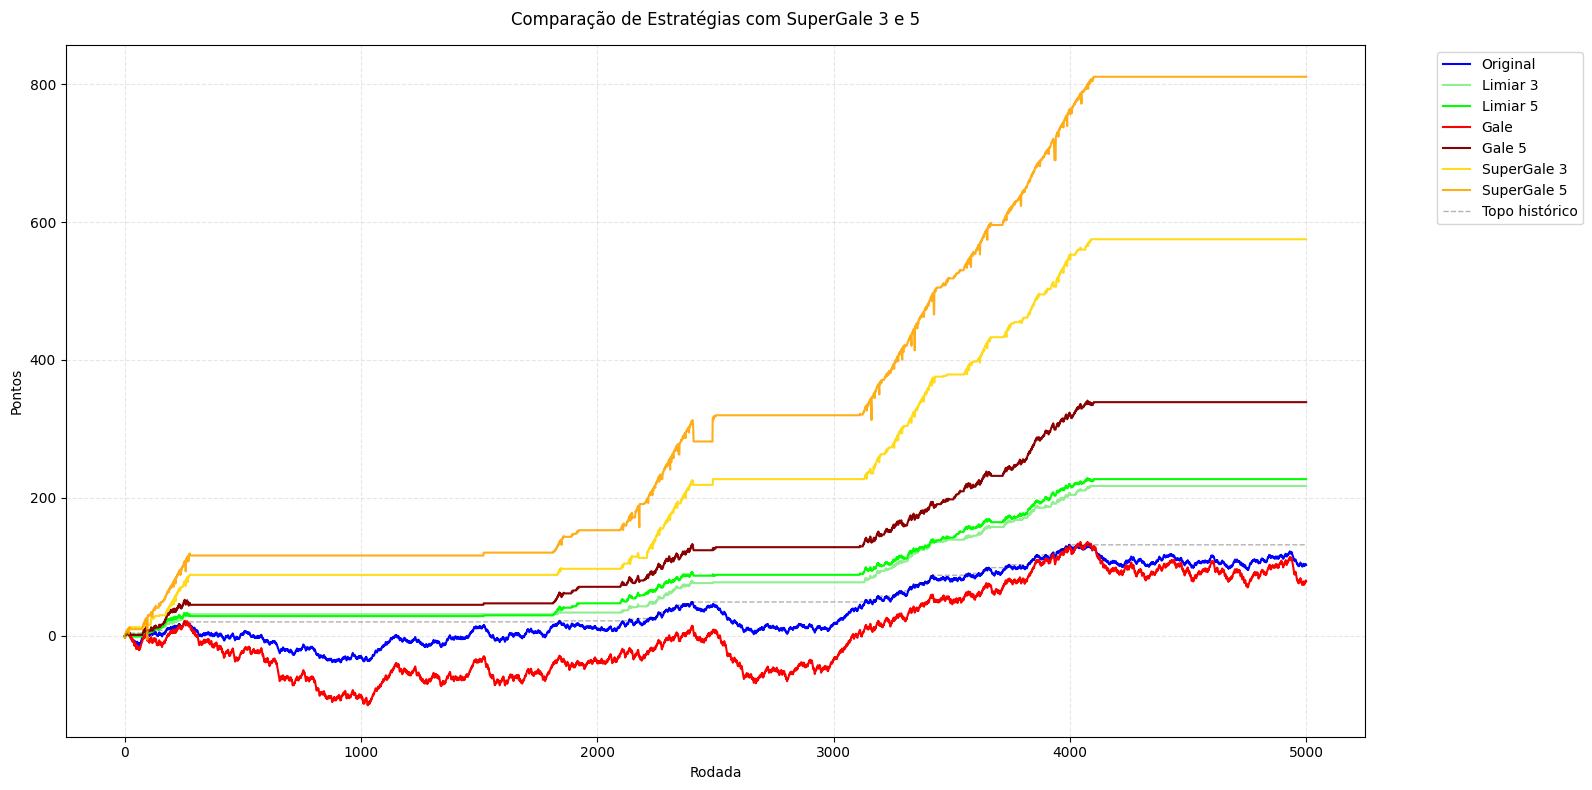

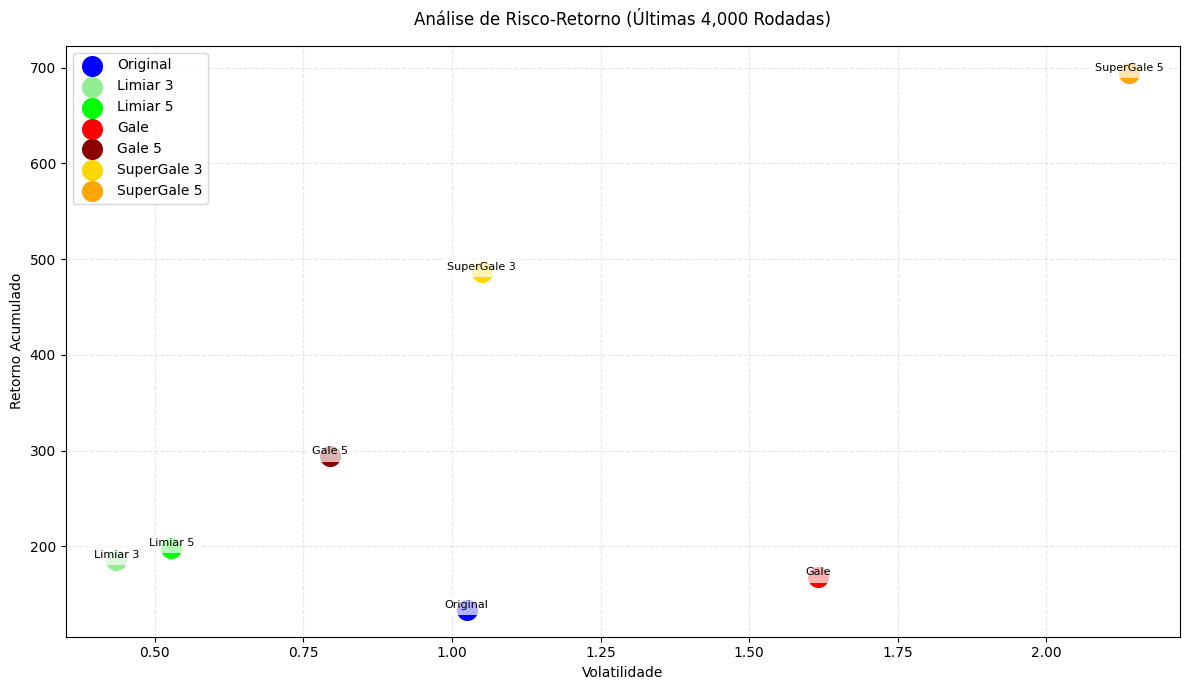

In [9]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

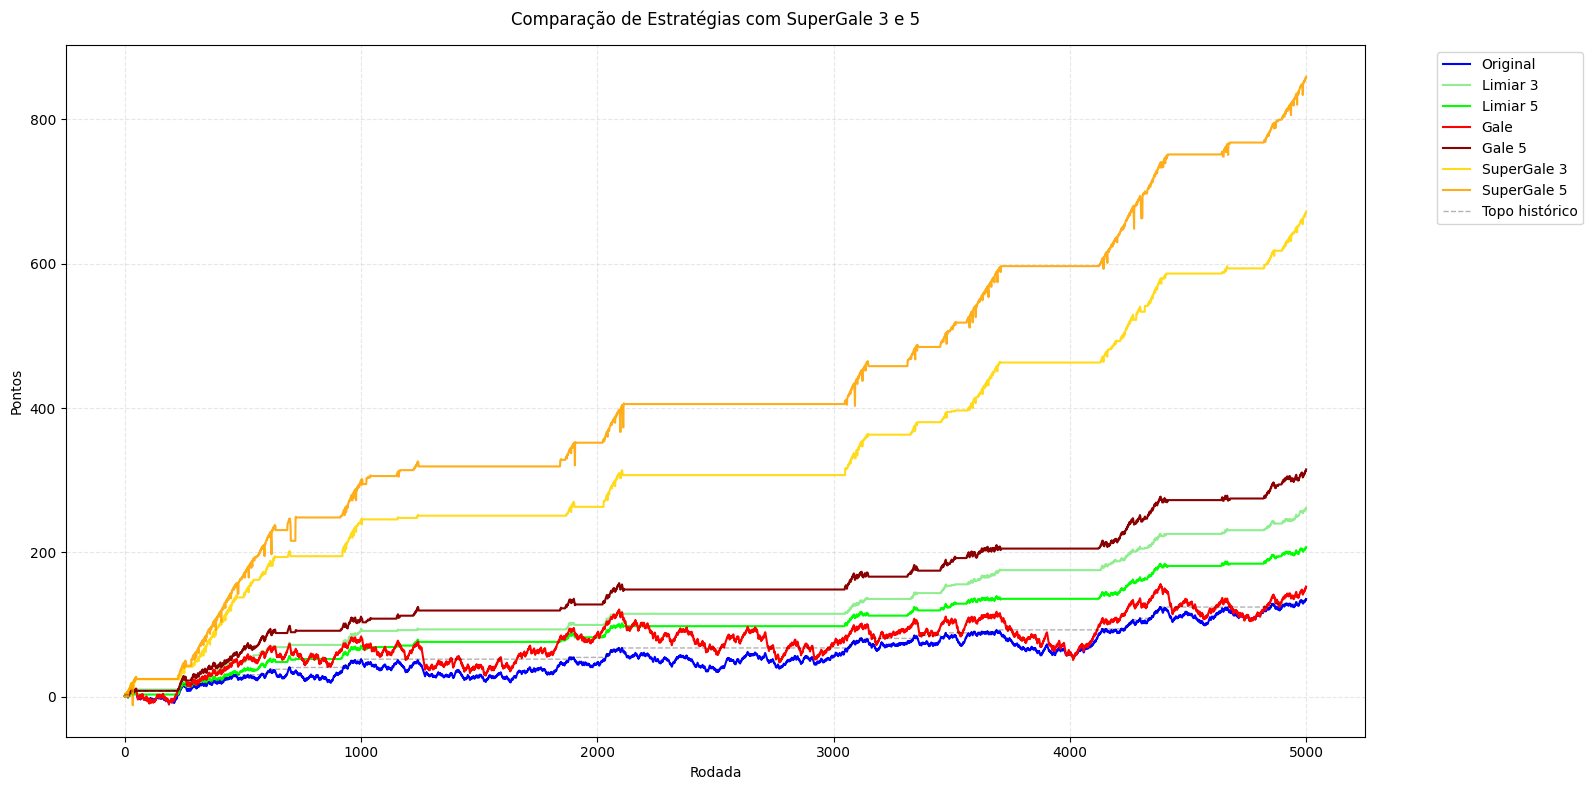

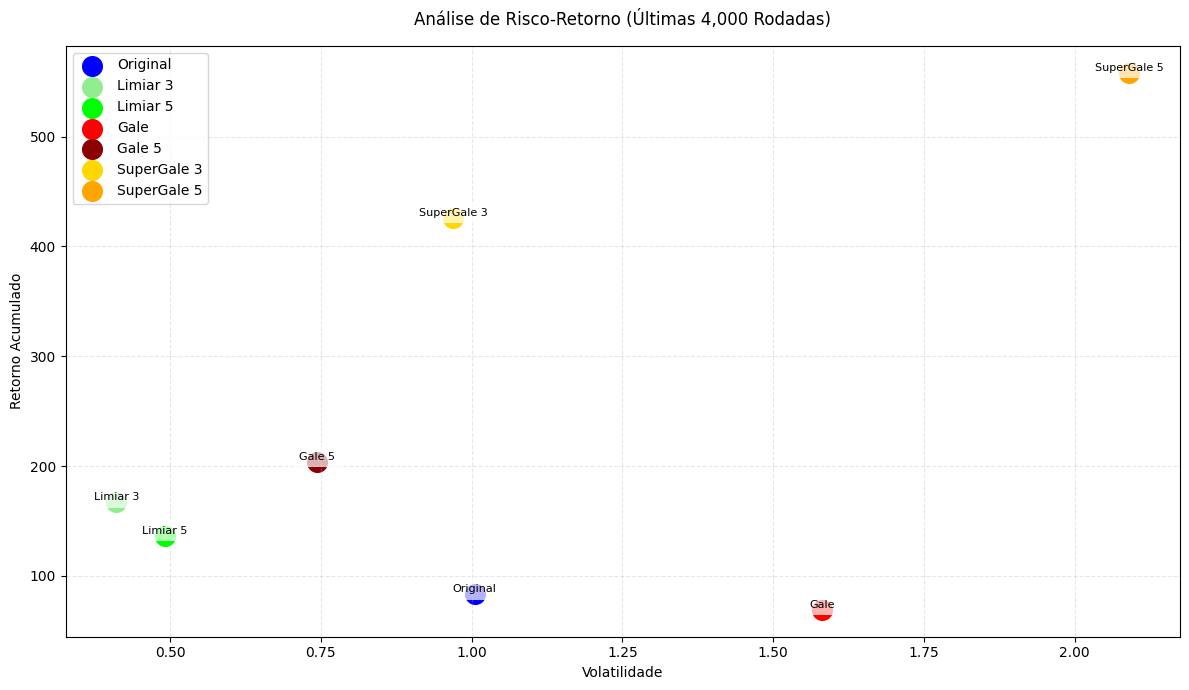

In [10]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.01
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

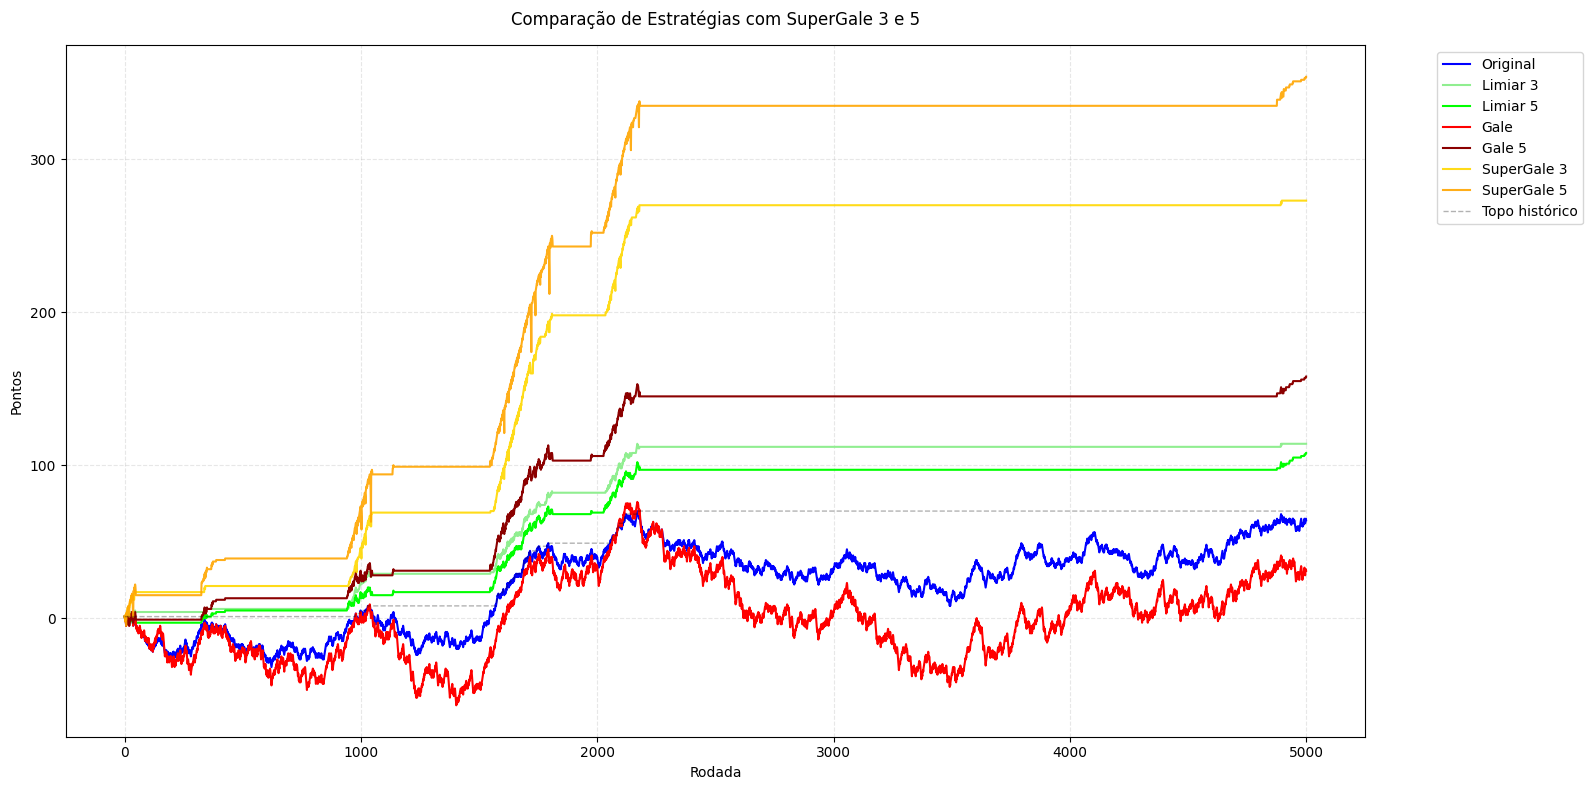

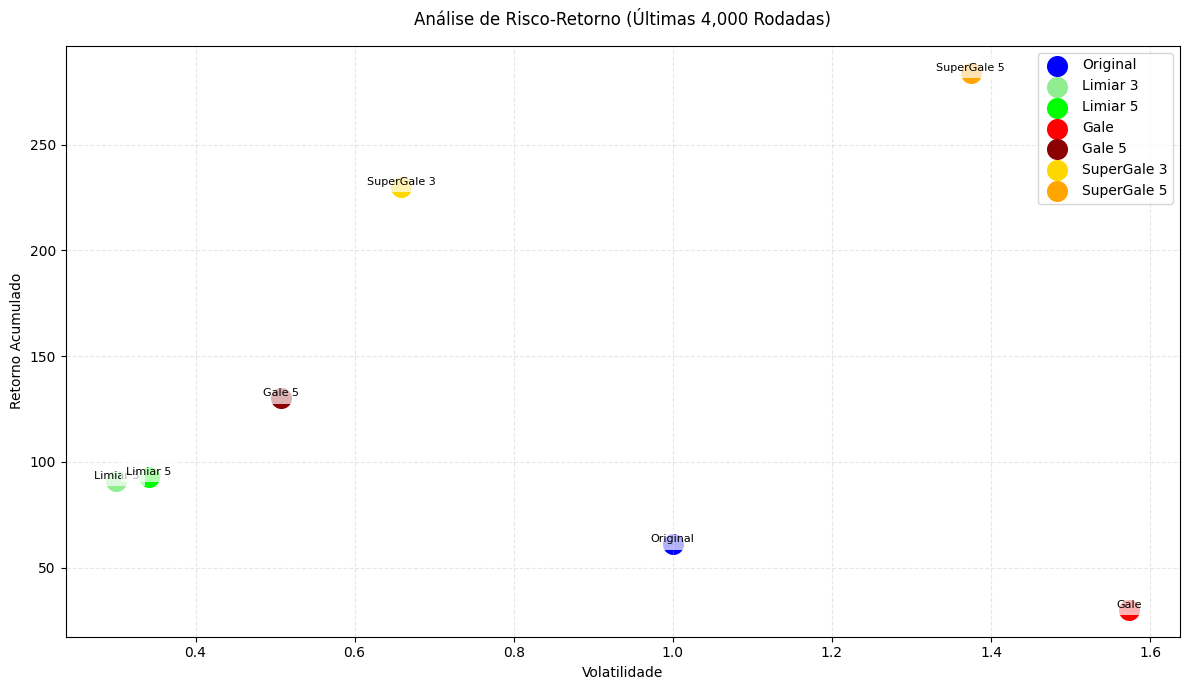

In [11]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 5': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 3', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 5':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 5)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 3', 'Limiar 5', 'Gale', 'Gale 5', 'SuperGale 3', 'SuperGale 5']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com SuperGale 3 e 5', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 4,000 Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Acumulado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

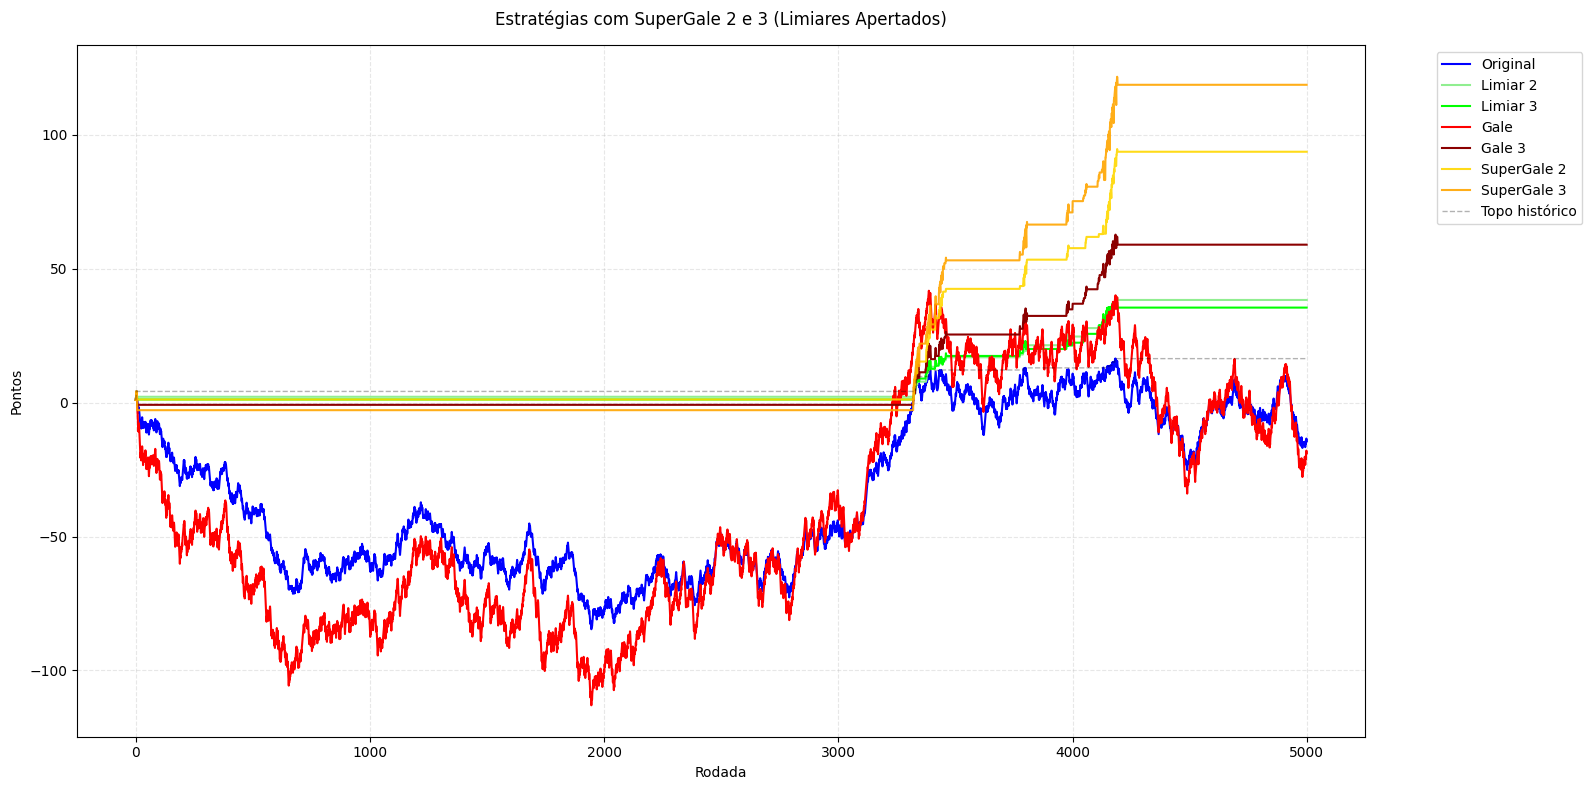

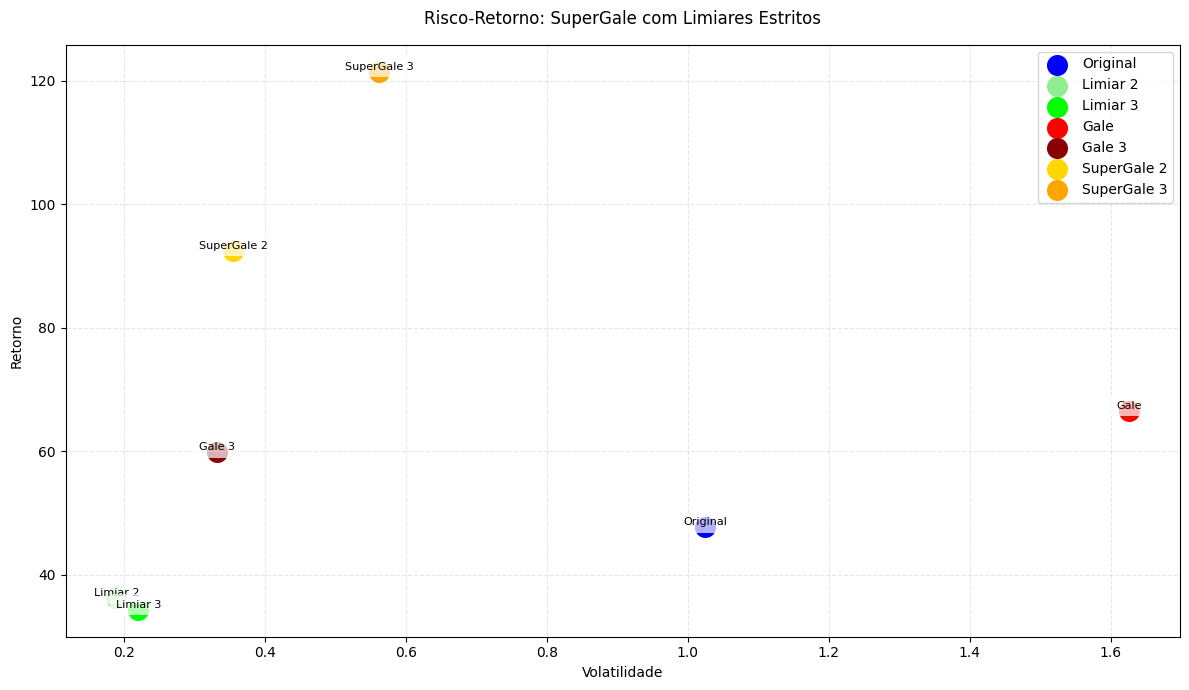

In [12]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

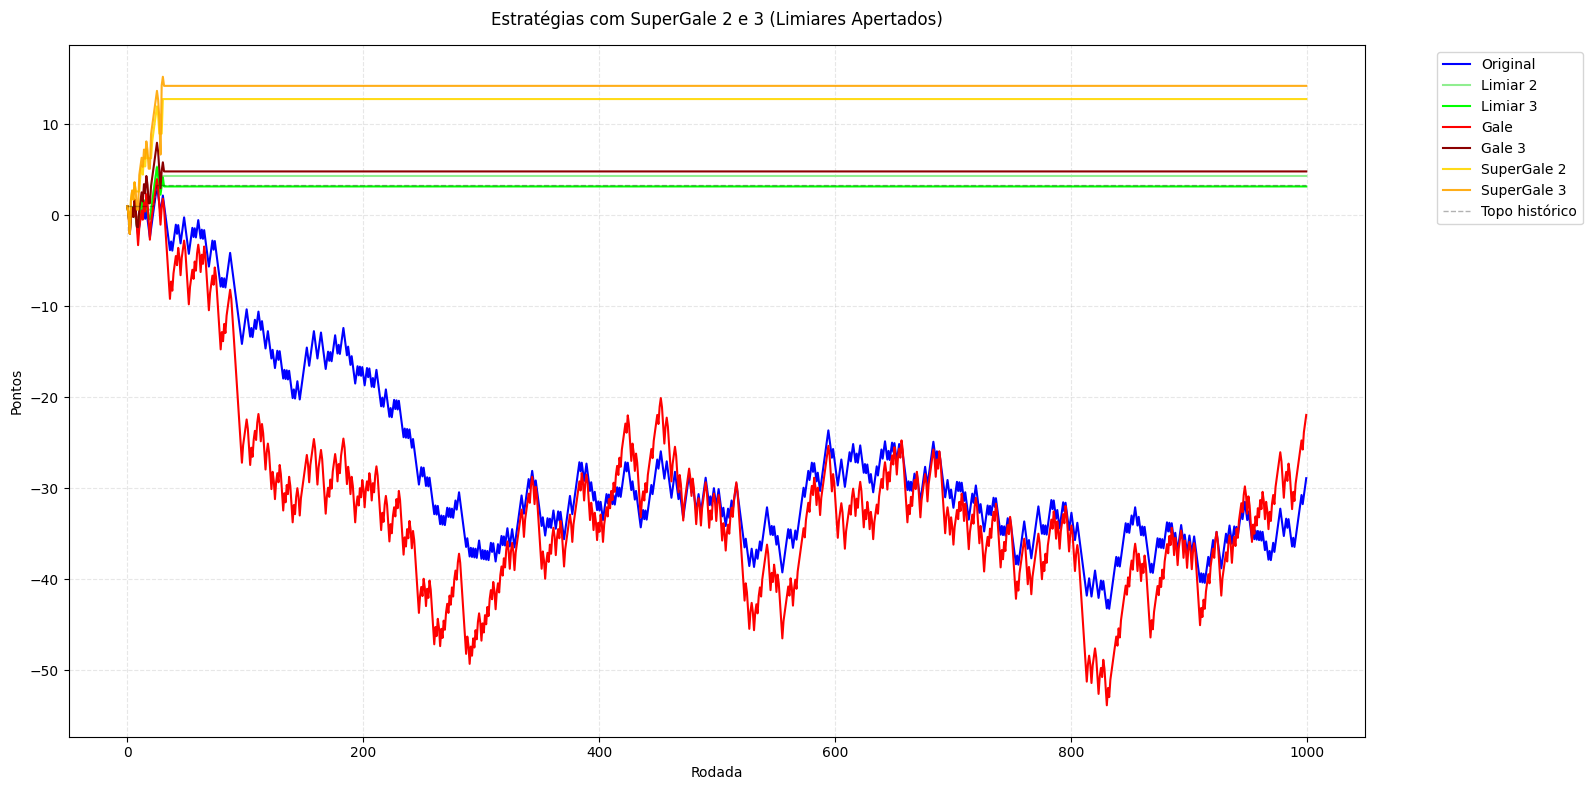

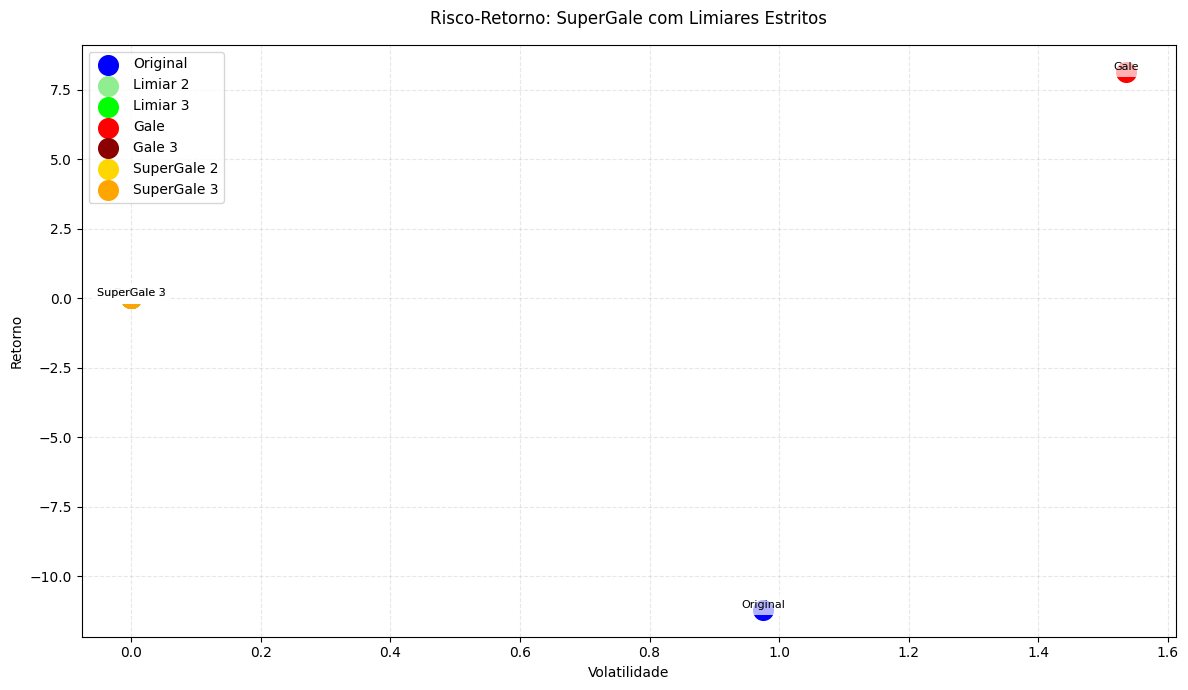

In [13]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 1000
ponto_cara = 0.95
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

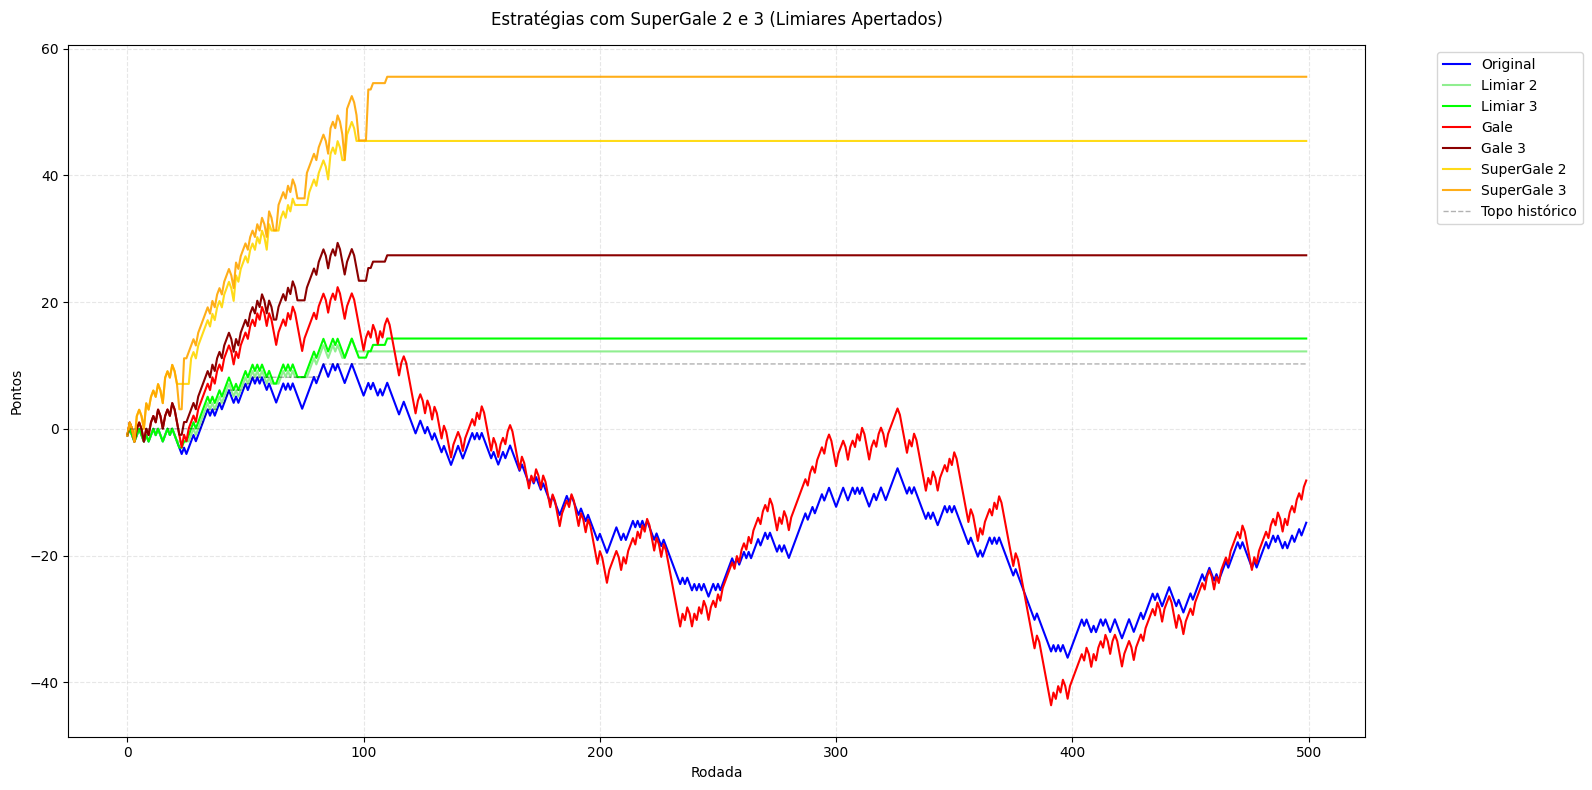

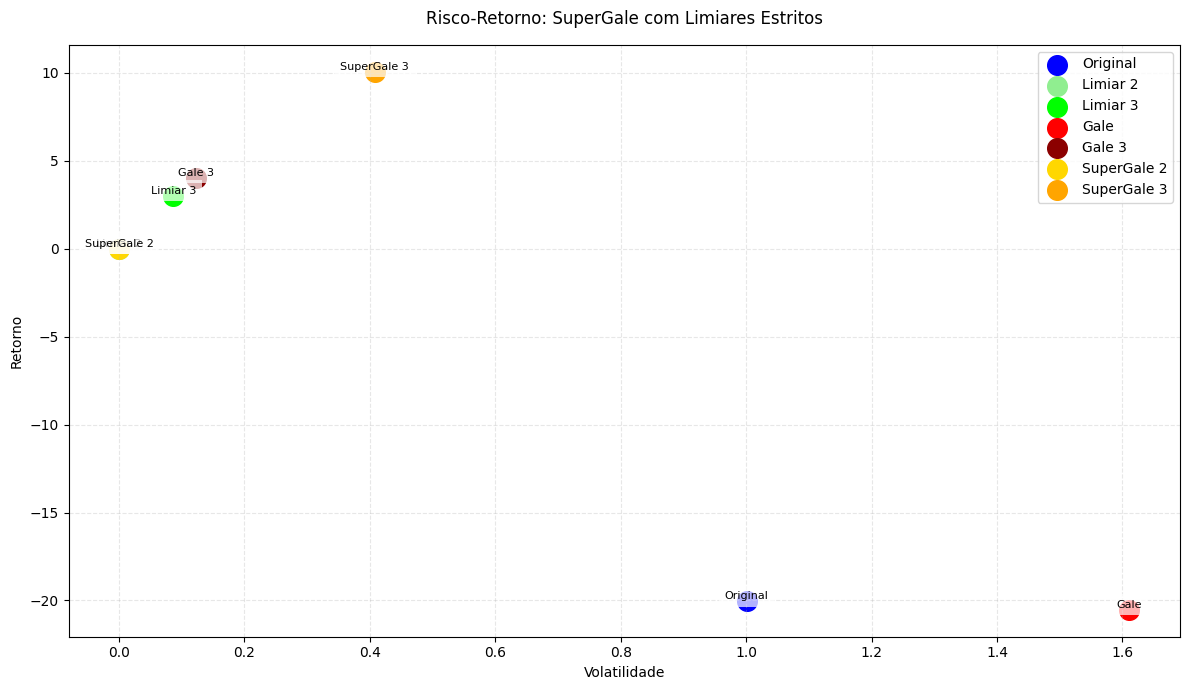

In [14]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 500
ponto_cara = 1.005
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

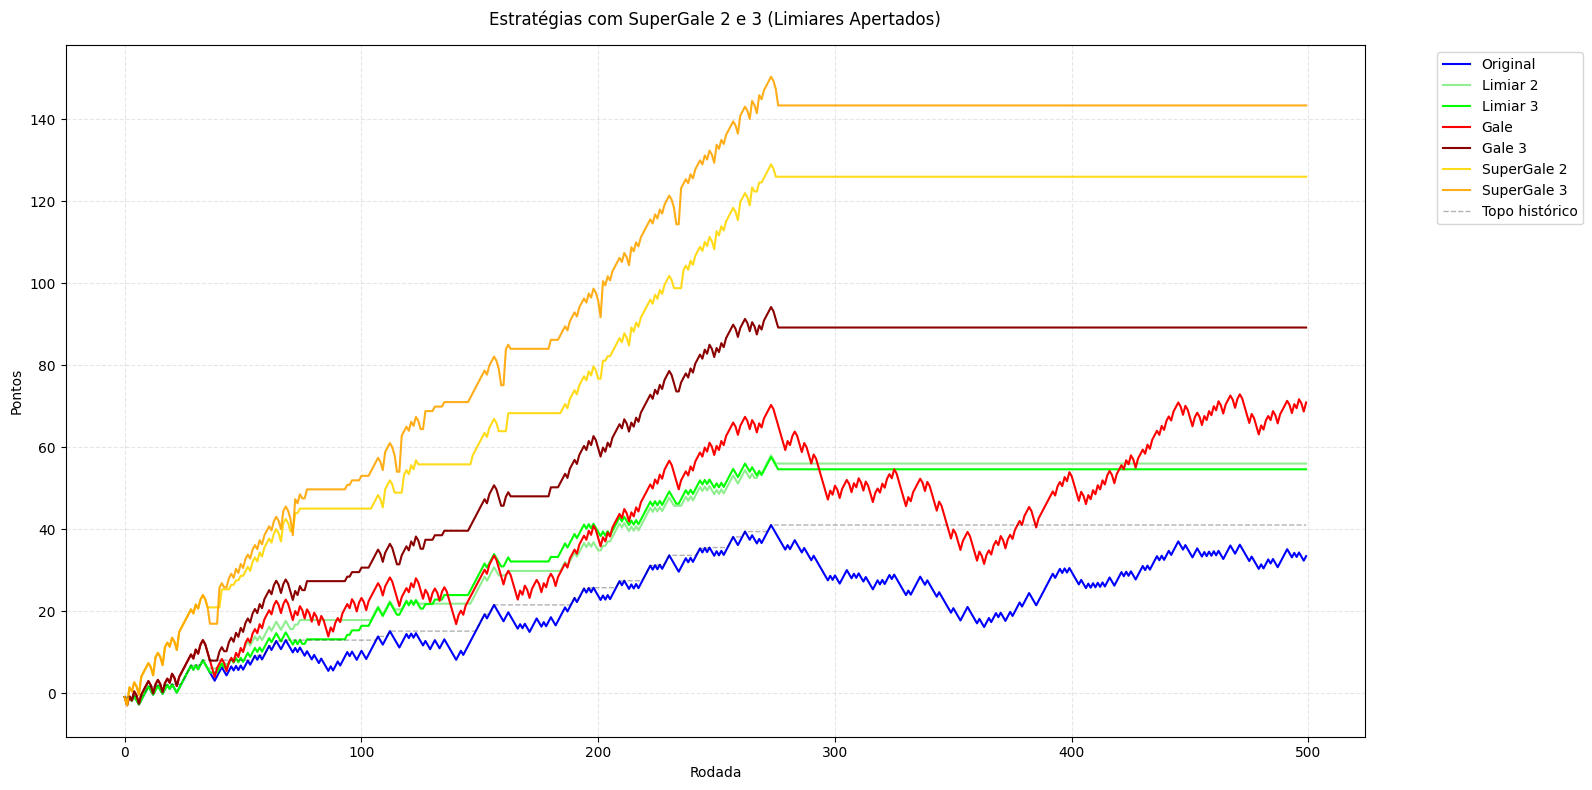

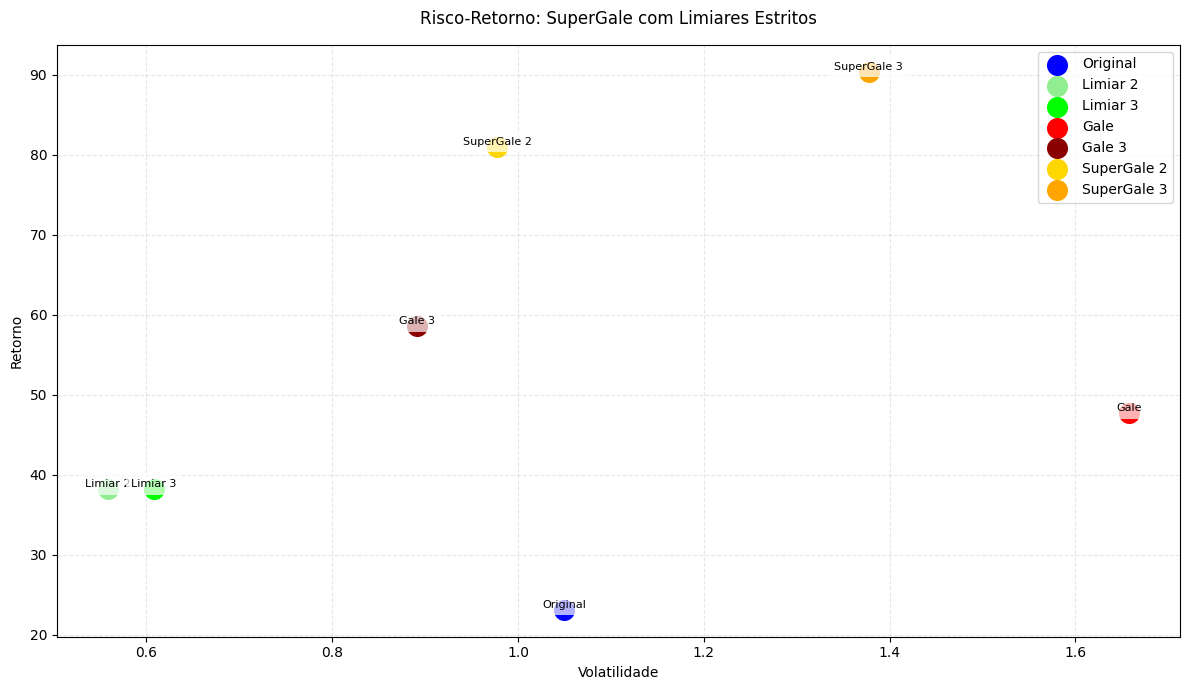

In [15]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 500
ponto_cara = 1.1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

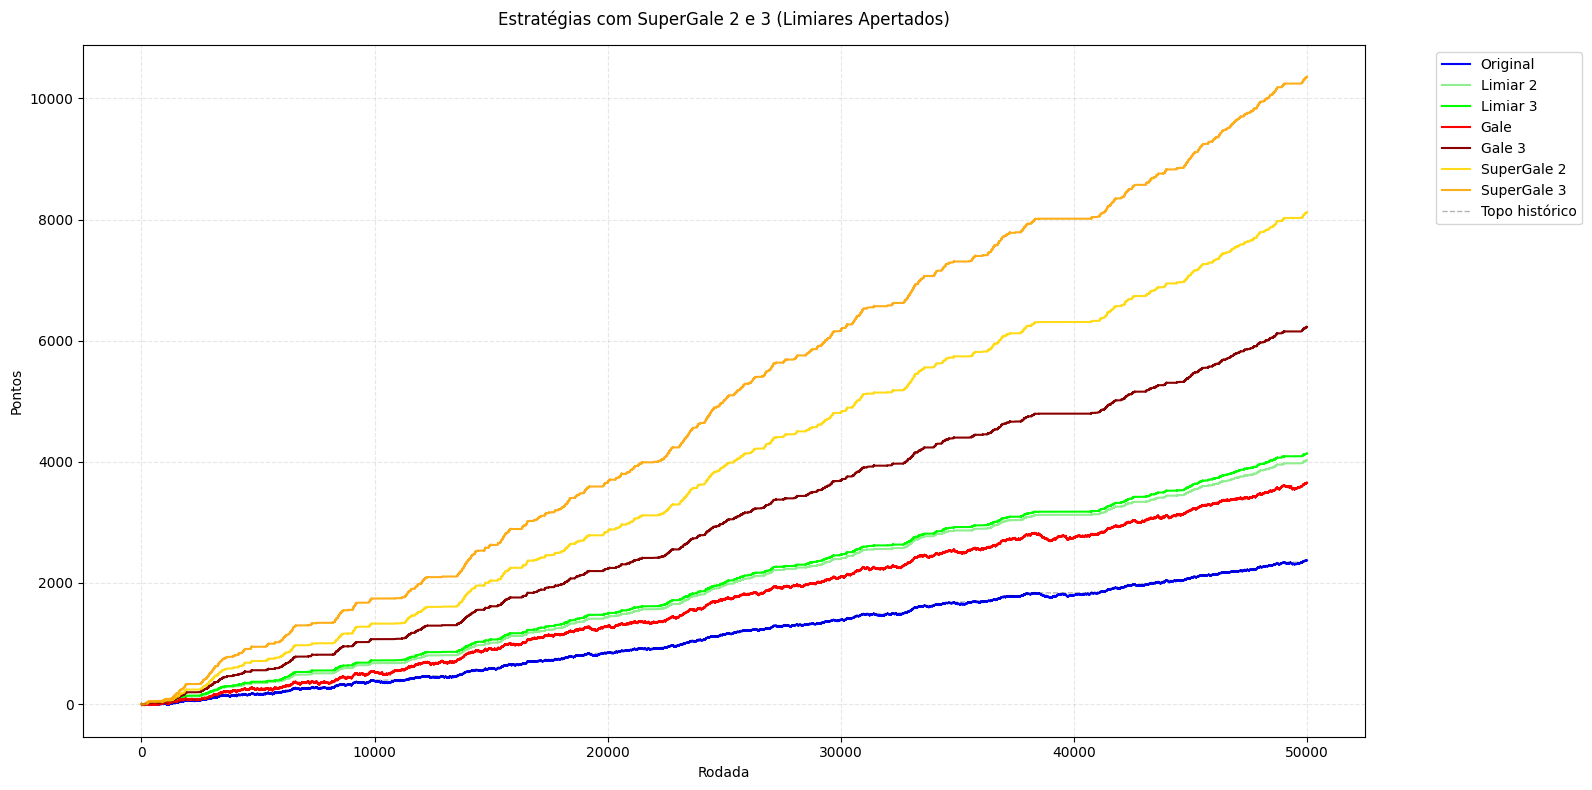

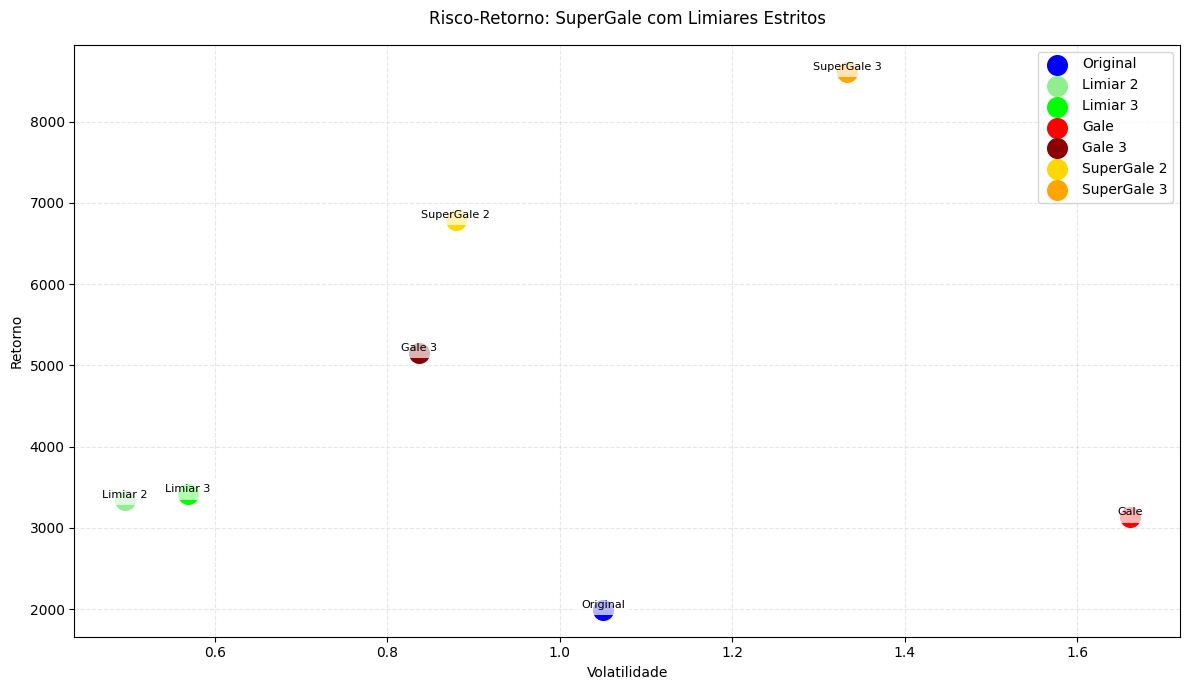

In [16]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 50000
ponto_cara = 1.1
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

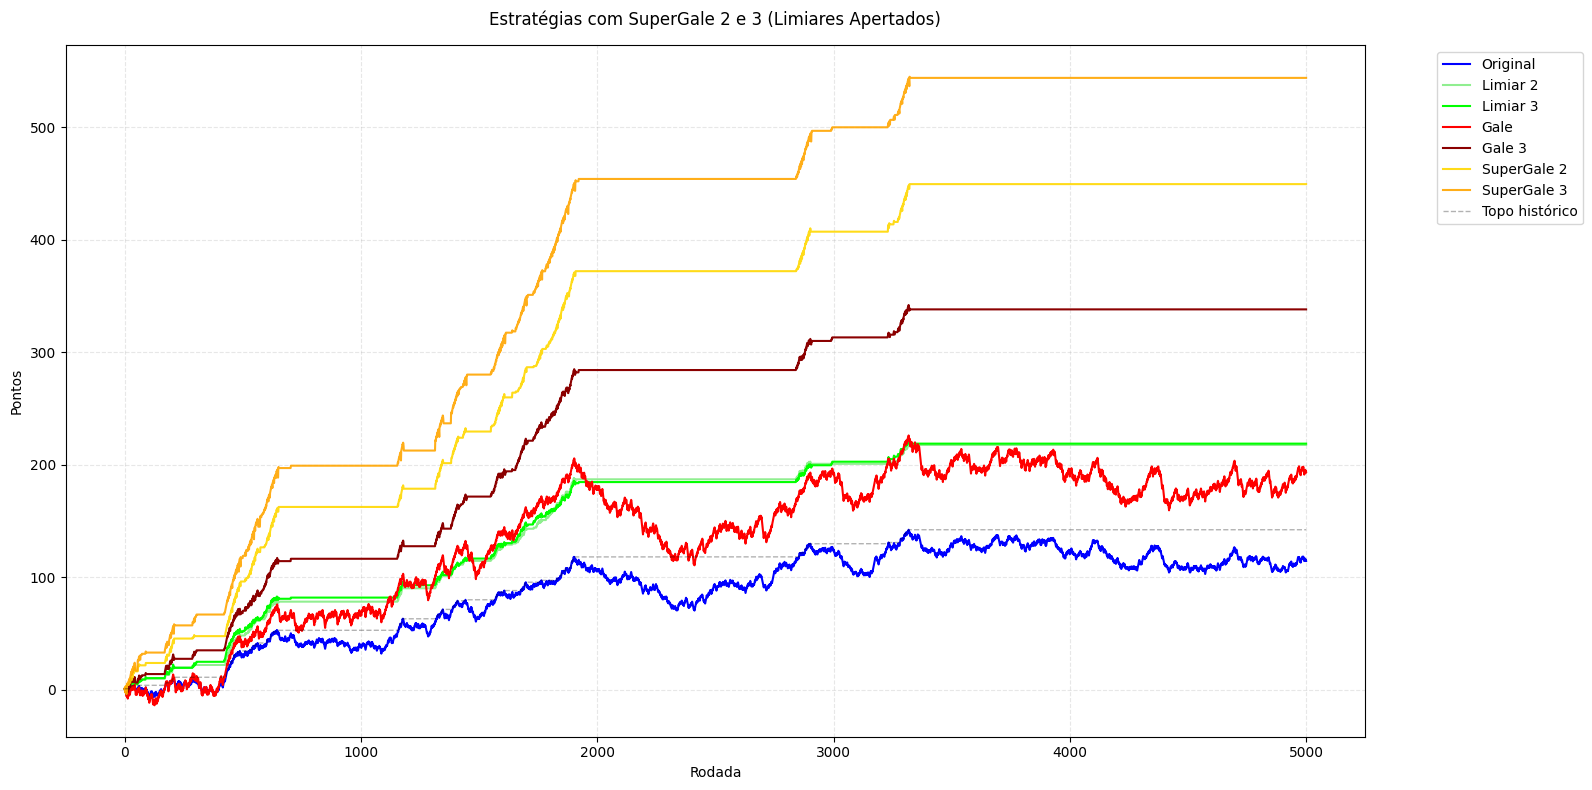

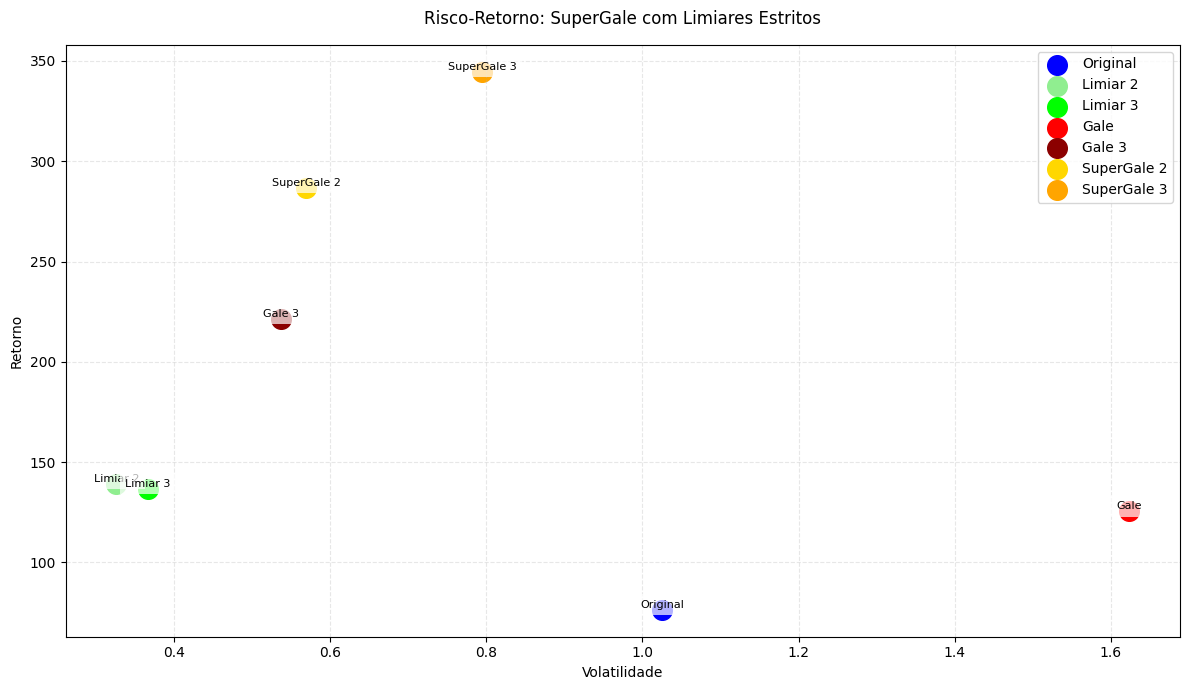

In [17]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen'},
    'Limiar 3': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'gold', 'perdas_consec': 0},
    'SuperGale 3': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if 'Gale' in nome:
            # Verifica limiar para as versões com filtro
            aplicar_estrategia = True
            if nome == 'Gale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)
            elif nome == 'SuperGale 2':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 2)
            elif nome == 'SuperGale 3':
                aplicar_estrategia = (topo_historico[-1] - pontos <= 3)

            if aplicar_estrategia:
                if resultado < 0.5:  # Vitória
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] = 0
                    else:  # Gale normal
                        dados['pontos'] += ponto_cara * dados['mult']
                        dados['mult'] = 1
                else:  # Derrota
                    if 'SuperGale' in nome:
                        dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                        dados['perdas_consec'] += 1
                    else:  # Gale normal
                        dados['pontos'] += ponto_coroa * dados['mult']
                        dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(16, 8))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 3', 'Gale', 'Gale 3', 'SuperGale 2', 'SuperGale 3']

for nome in ordem_estrategias:
    dados = estrategias[nome]
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5,
             alpha=0.9 if 'SuperGale' in nome else 1)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Estratégias com SuperGale 2 e 3 (Limiares Apertados)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno (últimas 80% das rodadas)
plt.figure(figsize=(12, 7))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    evolucao = dados['evolucao'][int(num_rodadas*0.2):]
    retorno = evolucao[-1] - evolucao[0]
    volatilidade = np.std(np.diff(evolucao))

    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Risco-Retorno: SuperGale com Limiares Estritos', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

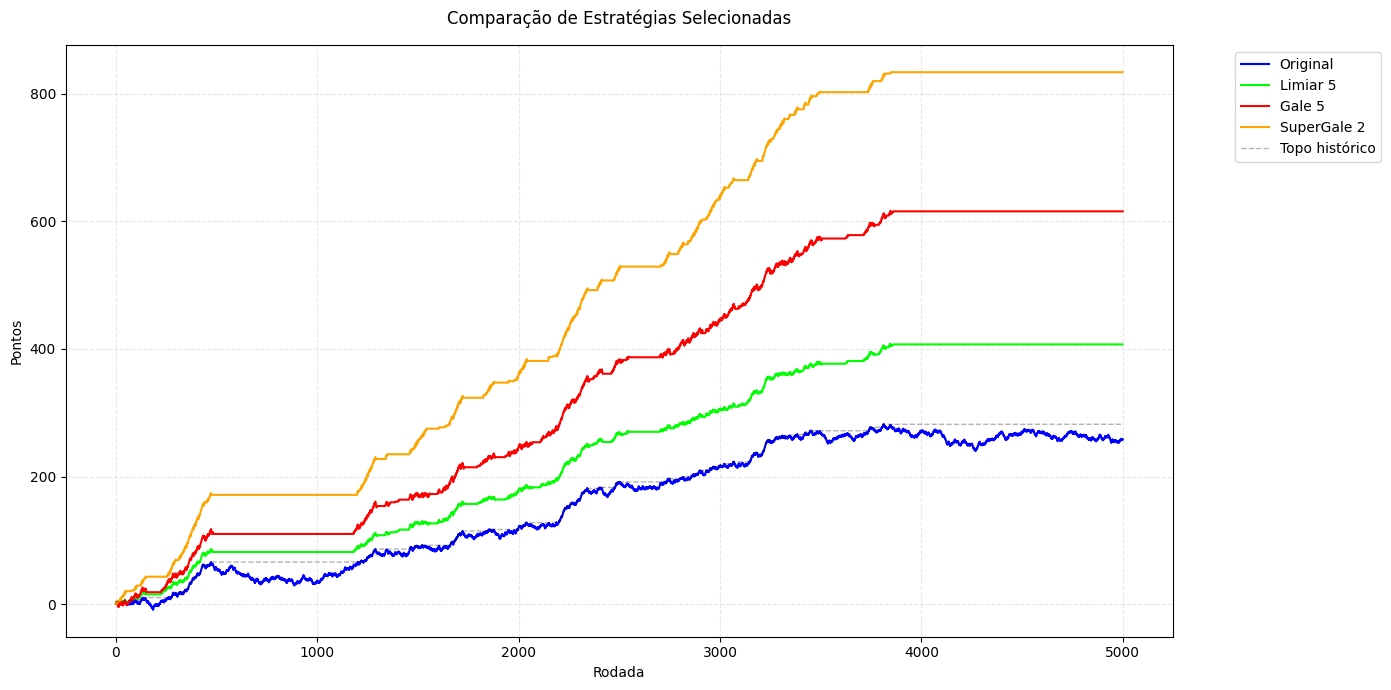

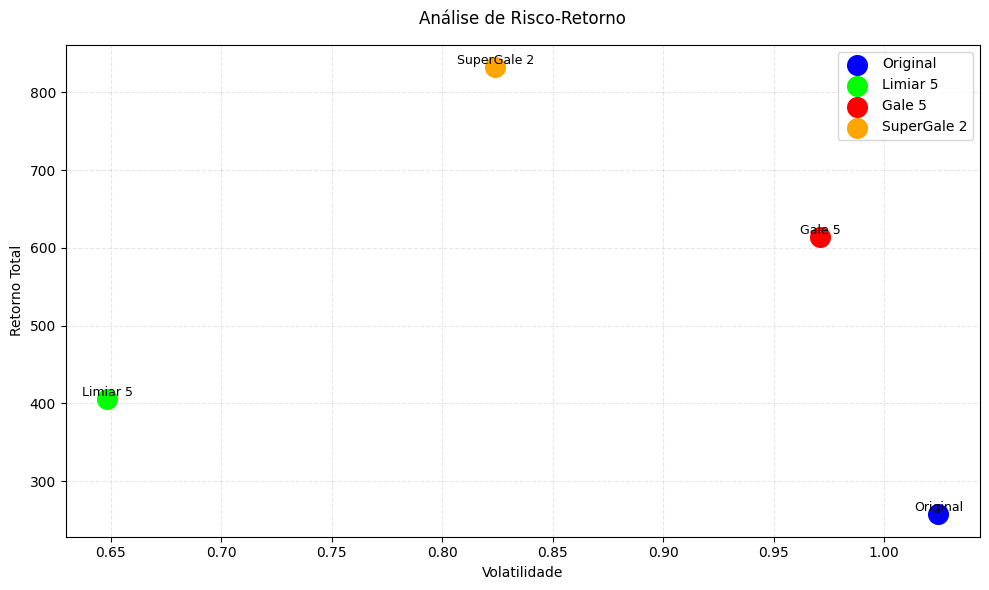

In [18]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 5': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias com Gale
        if nome == 'Gale 5':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 5:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
cores = ['blue', 'lime', 'red', 'orange']
for nome, cor in zip(estrategias.keys(), cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias Selecionadas', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=9, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

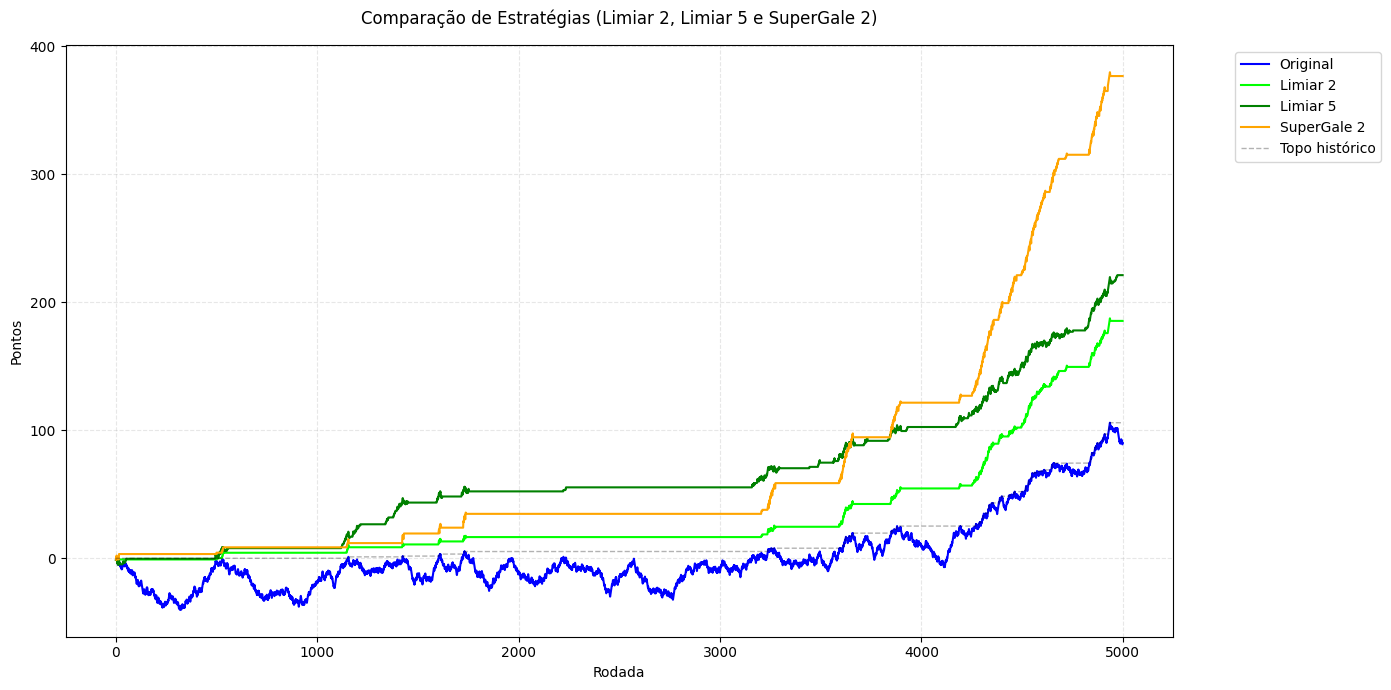

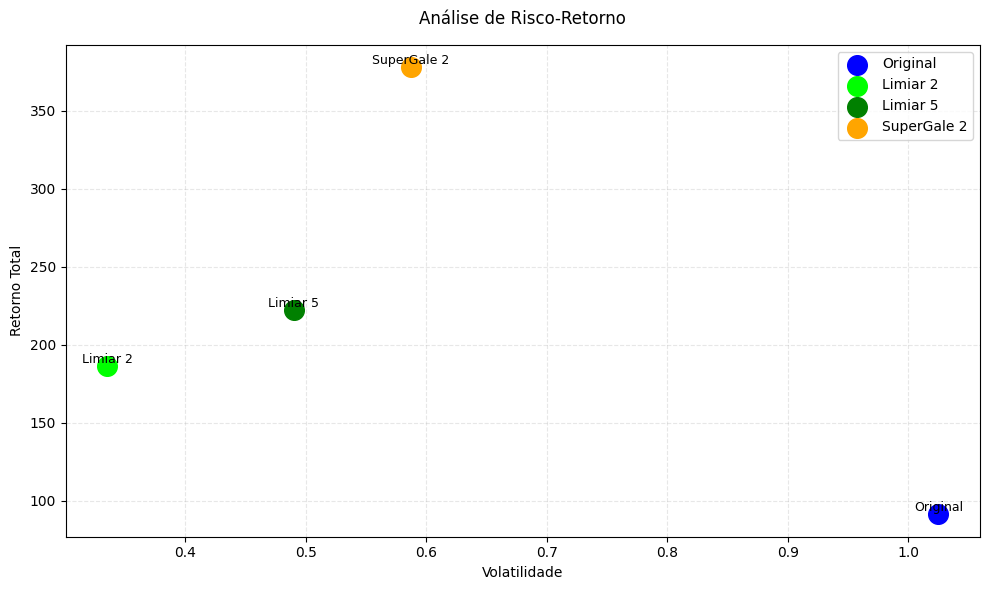

In [19]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 5': {'pontos': 0, 'evolucao': [], 'cor': 'green'},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome in ['Limiar 2', 'Limiar 5']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
for nome, dados in estrategias.items():
    plt.plot(dados['evolucao'], color=dados['cor'], label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias (Limiar 2, Limiar 5 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome, dados in estrategias.items():
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=9, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

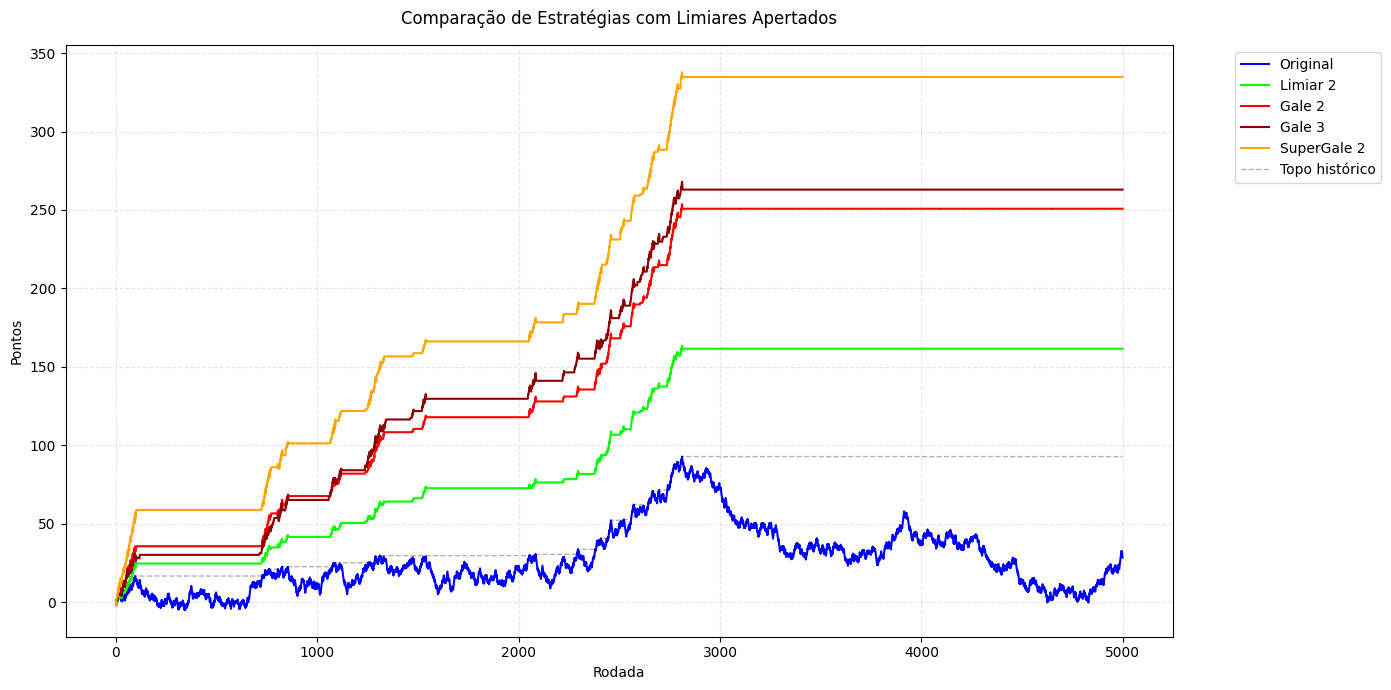

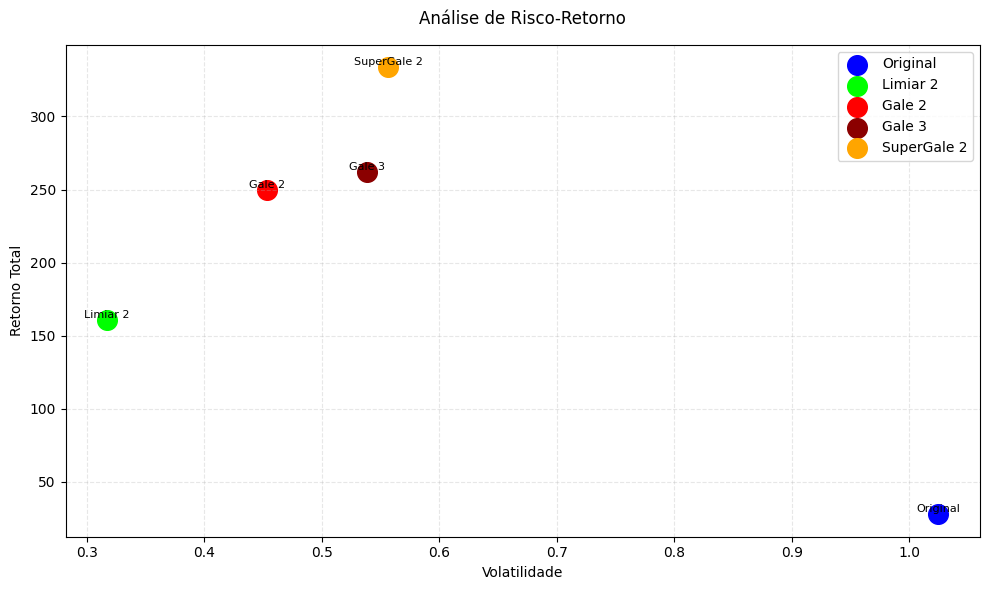

In [20]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 3': {'pontos': 0, 'evolucao': [], 'cor': 'darkred', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if nome in ['Gale 2', 'Gale 3']:
            limiar = int(nome.split()[-1])
            diferenca = topo_historico[-1] - pontos
            if diferenca <= limiar:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Gale 2', 'Gale 3', 'SuperGale 2']
cores = ['blue', 'lime', 'red', 'darkred', 'orange']

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Limiares Apertados', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

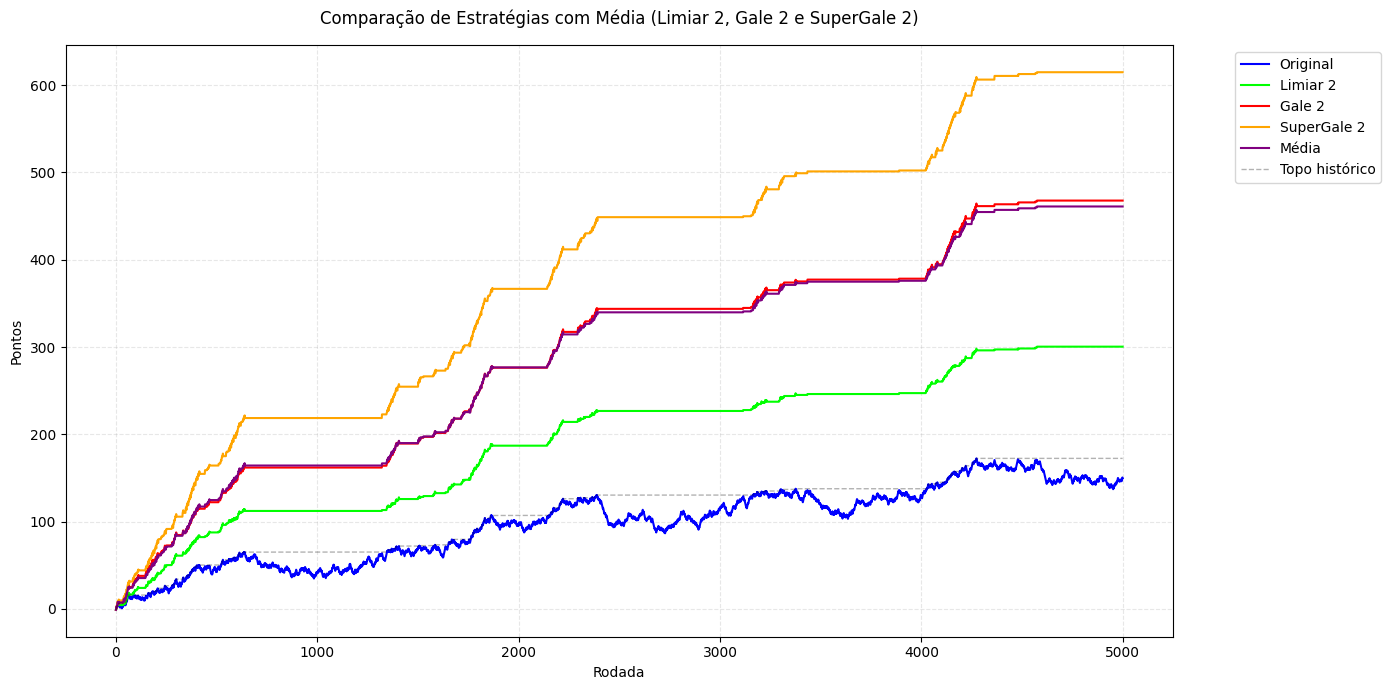

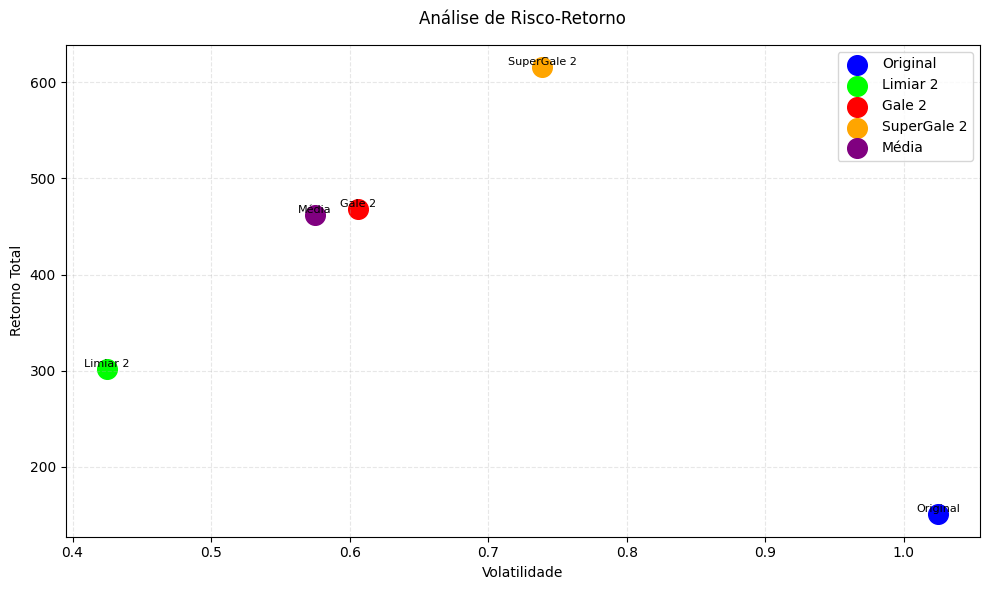

In [21]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias selecionadas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média']
cores = ['blue', 'lime', 'red', 'orange', 'purple']

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Média (Limiar 2, Gale 2 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

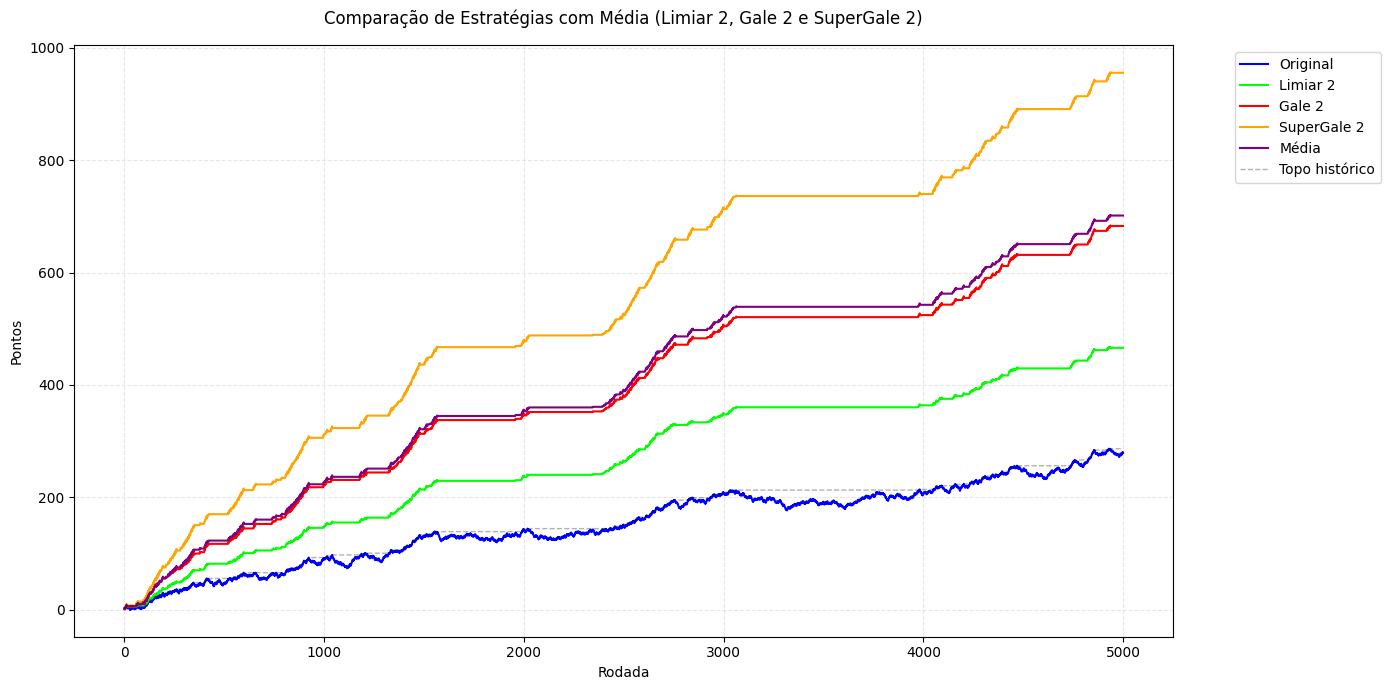

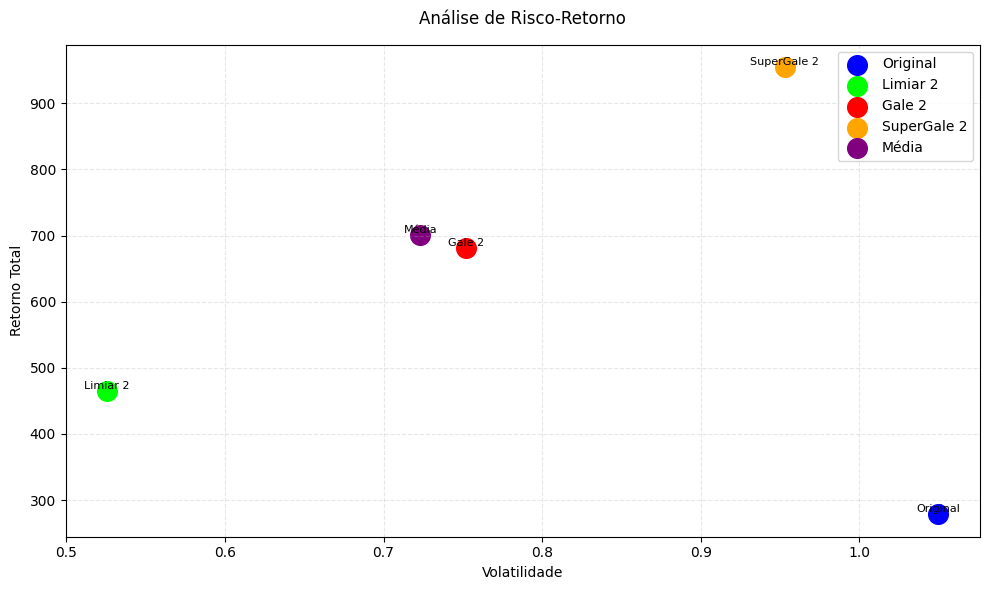

In [22]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.10
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias selecionadas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média']
cores = ['blue', 'lime', 'red', 'orange', 'purple']

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Média (Limiar 2, Gale 2 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

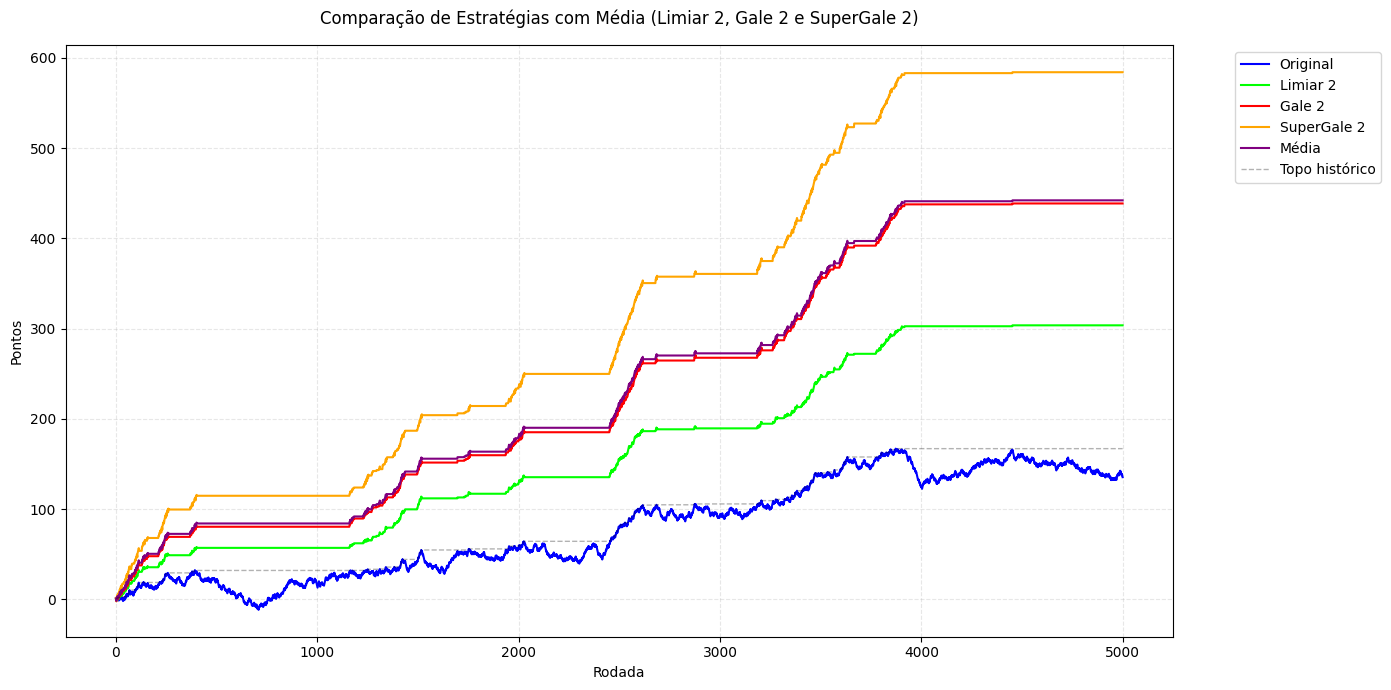

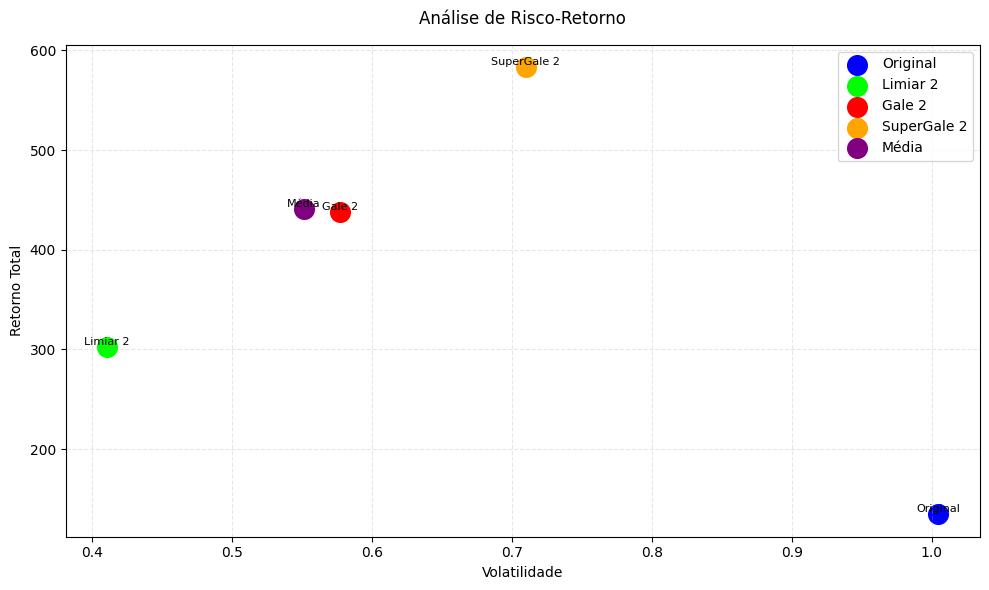

In [23]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.01
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias selecionadas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média']
cores = ['blue', 'lime', 'red', 'orange', 'purple']

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Média (Limiar 2, Gale 2 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

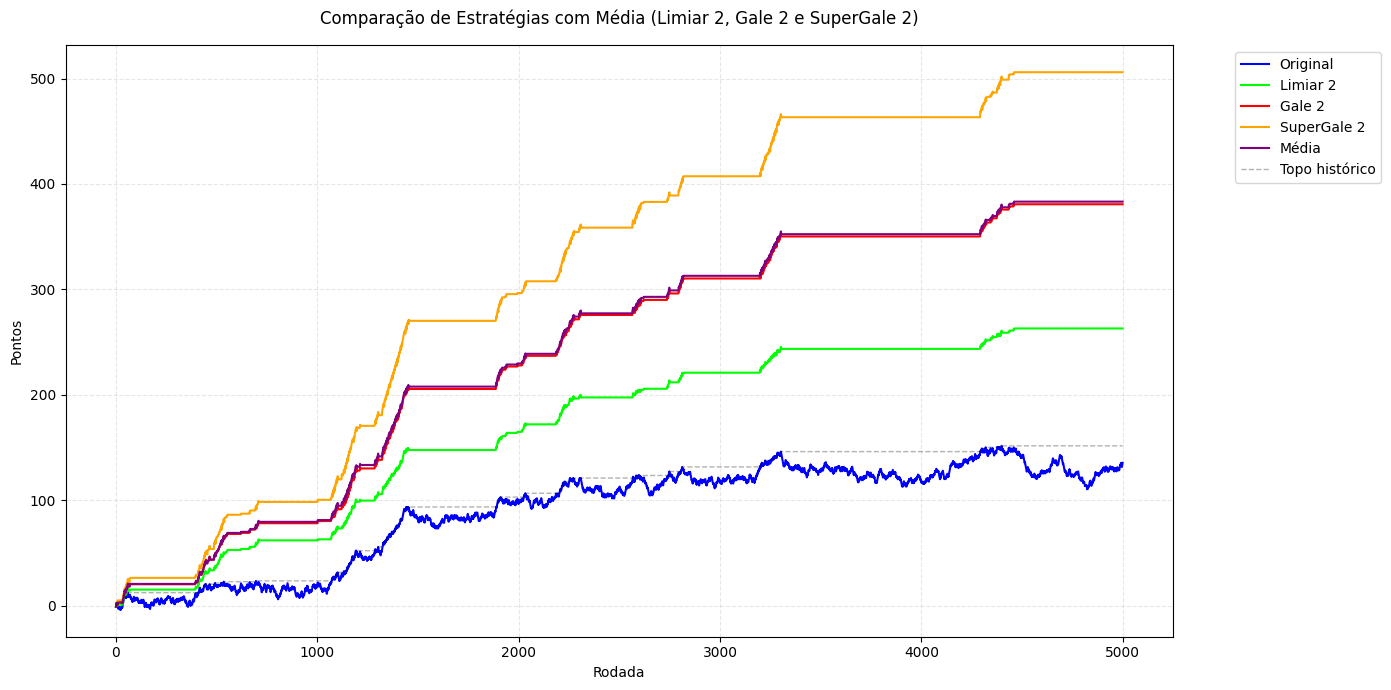

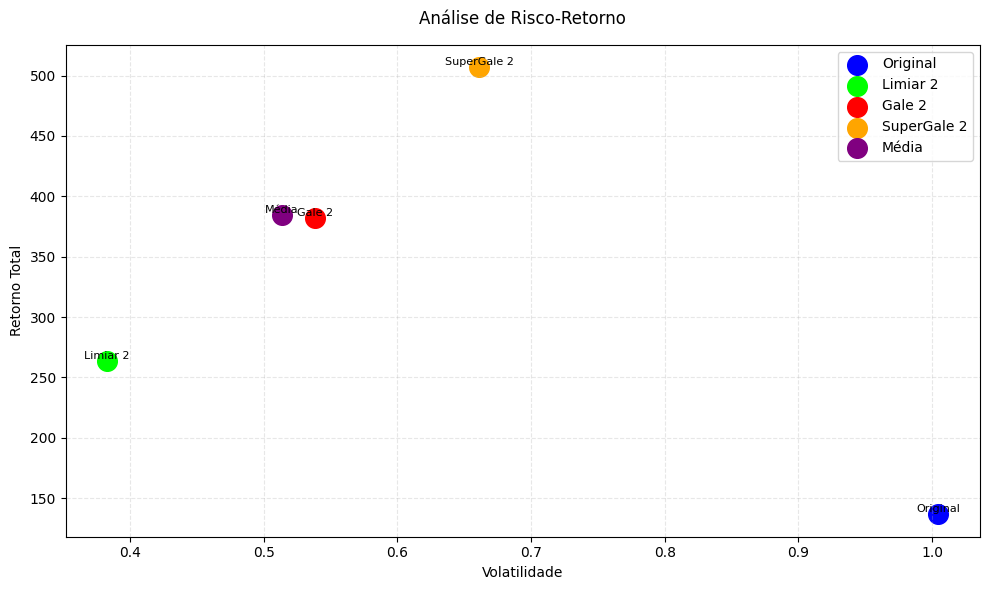

In [24]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.01
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        if nome == 'Limiar 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias selecionadas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média']
cores = ['blue', 'lime', 'red', 'orange', 'purple']

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Média (Limiar 2, Gale 2 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

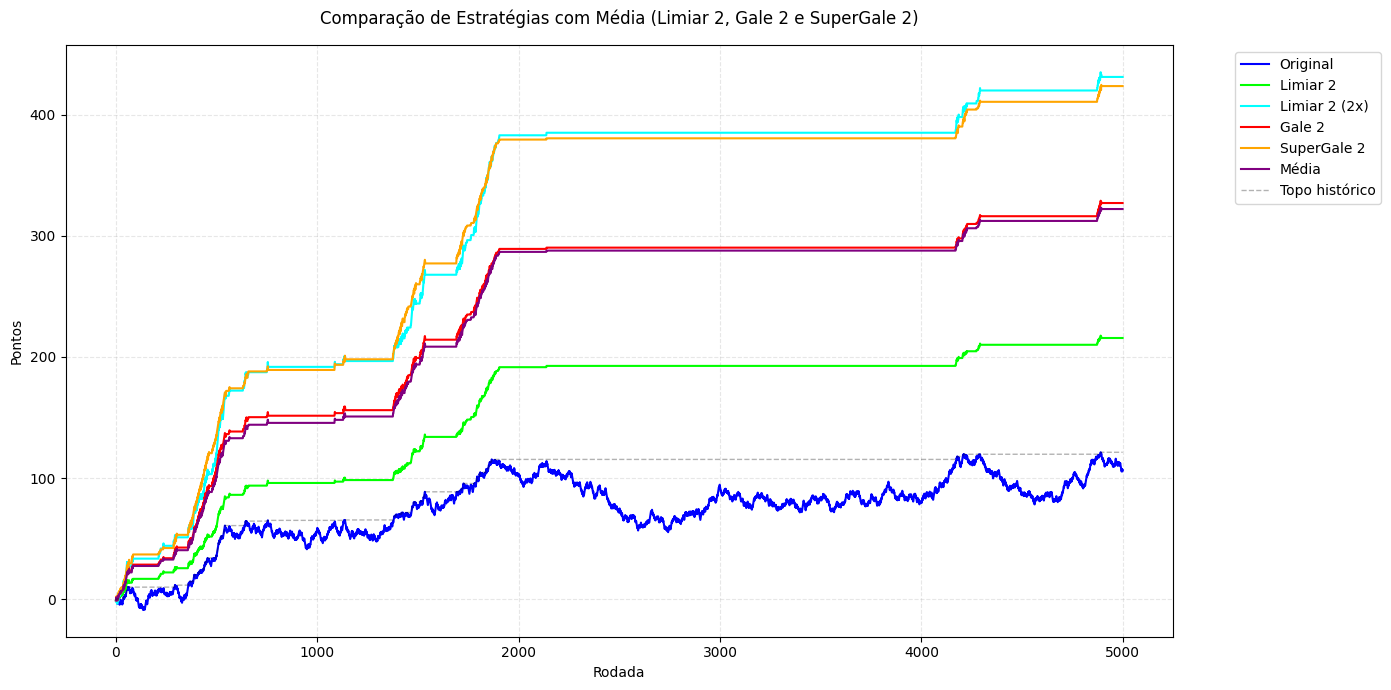

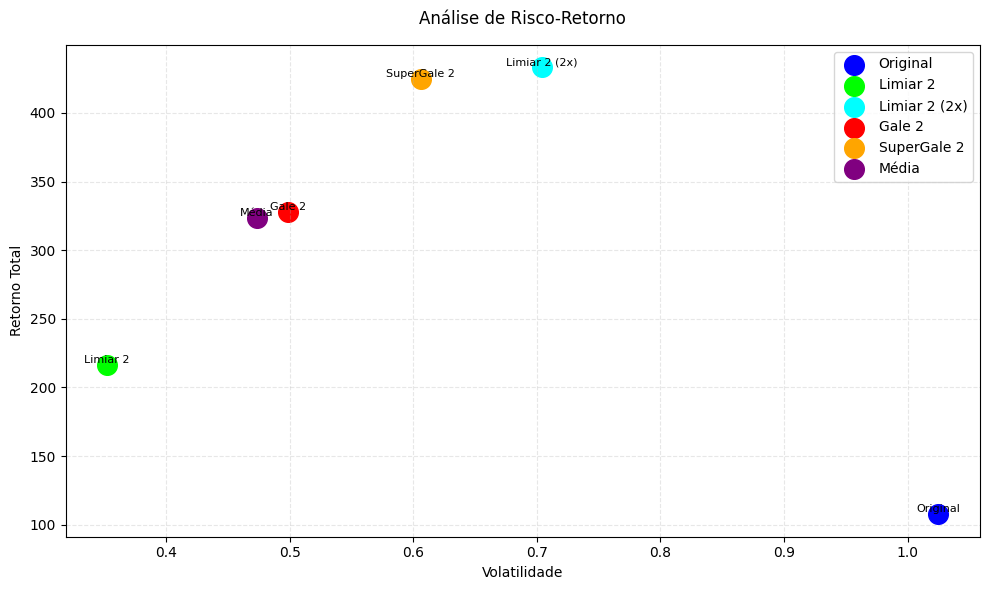

In [25]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_cara = 1.05
ponto_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 2 (2x)': {'pontos': 0, 'evolucao': [], 'cor': 'cyan'},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# Simulação
for rodada in range(num_rodadas):
    resultado = secrets.SystemRandom().random()
    pontos += ponto_cara if resultado < 0.5 else ponto_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        diferenca = topo_historico[-1] - pontos

        if nome == 'Limiar 2':
            if diferenca <= 2:
                dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Limiar 2 (2x)':
            if diferenca <= 2:
                dados['pontos'] += 2.10 if resultado < 0.5 else -2.0
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'Gale 2':
            if diferenca <= 2:
                if resultado < 0.5:
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome == 'SuperGale 2':
            if diferenca <= 2:
                if resultado < 0.5:
                    dados['pontos'] += ponto_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:
                    dados['pontos'] += ponto_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias selecionadas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas
plt.figure(figsize=(14, 7))
ordem_estrategias = ['Original', 'Limiar 2', 'Limiar 2 (2x)', 'Gale 2', 'SuperGale 2', 'Média']
cores = [estrategias[n]['cor'] for n in ordem_estrategias]

for nome, cor in zip(ordem_estrategias, cores):
    plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Média (Limiar 2, Gale 2 e SuperGale 2)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(10, 6))
for nome in ordem_estrategias:
    dados = estrategias[nome]
    retorno = dados['evolucao'][-1] - dados['evolucao'][0]
    volatilidade = np.std(np.diff(dados['evolucao']))
    plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')

plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

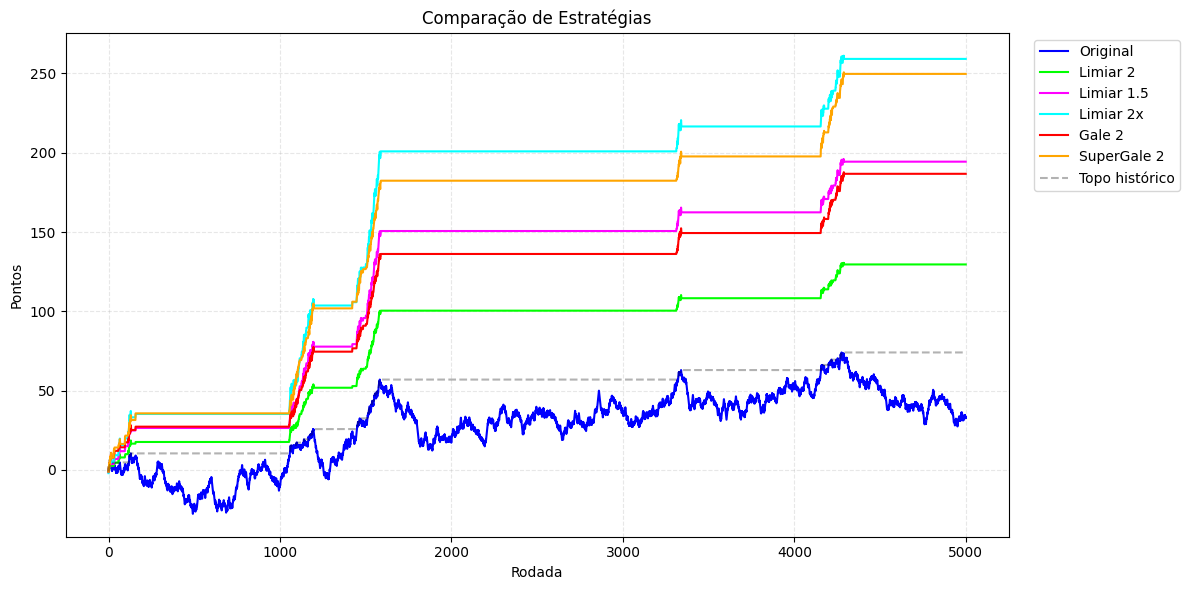

In [28]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÃO === #
NUM_RODADAS = 5000
PONTO_CARA = 1.05
PONTO_COROA = -1.0

# Definição das estratégias
estrategias = {
    'Original':   {'evo': [], 'cor': 'blue'},
    'Limiar 2':   {'evo': [], 'cor': 'lime',    'limiar': 2,   'peso_c': PONTO_CARA,   'peso_e': PONTO_COROA},
    'Limiar 1.5': {'evo': [], 'cor': 'magenta','limiar': 2,   'peso_c': PONTO_CARA*1.5,'peso_e': PONTO_COROA*1.5},
    'Limiar 2x':  {'evo': [], 'cor': 'cyan',   'limiar': 2,   'peso_c':  2.10,        'peso_e': -2.00},
    'Gale 2':     {'evo': [], 'cor': 'red',    'limiar': 2,   'mult': 1},
    'SuperGale 2':{'evo': [], 'cor': 'orange','limiar': 2,   'perdas': 0}
}

# históricos gerais
pontos_base = 0
topo_historico = []

for rodada in range(NUM_RODADAS):
    # 1) jogada
    cara = secrets.SystemRandom().random() < 0.5
    pontos_base += PONTO_CARA if cara else PONTO_COROA
    topo_historico.append(max(topo_historico[-1], pontos_base) if rodada else pontos_base)

    # 2) atualiza cada estratégia
    for nome, s in estrategias.items():
        if nome == 'Original':
            s['evo'].append(pontos_base)
            continue

        diff = topo_historico[-1] - pontos_base

        # Limiar simples (peso fixo)
        if nome.startswith('Limiar'):
            if diff <= s['limiar']:
                s['evo'].append(s.get('pontos', 0) + (s['peso_c'] if cara else s['peso_e']))
                s['pontos'] = s['evo'][-1]
            else:
                s['evo'].append(s.get('pontos', 0))
            continue

        # Gale 2
        if nome == 'Gale 2':
            if diff <= s['limiar']:
                if cara:
                    ganho = PONTO_CARA * s['mult']
                    s['mult'] = 1
                else:
                    ganho = PONTO_COROA * s['mult']
                    s['mult'] = 2
                s['pontos'] = s.get('pontos', 0) + ganho
            s['evo'].append(s.get('pontos', 0))
            continue

        # SuperGale 2
        if nome == 'SuperGale 2':
            if diff <= s['limiar']:
                exp = 2 ** s['perdas']
                if cara:
                    ganho = PONTO_CARA * exp
                    s['perdas'] = 0
                else:
                    ganho = PONTO_COROA * exp
                    s['perdas'] += 1
                s['pontos'] = s.get('pontos', 0) + ganho
            s['evo'].append(s.get('pontos', 0))

# Gráfico de comparação
plt.figure(figsize=(12,6))
for nome, s in estrategias.items():
    plt.plot(s['evo'], label=nome, color=s['cor'], linewidth=1.5)
plt.plot(topo_historico, 'k--', label='Topo histórico', alpha=0.3)
plt.title('Comparação de Estratégias')
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.02,1))
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

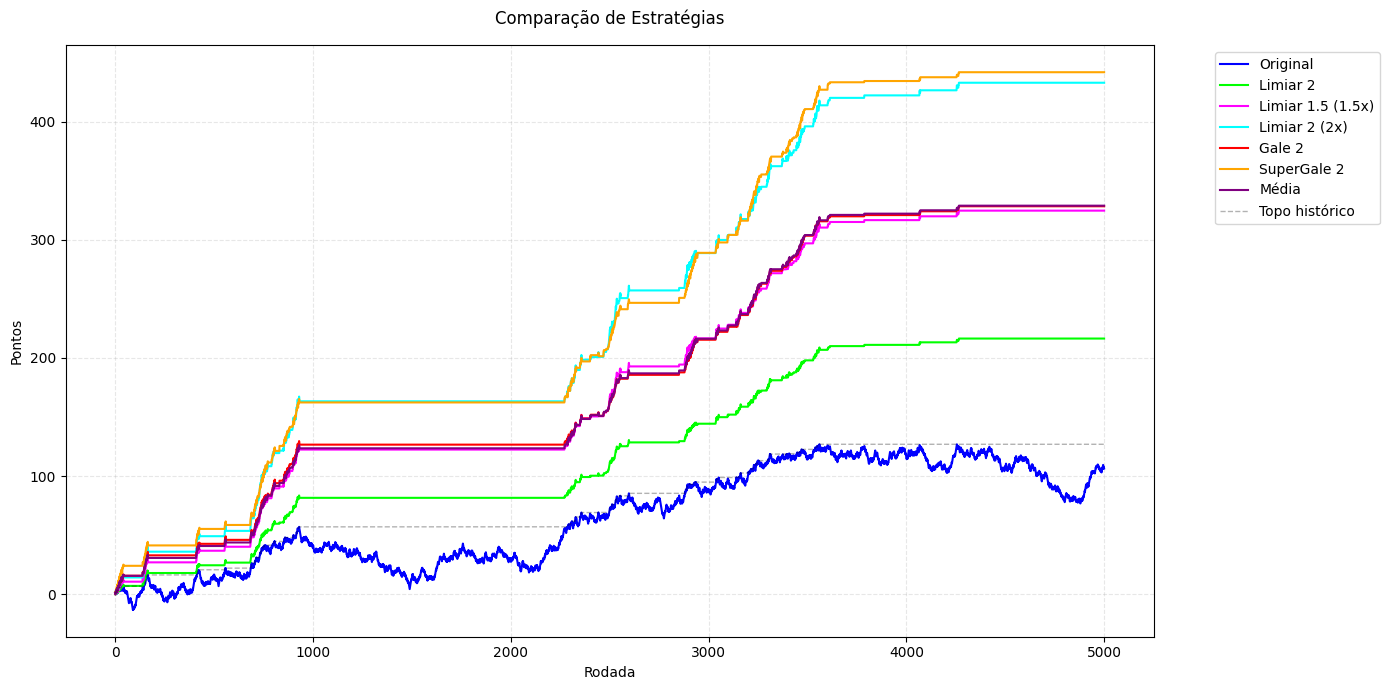

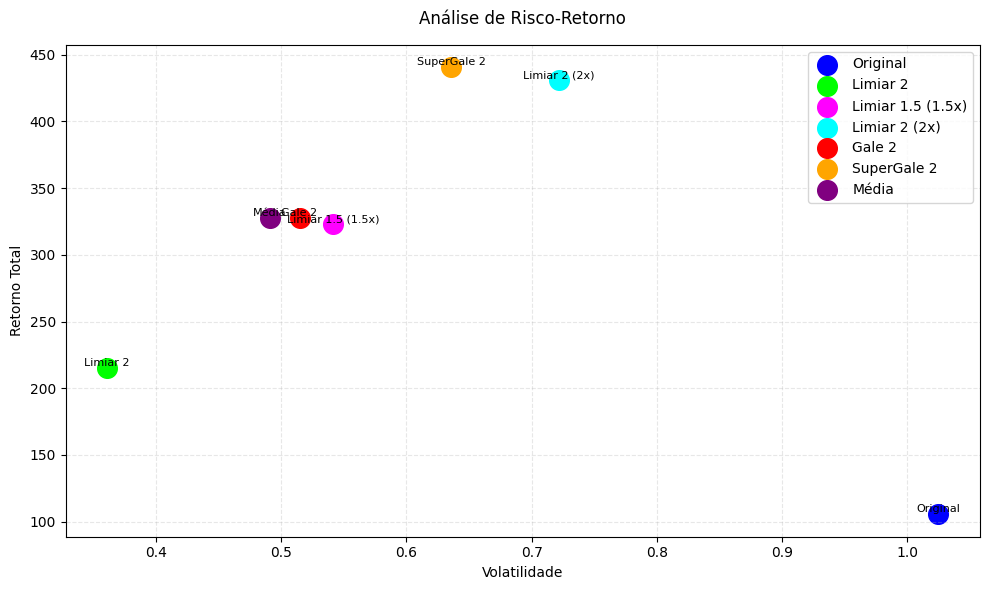

In [31]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES ===
NUM_RODADAS        = 5000
PONTO_CARA         = 1.05
PONTO_COROA        = -1.0
LIMIAR_VALOR       = 2

# Pesos para as estratégias de limiar
PESO_LIMIAR_1X     = (PONTO_CARA, PONTO_COROA)
PESO_LIMIAR_1_5X   = (PONTO_CARA * 1.5, PONTO_COROA * 1.5)
PESO_LIMIAR_2X     = (2.10, -2.00)

# === INICIALIZAÇÃO ===
pontos = 0
evolucao_pontos = []
topo_historico = []

estrategias = {
    'Original':            {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2':            {'pontos': 0, 'evolucao': [], 'cor': 'lime',     'peso': PESO_LIMIAR_1X},
    'Limiar 1.5 (1.5x)':   {'pontos': 0, 'evolucao': [], 'cor': 'magenta', 'peso': PESO_LIMIAR_1_5X},
    'Limiar 2 (2x)':       {'pontos': 0, 'evolucao': [], 'cor': 'cyan',    'peso': PESO_LIMIAR_2X},
    'Gale 2':              {'pontos': 0, 'evolucao': [], 'cor': 'red',     'mult': 1},
    'SuperGale 2':         {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0}
}

# === SIMULAÇÃO ===
for rodada in range(NUM_RODADAS):
    resultado = secrets.SystemRandom().random()
    pontos += PONTO_CARA if resultado < 0.5 else PONTO_COROA
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    for nome, dados in estrategias.items():    # note: sem acento
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        diferenca = topo_historico[-1] - pontos

        # Limiar genérico (1x, 1.5x e 2x)
        if nome.startswith('Limiar'):
            peso_c, peso_e = dados['peso']
            if diferenca <= LIMIAR_VALOR:
                dados['pontos'] += peso_c if resultado < 0.5 else peso_e
            dados['evolucao'].append(dados['pontos'])
            continue

        # Gale 2
        if nome == 'Gale 2':
            if diferenca <= LIMIAR_VALOR:
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * dados['mult']
                    dados['mult'] = 1
                else:
                    dados['pontos'] += PONTO_COROA * dados['mult']
                    dados['mult'] = 2
            dados['evolucao'].append(dados['pontos'])
            continue

        # SuperGale 2
        if nome == 'SuperGale 2':
            if diferenca <= LIMIAR_VALOR:
                exp = 2 ** dados['perdas_consec']
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * exp
                    dados['perdas_consec'] = 0
                else:
                    dados['pontos'] += PONTO_COROA * exp
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# === MÉDIA DAS ESTRATÉGIAS SELECIONADAS ===
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)
estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# === GRÁFICO 1: COMPARAÇÃO DE LINHAS ===
plt.figure(figsize=(14, 7))
ordem = [
    'Original', 'Limiar 2', 'Limiar 1.5 (1.5x)', 'Limiar 2 (2x)',
    'Gale 2', 'SuperGale 2', 'Média'
]
for nome in ordem:
    plt.plot(
        estrategias[nome]['evolucao'],
        color=estrategias[nome]['cor'],
        label=nome,
        linewidth=1.5
    )
plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# === GRÁFICO 2: RISCO-RETORNO ===
plt.figure(figsize=(10, 6))
for nome in ordem:
    evo = estrategias[nome]['evolucao']
    retorno = evo[-1] - evo[0]
    volatilidade = np.std(np.diff(evo))
    plt.scatter(volatilidade, retorno, s=200, color=estrategias[nome]['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')
plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

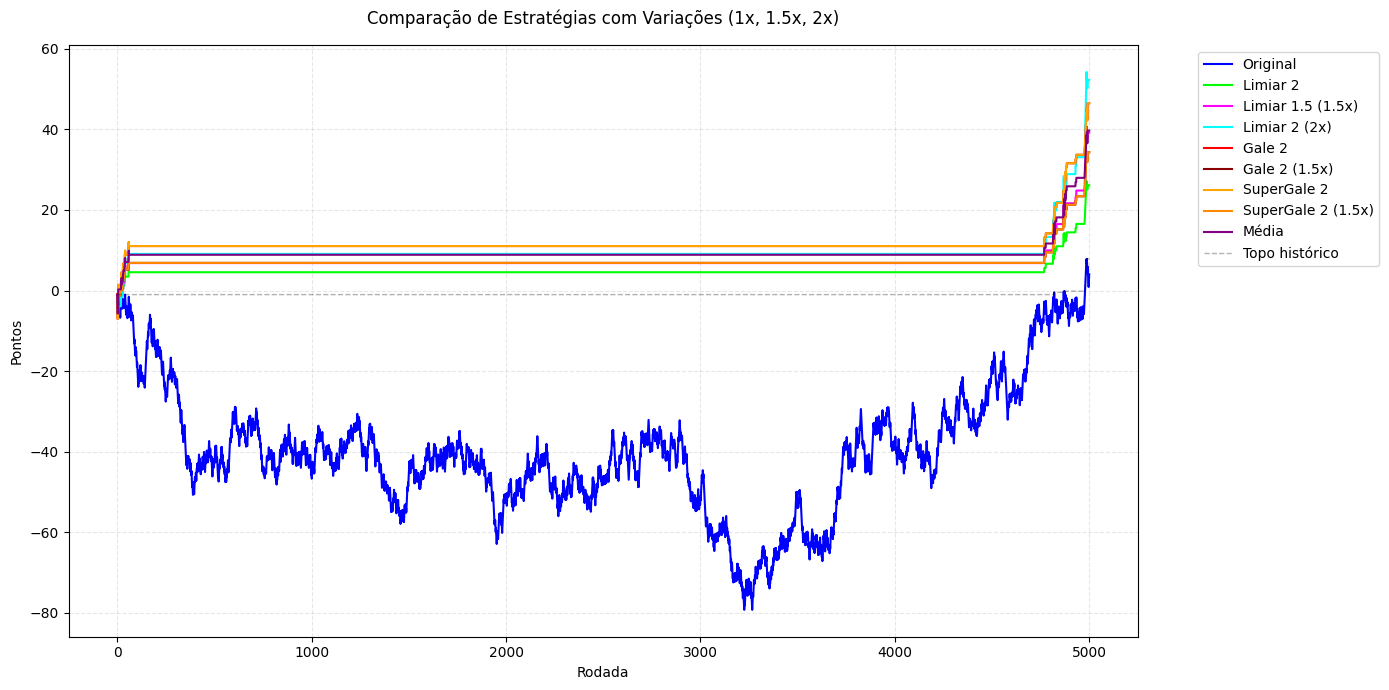

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

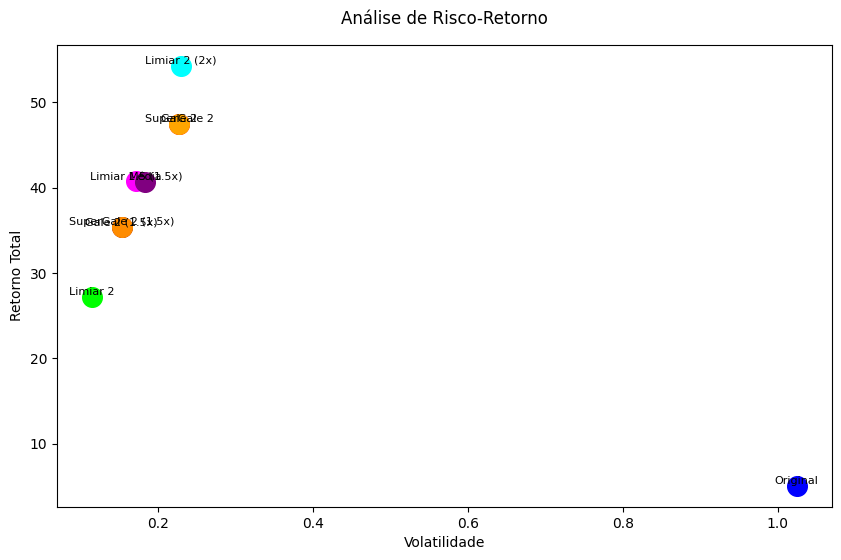

In [32]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES ===
NUM_RODADAS        = 5000
PONTO_CARA         = 1.05
PONTO_COROA        = -1.0
LIMIAR_VALOR       = 2

# Pesos para as estratégias de limiar
PESO_LIMIAR_1X     = (PONTO_CARA, PONTO_COROA)
PESO_LIMIAR_1_5X   = (PONTO_CARA * 1.5, PONTO_COROA * 1.5)
PESO_LIMIAR_2X     = (2.10, -2.00)

# === INICIALIZAÇÃO ===
pontos = 0
evolucao_pontos = []
topo_historico = []

estrategias = {
    'Original':              {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2':              {'pontos': 0, 'evolucao': [], 'cor': 'lime',     'peso': PESO_LIMIAR_1X},
    'Limiar 1.5 (1.5x)':     {'pontos': 0, 'evolucao': [], 'cor': 'magenta',  'peso': PESO_LIMIAR_1_5X},
    'Limiar 2 (2x)':         {'pontos': 0, 'evolucao': [], 'cor': 'cyan',     'peso': PESO_LIMIAR_2X},
    'Gale 2':                {'pontos': 0, 'evolucao': [], 'cor': 'red',      'mult': 1},
    'Gale 2 (1.5x)':         {'pontos': 0, 'evolucao': [], 'cor': 'darkred',  'mult': 1, 'fator': 1.5},
    'SuperGale 2':           {'pontos': 0, 'evolucao': [], 'cor': 'orange',   'perdas_consec': 0},
    'SuperGale 2 (1.5x)':    {'pontos': 0, 'evolucao': [], 'cor': 'darkorange','perdas_consec': 0, 'fator': 1.5}
}

# === SIMULAÇÃO ===
for rodada in range(NUM_RODADAS):
    resultado = secrets.SystemRandom().random()
    pontos += PONTO_CARA if resultado < 0.5 else PONTO_COROA
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        diferenca = topo_historico[-1] - pontos

        # Estratégias do tipo Limiar
        if nome.startswith('Limiar'):
            peso_c, peso_e = dados['peso']
            if diferenca <= LIMIAR_VALOR:
                dados['pontos'] += peso_c if resultado < 0.5 else peso_e
            dados['evolucao'].append(dados['pontos'])
            continue

        # Gale 2 e Gale 2 (1.5x)
        if nome.startswith('Gale'):
            if diferenca <= LIMIAR_VALOR:
                mult = dados['mult']
                fator = dados.get('fator', 2)
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * mult
                    dados['mult'] = 1
                else:
                    dados['pontos'] += PONTO_COROA * mult
                    dados['mult'] = mult * fator
            dados['evolucao'].append(dados['pontos'])
            continue

        # SuperGale 2 e (1.5x)
        if nome.startswith('SuperGale'):
            if diferenca <= LIMIAR_VALOR:
                fator = dados.get('fator', 2)
                exp = fator ** dados['perdas_consec']
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * exp
                    dados['perdas_consec'] = 0
                else:
                    dados['pontos'] += PONTO_COROA * exp
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# === MÉDIA DAS ESTRATÉGIAS SELECIONADAS ===
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)
estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# === GRÁFICO 1: COMPARAÇÃO DE LINHAS ===
plt.figure(figsize=(14, 7))
ordem = [
    'Original',
    'Limiar 2',
    'Limiar 1.5 (1.5x)',
    'Limiar 2 (2x)',
    'Gale 2',
    'Gale 2 (1.5x)',
    'SuperGale 2',
    'SuperGale 2 (1.5x)',
    'Média'
]
for nome in ordem:
    plt.plot(
        estrategias[nome]['evolucao'],
        color=estrategias[nome]['cor'],
        label=nome,
        linewidth=1.5
    )
plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias com Variações (1x, 1.5x, 2x)', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# === GRÁFICO 2: RISCO-RETORNO ===
plt.figure(figsize=(10, 6))
for nome in ordem:
    evo = estrategias[nome]['evolucao']
    retorno = evo[-1] - evo[0]
    volatilidade = np.std(np.diff(evo))
    plt.scatter(volatilidade, retorno, s=200, color=estrategias[nome]['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')
plt.title('Análise de Risco-Retorno', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.legend

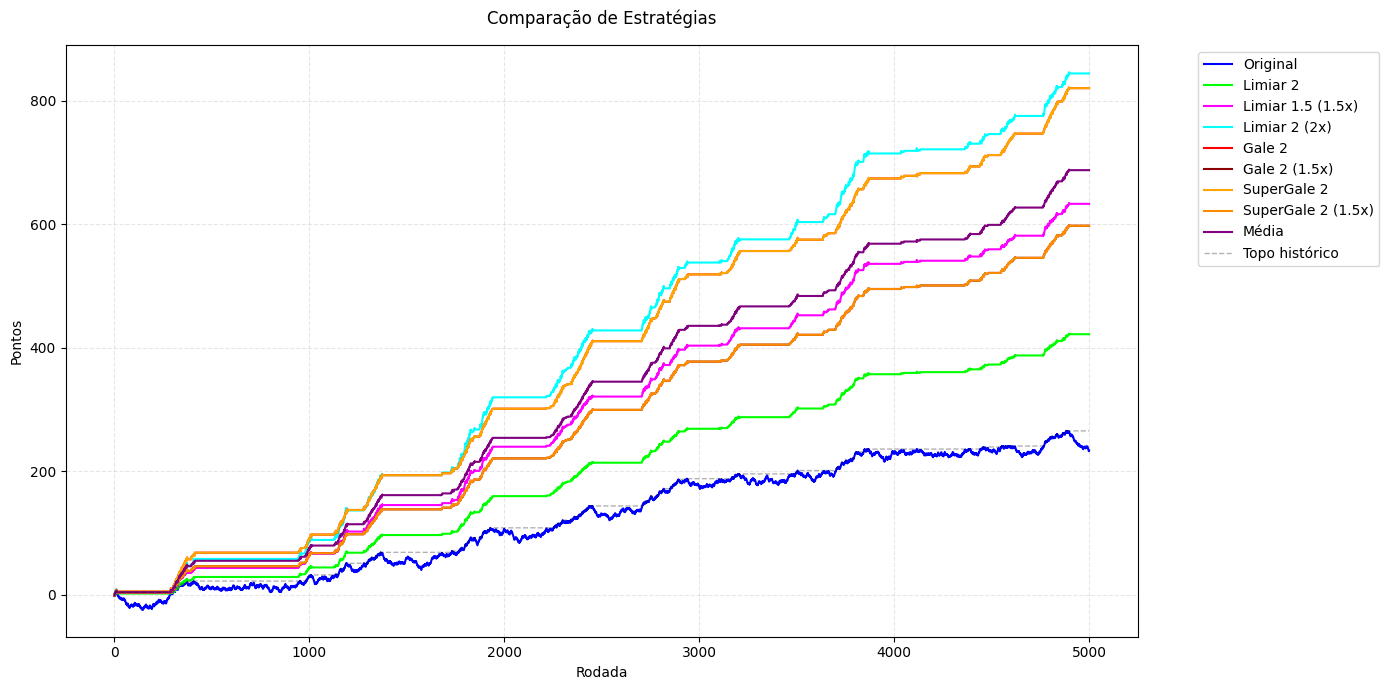

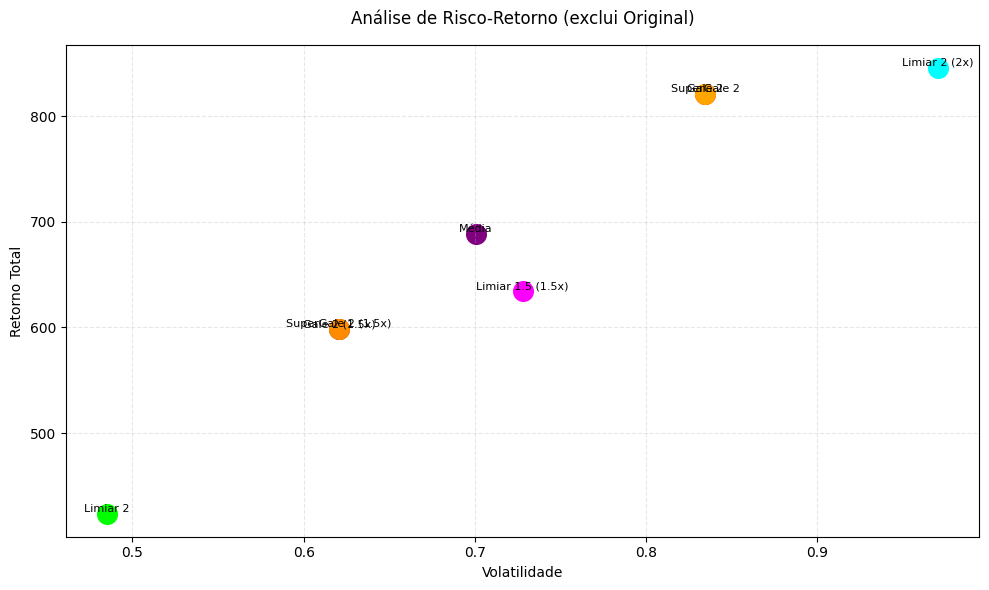

In [34]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES ===
NUM_RODADAS        = 5000
PONTO_CARA         = 1.05
PONTO_COROA        = -1.0
LIMIAR_VALOR       = 2

# Pesos para as estratégias de limiar
PESO_LIMIAR_1X     = (PONTO_CARA, PONTO_COROA)
PESO_LIMIAR_1_5X   = (PONTO_CARA * 1.5, PONTO_COROA * 1.5)
PESO_LIMIAR_2X     = (2.10, -2.00)

# === INICIALIZAÇÃO ===
pontos = 0
evolucao_pontos = []
topo_historico = []

estrategias = {
    'Original':              {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2':              {'pontos': 0, 'evolucao': [], 'cor': 'lime',     'peso': PESO_LIMIAR_1X},
    'Limiar 1.5 (1.5x)':     {'pontos': 0, 'evolucao': [], 'cor': 'magenta',  'peso': PESO_LIMIAR_1_5X},
    'Limiar 2 (2x)':         {'pontos': 0, 'evolucao': [], 'cor': 'cyan',     'peso': PESO_LIMIAR_2X},
    'Gale 2':                {'pontos': 0, 'evolucao': [], 'cor': 'red',      'mult': 1},
    'Gale 2 (1.5x)':         {'pontos': 0, 'evolucao': [], 'cor': 'darkred',  'mult': 1, 'fator': 1.5},
    'SuperGale 2':           {'pontos': 0, 'evolucao': [], 'cor': 'orange',   'perdas_consec': 0},
    'SuperGale 2 (1.5x)':    {'pontos': 0, 'evolucao': [], 'cor': 'darkorange','perdas_consec': 0, 'fator': 1.5}
}

# === SIMULAÇÃO ===
for rodada in range(NUM_RODADAS):
    resultado = secrets.SystemRandom().random()
    pontos += PONTO_CARA if resultado < 0.5 else PONTO_COROA
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        diferenca = topo_historico[-1] - pontos

        if nome.startswith('Limiar'):
            peso_c, peso_e = dados['peso']
            if diferenca <= LIMIAR_VALOR:
                dados['pontos'] += peso_c if resultado < 0.5 else peso_e
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome.startswith('Gale'):
            if diferenca <= LIMIAR_VALOR:
                mult = dados['mult']
                fator = dados.get('fator', 2)
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * mult
                    dados['mult'] = 1
                else:
                    dados['pontos'] += PONTO_COROA * mult
                    dados['mult'] = mult * fator
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome.startswith('SuperGale'):
            if diferenca <= LIMIAR_VALOR:
                fator = dados.get('fator', 2)
                exp = fator ** dados['perdas_consec']
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * exp
                    dados['perdas_consec'] = 0
                else:
                    dados['pontos'] += PONTO_COROA * exp
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# === MÉDIA ===
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)
estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# === GRÁFICO 1: LINHAS ===
plt.figure(figsize=(14, 7))
ordem = [
    'Original',
    'Limiar 2', 'Limiar 1.5 (1.5x)', 'Limiar 2 (2x)',
    'Gale 2', 'Gale 2 (1.5x)',
    'SuperGale 2', 'SuperGale 2 (1.5x)',
    'Média'
]
for nome in ordem:
    plt.plot(
        estrategias[nome]['evolucao'],
        color=estrategias[nome]['cor'],
        label=nome,
        linewidth=1.5
    )
plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# === GRÁFICO 2: RISCO-RETORNO (sem "Original") ===
plt.figure(figsize=(10, 6))
ordem_scatter = [e for e in ordem if e != 'Original']
for nome in ordem_scatter:
    evo = estrategias[nome]['evolucao']
    retorno = evo[-1] - evo[0]
    volatilidade = np.std(np.diff(evo))
    plt.scatter(volatilidade, retorno, s=200, color=estrategias[nome]['cor'], label=nome)
    plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom')
plt.title('Análise de Risco-Retorno (exclui Original)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Total')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

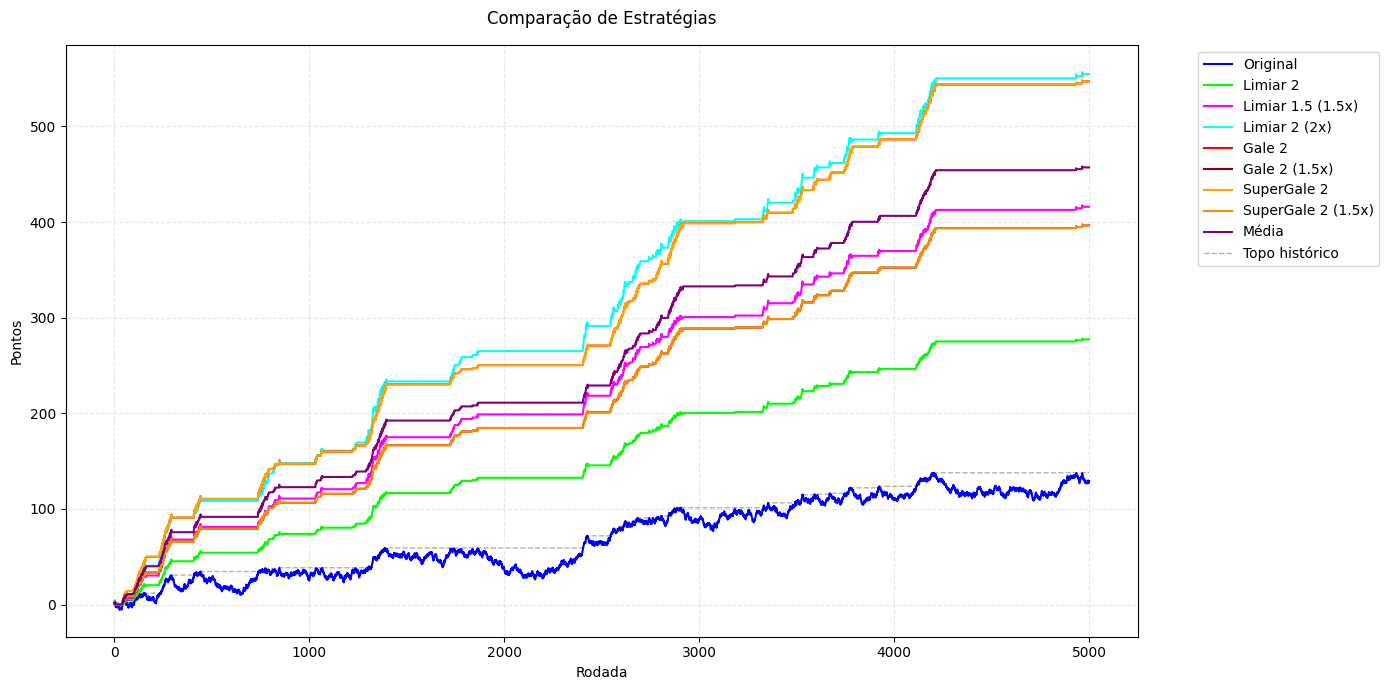

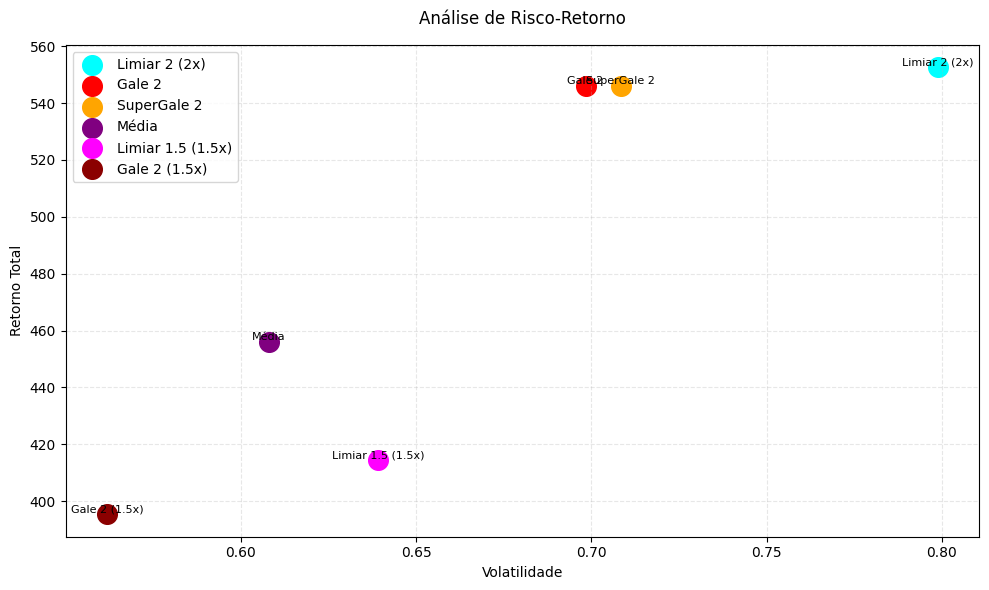

In [35]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES ===
NUM_RODADAS        = 5000
PONTO_CARA         = 1.05
PONTO_COROA        = -1.0
LIMIAR_VALOR       = 2

# Pesos para as estratégias de limiar
PESO_LIMIAR_1X     = (PONTO_CARA, PONTO_COROA)
PESO_LIMIAR_1_5X   = (PONTO_CARA * 1.5, PONTO_COROA * 1.5)
PESO_LIMIAR_2X     = (2.10, -2.00)

# === INICIALIZAÇÃO ===
pontos = 0
evolucao_pontos = []
topo_historico = []

estrategias = {
    'Original':              {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2':              {'pontos': 0, 'evolucao': [], 'cor': 'lime',     'peso': PESO_LIMIAR_1X},
    'Limiar 1.5 (1.5x)':     {'pontos': 0, 'evolucao': [], 'cor': 'magenta',  'peso': PESO_LIMIAR_1_5X},
    'Limiar 2 (2x)':         {'pontos': 0, 'evolucao': [], 'cor': 'cyan',     'peso': PESO_LIMIAR_2X},
    'Gale 2':                {'pontos': 0, 'evolucao': [], 'cor': 'red',      'mult': 1},
    'Gale 2 (1.5x)':         {'pontos': 0, 'evolucao': [], 'cor': 'darkred',  'mult': 1, 'fator': 1.5},
    'SuperGale 2':           {'pontos': 0, 'evolucao': [], 'cor': 'orange',   'perdas_consec': 0},
    'SuperGale 2 (1.5x)':    {'pontos': 0, 'evolucao': [], 'cor': 'darkorange','perdas_consec': 0, 'fator': 1.5}
}

# === SIMULAÇÃO ===
for rodada in range(NUM_RODADAS):
    resultado = secrets.SystemRandom().random()
    pontos += PONTO_CARA if resultado < 0.5 else PONTO_COROA
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        diferenca = topo_historico[-1] - pontos

        if nome.startswith('Limiar'):
            peso_c, peso_e = dados['peso']
            if diferenca <= LIMIAR_VALOR:
                dados['pontos'] += peso_c if resultado < 0.5 else peso_e
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome.startswith('Gale'):
            if diferenca <= LIMIAR_VALOR:
                mult = dados['mult']
                fator = dados.get('fator', 2)
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * mult
                    dados['mult'] = 1
                else:
                    dados['pontos'] += PONTO_COROA * mult
                    dados['mult'] = mult * fator
            dados['evolucao'].append(dados['pontos'])
            continue

        if nome.startswith('SuperGale'):
            if diferenca <= LIMIAR_VALOR:
                fator = dados.get('fator', 2)
                exp = fator ** dados['perdas_consec']
                if resultado < 0.5:
                    dados['pontos'] += PONTO_CARA * exp
                    dados['perdas_consec'] = 0
                else:
                    dados['pontos'] += PONTO_COROA * exp
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# === MÉDIA ===
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)
estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# === GRÁFICO 1: LINHAS ===
plt.figure(figsize=(14, 7))
ordem = [
    'Original',
    'Limiar 2', 'Limiar 1.5 (1.5x)', 'Limiar 2 (2x)',
    'Gale 2', 'Gale 2 (1.5x)',
    'SuperGale 2', 'SuperGale 2 (1.5x)',
    'Média'
]
for nome in ordem:
    plt.plot(
        estrategias[nome]['evolucao'],
        color=estrategias[nome]['cor'],
        label=nome,
        linewidth=1.5
    )
plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Estratégias', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# === GRÁFICO 2: RISCO-RETORNO (parametrizável) ===
def plot_risco_retorno(estrategias_dict, top_n=None, menor_volatilidade=False):
    dados_plot = []
    for nome, dados in estrategias_dict.items():
        if nome == 'Original':
            continue
        evo = dados['evolucao']
        retorno = evo[-1] - evo[0]
        volatilidade = np.std(np.diff(evo))
        dados_plot.append((nome, retorno, volatilidade, dados['cor']))

    # Filtros
    if menor_volatilidade:
        dados_plot.sort(key=lambda x: x[2])  # Menor volatilidade
    else:
        dados_plot.sort(key=lambda x: x[1], reverse=True)  # Maior retorno

    if top_n is not None:
        dados_plot = dados_plot[:top_n]

    # Plot
    plt.figure(figsize=(10, 6))
    for idx, (nome, retorno, vol, cor) in enumerate(dados_plot):
        jitter_x = vol + 0.01 * idx  # Pequeno deslocamento para evitar sobreposição
        plt.scatter(jitter_x, retorno, s=200, color=cor, label=nome)
        plt.text(jitter_x, retorno, nome, fontsize=8, ha='center', va='bottom')

    plt.title('Análise de Risco-Retorno', pad=15)
    plt.xlabel('Volatilidade')
    plt.ylabel('Retorno Total')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# === USO DO GRÁFICO RISCO-RETORNO COM FILTRO ===
plot_risco_retorno(estrategias, top_n=6)  # ou use top_n=None, menor_volatilidade=True

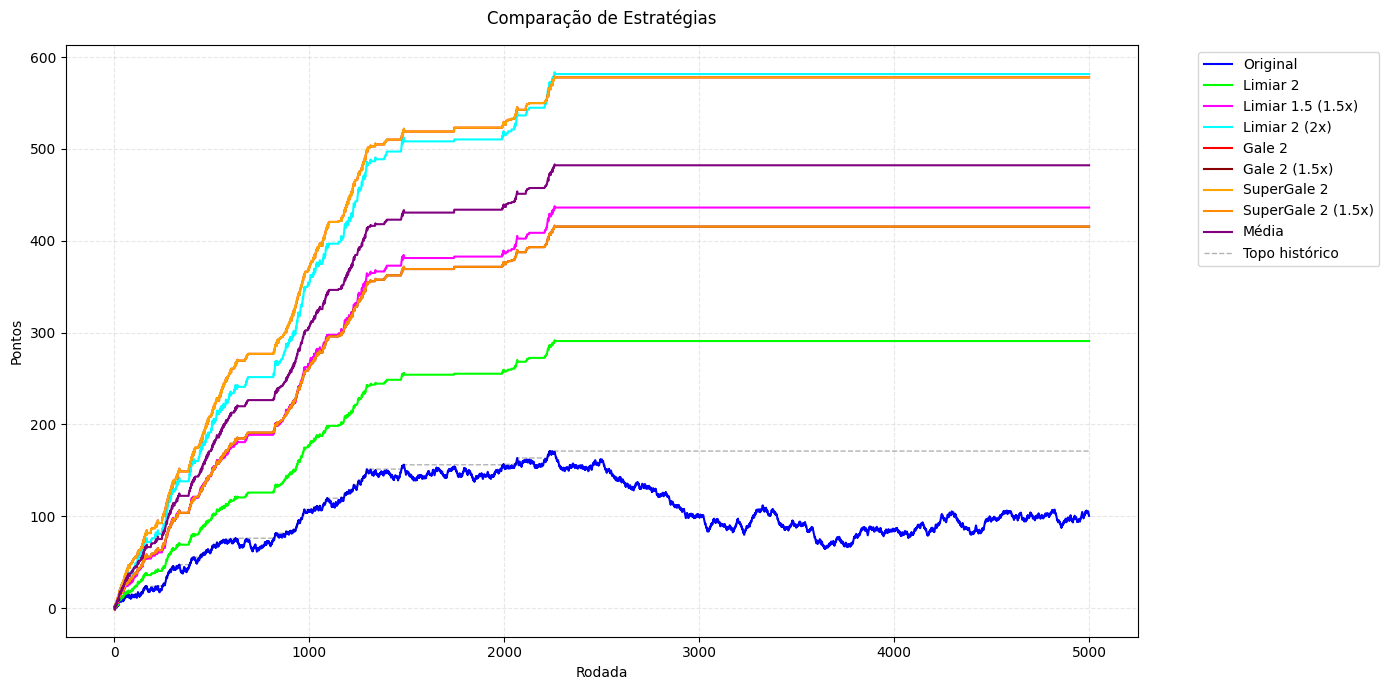

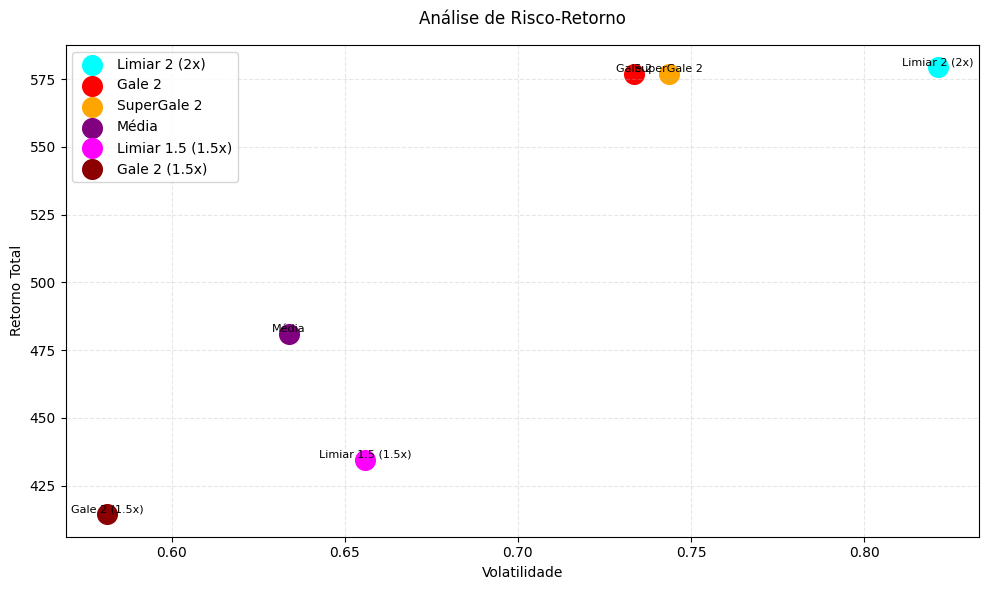

In [36]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# === CONFIGURAÇÕES ===
NUM_RODADAS      = 5000
PONTO_CARA       = 1.05
PONTO_COROA      = -1.0
LIMIAR_VALOR     = 2

PESO_LIMIAR_1X   = (PONTO_CARA, PONTO_COROA)
PESO_LIMIAR_1_5X = (PONTO_CARA * 1.5, PONTO_COROA * 1.5)
PESO_LIMIAR_2X   = (2.10, -2.00)

# === ESTRATÉGIAS ===
estrategias = {
    'Original':              {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2':              {'pontos': 0, 'evolucao': [], 'cor': 'lime',     'peso': PESO_LIMIAR_1X},
    'Limiar 1.5 (1.5x)':     {'pontos': 0, 'evolucao': [], 'cor': 'magenta',  'peso': PESO_LIMIAR_1_5X},
    'Limiar 2 (2x)':         {'pontos': 0, 'evolucao': [], 'cor': 'cyan',     'peso': PESO_LIMIAR_2X},
    'Gale 2':                {'pontos': 0, 'evolucao': [], 'cor': 'red',      'mult': 1},
    'Gale 2 (1.5x)':         {'pontos': 0, 'evolucao': [], 'cor': 'darkred',  'mult': 1, 'fator': 1.5},
    'SuperGale 2':           {'pontos': 0, 'evolucao': [], 'cor': 'orange',   'perdas_consec': 0},
    'SuperGale 2 (1.5x)':    {'pontos': 0, 'evolucao': [], 'cor': 'darkorange','perdas_consec': 0, 'fator': 1.5}
}

# === VARIÁVEIS DE CONTROLE ===
pontos = 0
evolucao_pontos = []
topo_historico = []

# === FUNÇÕES AUXILIARES ===
def atualizar_original(pontos_atual):
    estrategias['Original']['pontos'] = pontos_atual
    estrategias['Original']['evolucao'].append(pontos_atual)

def atualizar_limiar(nome, resultado, diferenca):
    peso_c, peso_e = estrategias[nome]['peso']
    if diferenca <= LIMIAR_VALOR:
        estrategias[nome]['pontos'] += peso_c if resultado < 0.5 else peso_e
    estrategias[nome]['evolucao'].append(estrategias[nome]['pontos'])

def atualizar_gale(nome, resultado, diferenca):
    dados = estrategias[nome]
    if diferenca <= LIMIAR_VALOR:
        mult = dados['mult']
        fator = dados.get('fator', 2)
        if resultado < 0.5:
            dados['pontos'] += PONTO_CARA * mult
            dados['mult'] = 1
        else:
            dados['pontos'] += PONTO_COROA * mult
            dados['mult'] = mult * fator
    dados['evolucao'].append(dados['pontos'])

def atualizar_supergale(nome, resultado, diferenca):
    dados = estrategias[nome]
    if diferenca <= LIMIAR_VALOR:
        fator = dados.get('fator', 2)
        exp = fator ** dados['perdas_consec']
        if resultado < 0.5:
            dados['pontos'] += PONTO_CARA * exp
            dados['perdas_consec'] = 0
        else:
            dados['pontos'] += PONTO_COROA * exp
            dados['perdas_consec'] += 1
    dados['evolucao'].append(dados['pontos'])

# === SIMULAÇÃO ===
for rodada in range(NUM_RODADAS):
    resultado = secrets.SystemRandom().random()
    pontos += PONTO_CARA if resultado < 0.5 else PONTO_COROA
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada else pontos)

    atualizar_original(pontos)
    diferenca = topo_historico[-1] - pontos

    for nome in estrategias:
        if nome == 'Original':
            continue
        if nome.startswith('Limiar'):
            atualizar_limiar(nome, resultado, diferenca)
        elif nome.startswith('Gale'):
            atualizar_gale(nome, resultado, diferenca)
        elif nome.startswith('SuperGale'):
            atualizar_supergale(nome, resultado, diferenca)

# === CÁLCULO DE MÉDIA ===
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)
estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# === GRÁFICO DE LINHAS ===
def plotar_evolucao(estrategias_dict, topo_historico, ordem):
    plt.figure(figsize=(14, 7))
    for nome in ordem:
        plt.plot(
            estrategias_dict[nome]['evolucao'],
            color=estrategias_dict[nome]['cor'],
            label=nome,
            linewidth=1.5
        )
    plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
    plt.title('Comparação de Estratégias', pad=15)
    plt.xlabel('Rodada')
    plt.ylabel('Pontos')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plotar_evolucao(estrategias, topo_historico, [
    'Original',
    'Limiar 2', 'Limiar 1.5 (1.5x)', 'Limiar 2 (2x)',
    'Gale 2', 'Gale 2 (1.5x)',
    'SuperGale 2', 'SuperGale 2 (1.5x)',
    'Média'
])

# === GRÁFICO DE RISCO X RETORNO ===
def plot_risco_retorno(estrategias_dict, top_n=None, menor_volatilidade=False):
    dados_plot = []
    for nome, dados in estrategias_dict.items():
        if nome == 'Original':
            continue
        evo = dados['evolucao']
        retorno = evo[-1] - evo[0]
        volatilidade = np.std(np.diff(evo))
        dados_plot.append((nome, retorno, volatilidade, dados['cor']))

    dados_plot.sort(key=(lambda x: x[2] if menor_volatilidade else -x[1]))
    if top_n is not None:
        dados_plot = dados_plot[:top_n]

    plt.figure(figsize=(10, 6))
    for idx, (nome, retorno, vol, cor) in enumerate(dados_plot):
        jitter_x = vol + 0.01 * idx
        plt.scatter(jitter_x, retorno, s=200, color=cor, label=nome)
        plt.text(jitter_x, retorno, nome, fontsize=8, ha='center', va='bottom')

    plt.title('Análise de Risco-Retorno', pad=15)
    plt.xlabel('Volatilidade')
    plt.ylabel('Retorno Total')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# === USO DO GRÁFICO RISCO-RETORNO ===
plot_risco_retorno(estrategias, top_n=6)

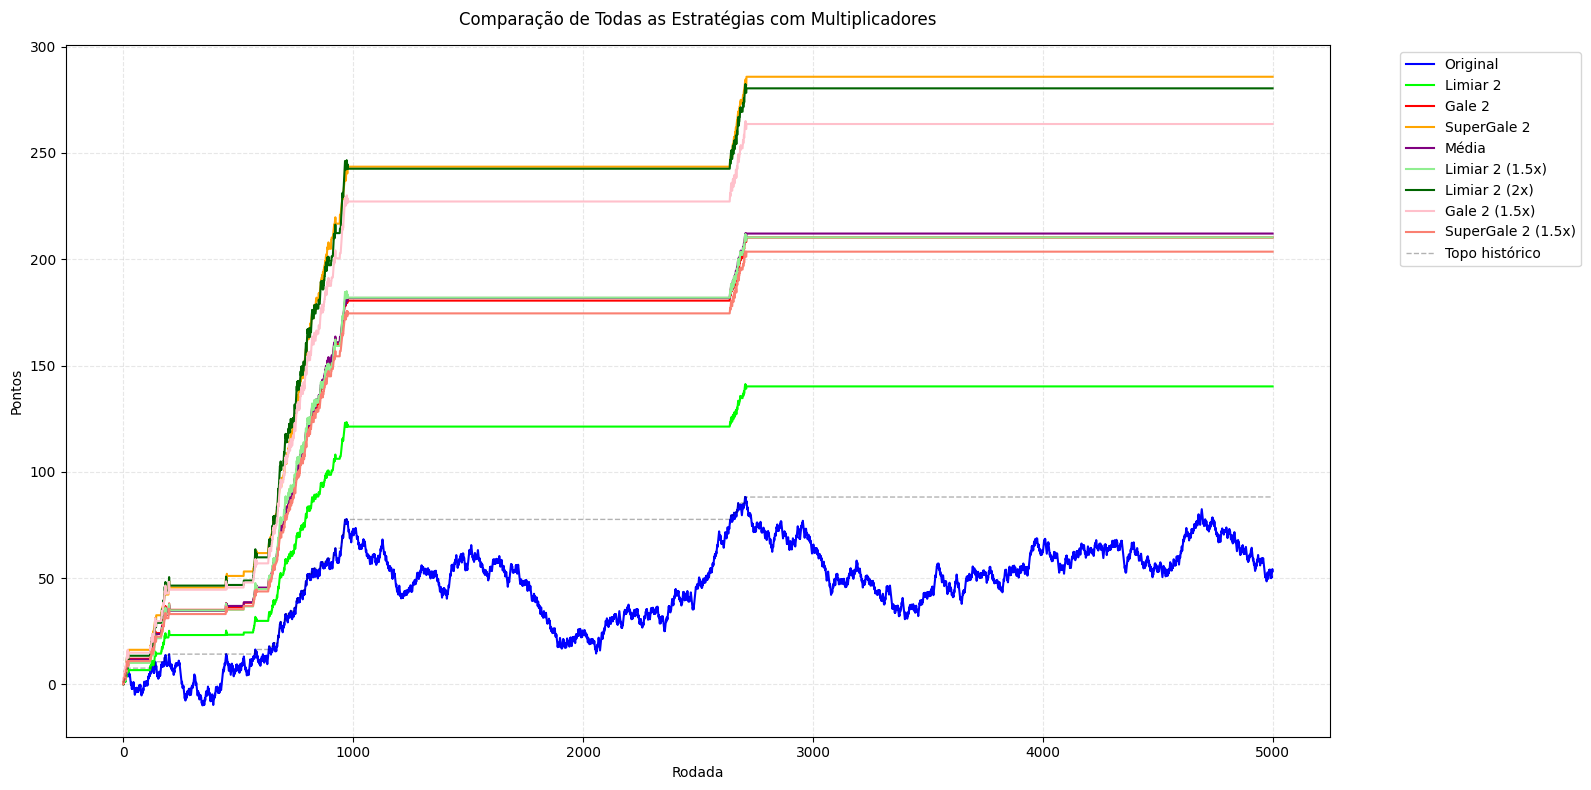

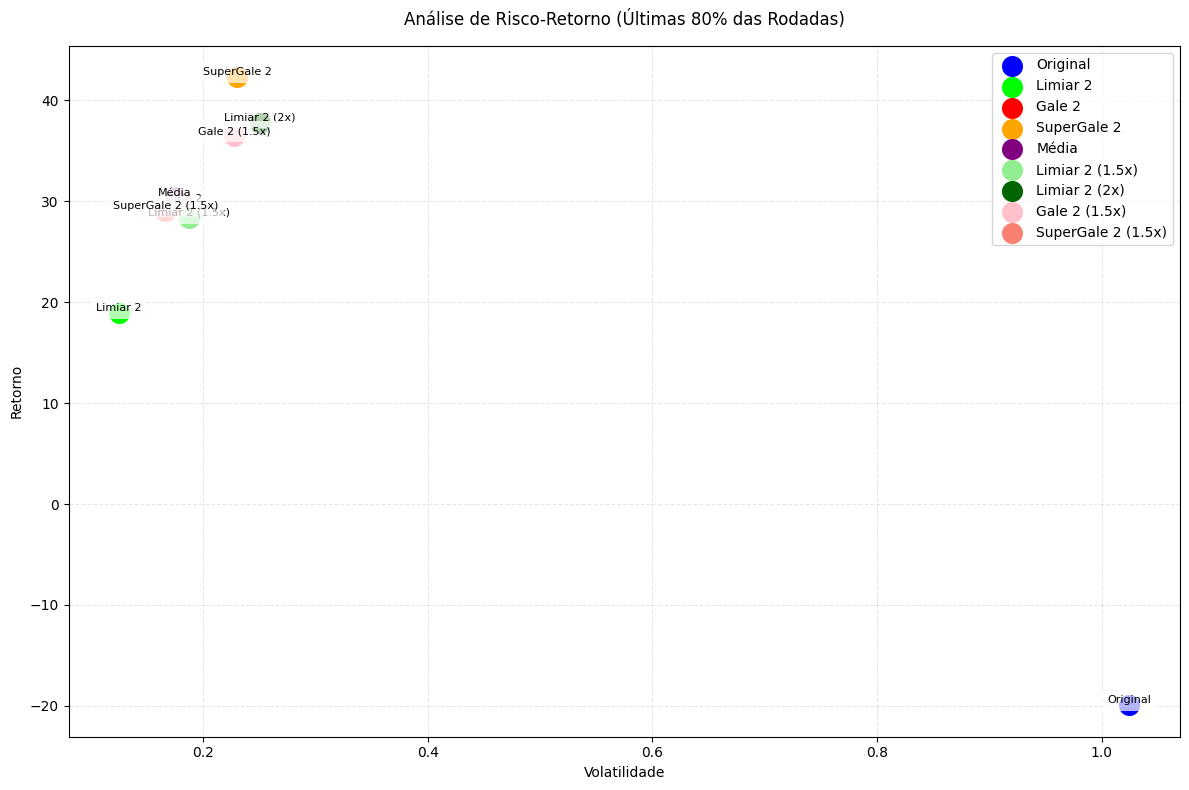

In [37]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_base_cara = 1.05
ponto_base_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen', 'mult': 1.5},
    'Limiar 2 (2x)': {'pontos': 0, 'evolucao': [], 'cor': 'darkgreen', 'mult': 2},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'pink', 'mult': 1.5},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0},
    'SuperGale 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'salmon', 'perdas_consec': 0, 'mult': 1.5}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_base_cara if resultado < 0.5 else ponto_base_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        # Definir multiplicador e pontos para cada estratégia
        if '1.5x' in nome:
            mult = 1.5
            ponto_cara = ponto_base_cara * mult
            ponto_coroa = ponto_base_coroa * mult
        elif '2x' in nome:
            mult = 2
            ponto_cara = ponto_base_cara * mult
            ponto_coroa = ponto_base_coroa * mult
        else:
            mult = 1
            ponto_cara = ponto_base_cara
            ponto_coroa = ponto_base_coroa

        # Limiares simples
        if nome.startswith('Limiar 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if '(1.5x)' in nome or '(2x)' in nome:
                    dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
                else:
                    dados['pontos'] += ponto_base_cara if resultado < 0.5 else ponto_base_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if nome.startswith('Gale 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 1.5 if '(1.5x)' in nome else 2
            dados['evolucao'].append(dados['pontos'])
            continue

        # SuperGale
        if nome.startswith('SuperGale 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    if '(1.5x)' in nome:
                        dados['pontos'] += ponto_base_cara * (dados['mult'] ** dados['perdas_consec'])
                    else:
                        dados['pontos'] += ponto_base_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    if '(1.5x)' in nome:
                        dados['pontos'] += ponto_base_coroa * (dados['mult'] ** dados['perdas_consec'])
                    else:
                        dados['pontos'] += ponto_base_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias básicas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas (principais estratégias)
plt.figure(figsize=(16, 8))
ordem_principais = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média',
                   'Limiar 2 (1.5x)', 'Limiar 2 (2x)', 'Gale 2 (1.5x)', 'SuperGale 2 (1.5x)']
cores = ['blue', 'lime', 'red', 'orange', 'purple',
        'lightgreen', 'darkgreen', 'pink', 'salmon']

for nome, cor in zip(ordem_principais, cores):
    if nome in estrategias:
        plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Todas as Estratégias com Multiplicadores', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(12, 8))
for nome in ordem_principais:
    if nome in estrategias:
        dados = estrategias[nome]
        evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Remove as primeiras 20%
        retorno = evolucao[-1] - evolucao[0]
        volatilidade = np.std(np.diff(evolucao))

        plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
        plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 80% das Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

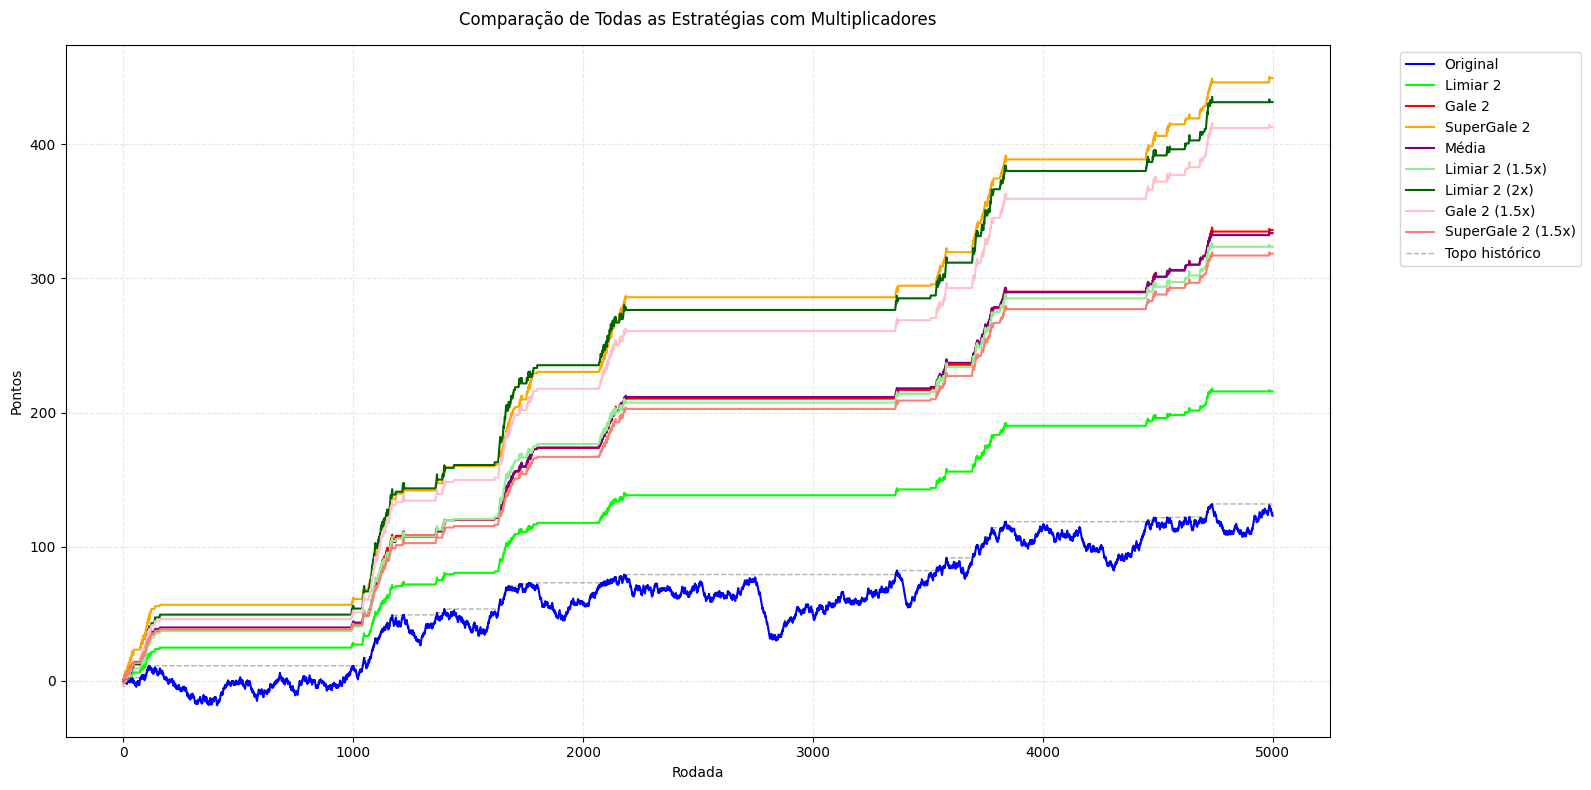

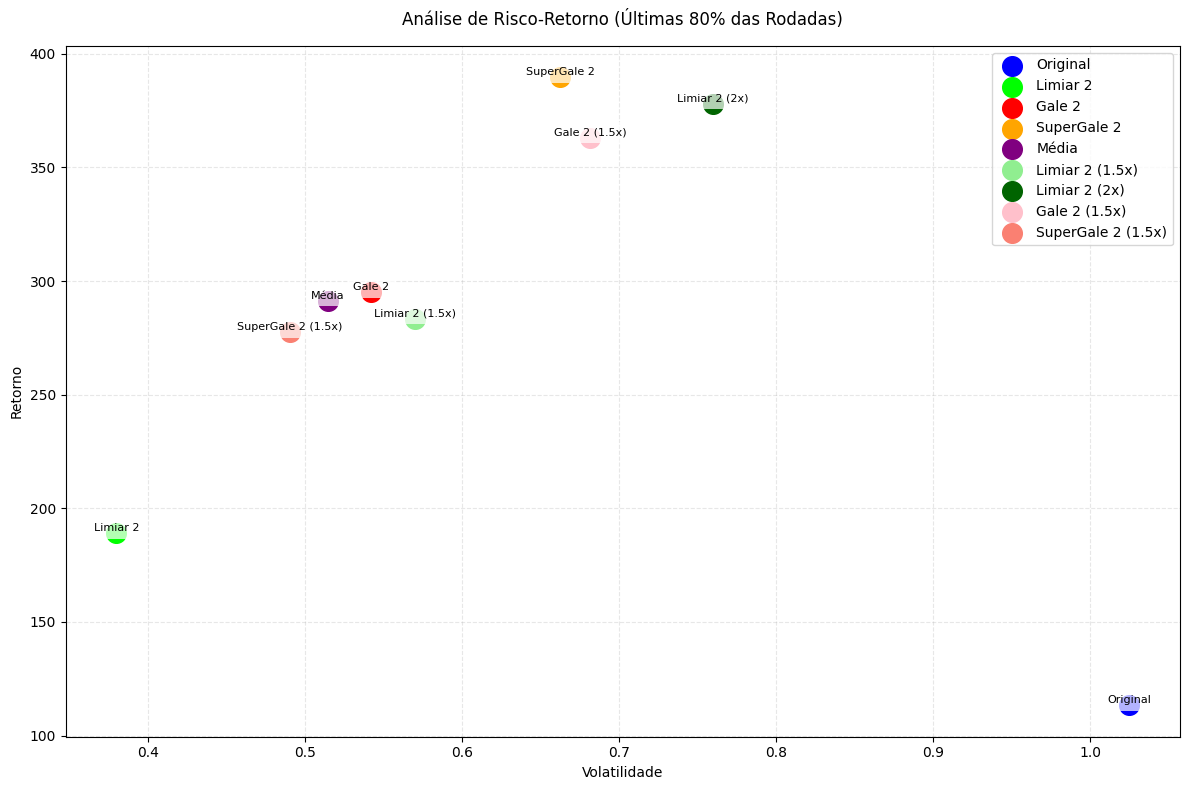

In [39]:
import secrets
import matplotlib.pyplot as plt
import numpy as np

# Configurações
num_rodadas = 5000
ponto_base_cara = 1.05
ponto_base_coroa = -1

# Inicialização
pontos = 0
evolucao_pontos = []
topo_historico = []

# Estratégias
estrategias = {
    'Original': {'pontos': 0, 'evolucao': [], 'cor': 'blue'},
    'Limiar 2': {'pontos': 0, 'evolucao': [], 'cor': 'lime'},
    'Limiar 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'lightgreen', 'mult': 1.5},
    'Limiar 2 (2x)': {'pontos': 0, 'evolucao': [], 'cor': 'darkgreen', 'mult': 2},
    'Gale 2': {'pontos': 0, 'evolucao': [], 'cor': 'red', 'mult': 1},
    'Gale 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'pink', 'mult': 1.5},
    'SuperGale 2': {'pontos': 0, 'evolucao': [], 'cor': 'orange', 'perdas_consec': 0},
    'SuperGale 2 (1.5x)': {'pontos': 0, 'evolucao': [], 'cor': 'salmon', 'perdas_consec': 0, 'mult': 1.5}
}

# Simulação
for rodada in range(num_rodadas):
    # Jogo original
    resultado = secrets.SystemRandom().random()
    pontos += ponto_base_cara if resultado < 0.5 else ponto_base_coroa
    evolucao_pontos.append(pontos)
    topo_historico.append(max(topo_historico[-1], pontos) if rodada > 0 else pontos)

    # Atualização das estratégias
    for nome, dados in estrategias.items():
        if nome == 'Original':
            dados['pontos'] = pontos
            dados['evolucao'].append(pontos)
            continue

        # Definir multiplicador e pontos para cada estratégia
        if '1.5x' in nome:
            mult = 1.5
            ponto_cara = ponto_base_cara * mult
            ponto_coroa = ponto_base_coroa * mult
        elif '2x' in nome:
            mult = 2
            ponto_cara = ponto_base_cara * mult
            ponto_coroa = ponto_base_coroa * mult
        else:
            mult = 1
            ponto_cara = ponto_base_cara
            ponto_coroa = ponto_base_coroa

        # Limiares simples
        if nome.startswith('Limiar 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if '(1.5x)' in nome or '(2x)' in nome:
                    dados['pontos'] += ponto_cara if resultado < 0.5 else ponto_coroa
                else:
                    dados['pontos'] += ponto_base_cara if resultado < 0.5 else ponto_base_coroa
            dados['evolucao'].append(dados['pontos'])
            continue

        # Estratégias Gale
        if nome.startswith('Gale 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    dados['pontos'] += ponto_cara * dados['mult']
                    dados['mult'] = 1
                else:  # Derrota
                    dados['pontos'] += ponto_coroa * dados['mult']
                    dados['mult'] = 1.5 if '(1.5x)' in nome else 2
            dados['evolucao'].append(dados['pontos'])
            continue

        # SuperGale
        if nome.startswith('SuperGale 2'):
            diferenca = topo_historico[-1] - pontos
            if diferenca <= 2:
                if resultado < 0.5:  # Vitória
                    if '(1.5x)' in nome:
                        dados['pontos'] += ponto_base_cara * (dados['mult'] ** dados['perdas_consec'])
                    else:
                        dados['pontos'] += ponto_base_cara * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] = 0
                else:  # Derrota
                    if '(1.5x)' in nome:
                        dados['pontos'] += ponto_base_coroa * (dados['mult'] ** dados['perdas_consec'])
                    else:
                        dados['pontos'] += ponto_base_coroa * (2 ** dados['perdas_consec'])
                    dados['perdas_consec'] += 1
            dados['evolucao'].append(dados['pontos'])

# Cálculo da média das estratégias básicas
media_estrategias = np.mean([
    estrategias['Limiar 2']['evolucao'],
    estrategias['Gale 2']['evolucao'],
    estrategias['SuperGale 2']['evolucao']
], axis=0)

estrategias['Média'] = {'evolucao': media_estrategias.tolist(), 'cor': 'purple'}

# Gráfico 1: Comparação de Linhas (principais estratégias)
plt.figure(figsize=(16, 8))
ordem_principais = ['Original', 'Limiar 2', 'Gale 2', 'SuperGale 2', 'Média',
                   'Limiar 2 (1.5x)', 'Limiar 2 (2x)', 'Gale 2 (1.5x)', 'SuperGale 2 (1.5x)']
cores = ['blue', 'lime', 'red', 'orange', 'purple',
        'lightgreen', 'darkgreen', 'pink', 'salmon']

for nome, cor in zip(ordem_principais, cores):
    if nome in estrategias:
        plt.plot(estrategias[nome]['evolucao'], color=cor, label=nome, linewidth=1.5)

plt.plot(topo_historico, 'k--', label='Topo histórico', linewidth=1, alpha=0.3)
plt.title('Comparação de Todas as Estratégias com Multiplicadores', pad=15)
plt.xlabel('Rodada')
plt.ylabel('Pontos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico 2: Risco-Retorno
plt.figure(figsize=(12, 8))
for nome in ordem_principais:
    if nome in estrategias:
        dados = estrategias[nome]
        evolucao = dados['evolucao'][int(num_rodadas*0.2):]  # Remove as primeiras 20%
        retorno = evolucao[-1] - evolucao[0]
        volatilidade = np.std(np.diff(evolucao))

        plt.scatter(volatilidade, retorno, s=200, color=dados['cor'], label=nome)
        plt.text(volatilidade, retorno, nome, fontsize=8, ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.title('Análise de Risco-Retorno (Últimas 80% das Rodadas)', pad=15)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()